## Predicting Return to Work among Cardiac Rehab Participant

## Law Yoke Kyng (WQD180111 / 17198048)

<a id='0.Content'></a>
## Content

<br>[1. Overview](#1.Overview)
<br>[2. Data Exploration](#2.DataExploration)
<br>[3. Data Cleaning](#3.DataCleaning)
<br>[4. Data Imputation](#4.DataImputation)
<br>[5. Data Visualization](#5.DataVisualization)
<br>[6. Data Modeling](#6.DataModeling)
<br>[6.1 Top 10 features selected by feature selection methods](#6.1Top10Features)
<br>[6.2 Wrapped-based Feature Selection Method](#6.2WrappedBased)
<br>[6.3 Embedded Feature Selection Method](#6.3Embedded)
<br>[6.4 Filter-based Feature Selection Method](#6.4FilterBased)
<br>[7. Conclusion](#7.Conclusion)

<a id='1.Overview'></a>
## 1. Overview

Cardiac Rehab program is an essential program to attend for people who had a heart surgery or heart attack incident. It can help patients maintain optimal health, preventing possible future cardiac problems and able return to work after completed the program. 

Data collected from UMMC hospital. 

Top 10 Selected Features, the most suitable feature selection method and machine learning technique are presented as the result. 

In [1]:
#install missing package
#pip install pgeocode
#pip install xgboost
#pip install --upgrade plotly
#pip install gridspec

<a id='2.DataExploration'></a>
## 2. Data Exploration

In [2]:
#Data Manipulation
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pgeocode

#calculation
import math

#custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [3]:
# Self-defined function to display label in the bar chart

def upper_whisker(df):
    import numpy as np
    p25, p75 = np.percentile(df, [25, 75])
    return min(max(df),p75 + 1.5*(p75-p25))

def lower_whisker(df):
    import numpy as np
    p25, p75 = np.percentile(df, [25, 75])
    return max(min(df),p25 - 1.5*(p75-p25))

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

In [4]:
df = pd.read_excel('CR_data.xlsx', sheet_name='Form Responses 1')

D:\Program\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell P244 is marked as a date but the serial value 29261077.0 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
D:\Program\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell P258 is marked as a date but the serial value 14651341.0 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
D:\Program\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell AD261 is marked as a date but the serial value 10999188.0 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
D:\Program\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
df.head()

Timestamp Patient_Registration_Number_               Race  \
0 2015-06-09 13:06:19.019                      8444773  Malay/ Indonesian   
1 2015-06-18 10:42:38.398                     15302617            Chinese   
2 2015-06-24 11:04:02.507                      3656349             Others   
3 2015-06-24 11:31:38.680                      6862705         Indonesian   
4 2015-06-30 10:31:37.607                     31889310    Indian/ Punjabi   

                    Education_level Attending_Registrar  \
0  Form 6 / pre-university graduate             Dr Huda   
1                           Unknown      Fatimah Ahmedy   
2                           Unknown        Jamie Joseph   
3       College/university graduate         Tan Jin Hui   
4                   Form 5 graduate         Tan Jin Hui   

     Referring_Specialist                   Patient_occupation  \
0  Cardiothoracic Surgeon                   Government servant   
1            Cardiologist  Self-employed (excludes housewives)   
2  Cardiothoracic Surgeon                 Government pensioner   
3    Rehab Physician UMMC  Self-employed (excludes housewives)   
4    Rehab Physician UMMC           Stay at home/ never worked   

  Admission_Diagnosis_&_Procedures Date_of_latest_admission/_procedure  \
0             Valve replacement(s)                 2014-11-24 00:00:00   
1                            STEMI                 2013-10-19 00:00:00   
2       CABG, Valve replacement(s)                 2014-08-08 00:00:00   
3                             CABG                 2014-10-19 00:00:00   
4                             CABG                 2014-02-11 00:00:00   

  Health_funding  ... Gender.1 Race.1 Admission_Diagnosis_&_Procedures.1  \
0            JPA  ...      NaN    NaN                                NaN   
1    Self funded  ...      NaN    NaN                                NaN   
2    Self funded  ...      NaN    NaN                                NaN   
3    Self funded  ...      NaN    NaN                                NaN   
4    Self funded  ...      NaN    NaN                                NaN   

  Date_of_latest_admission/_procedure.1 Estimated_length_of_stay CR_stage  \
0                                   NaN                      NaN     None   
1                                   NaN                      NaN      NaN   
2                                   NaN                      NaN      NaN   
3                                   NaN                      NaN      NaN   
4                                   NaN                      NaN      NaN   

  Unnamed: 132 Pre_CRP_2_EST_date: Pre_CRP_2_EST_date:.1 Prescribed_Sessions.1  
0          NaN                 NaN                   NaN                   NaN  
1          NaN                 NaN                   NaN                   NaN  
2          NaN                 NaN                   NaN                   NaN  
3          NaN                 NaN                   NaN                   NaN  
4          NaN                 NaN                   NaN                   NaN  

[5 rows x 136 columns]

# Data filtering

In [6]:
#select those with occupation
L = ['employ', 'servant']
pat = r'(\b{}\b)'.format('|'.join(L))
df_filter = df[df["Patient_occupation"].str.contains(pat, case=False, na=False)].copy()
df_filter.shape

D:\Program\Anaconda\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(286, 136)

In [7]:
#drop rows with empty value in Return to work after CRP2
df_filter = df_filter[df_filter['Return_to_work_AFTER_CRP2'].notna()]
df_filter.shape

(208, 136)

In [8]:
#drop all empty columns
df_filter = df_filter.dropna(axis=1, how='all')
df_filter.shape

(208, 85)

In [9]:
# variables summary
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 384
Data columns (total 85 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                           --------------  -----         
 0   Timestamp                                                                                                                        208 non-null    datetime64[ns]
 1   Patient_Registration_Number_                                                                                                     208 non-null    object        
 2   Race                                                                                                                             208 non-null    object        
 3   Education_level                                                  

In [10]:
#rename variables name
df_filter.rename(columns={'Patient_Registration_Number_': 'Patient_Registration_Number',
                          'Significant_Past_CV_History_': 'Significant_Past_CV_History',
                          'CRP_2_INFORMATION:_Intake': 'CR_Intake',
                          'CRP_2_INFORMATION:_Intake.1': 'CR_Intake_Date',
                          'CRP_2:_Adherence': 'CR_Adherence',
                          'CRP2_Discharge_Date': 'CR_Discharge_Date',
                          'BP_CRP2_enrolment': 'Pre_BP',
                          'BP_': 'CR_BP',
                          'Tobacco_Use_Status': 'Pre_Tobacco',
                          'Tobacco_Persistence_Status': 'Post_Tobacco',
                          'Medication_Prescription': 'Pre_Medication',
                          'Medication_Modification': 'CR_Medication',
                          'Medication_Compliance': 'Post_Medication',
                          'Weight_': 'Pre_Weight',
                          'Weight_on_CRP2_discharge': 'Post_Weight',
                          'Exercise_Stress_Test': 'Pre_Exercise_Stress_Test',
                          'Peak_Heart_Rate':'Pre_Peak_Heart_Rate',
                          'Peak_METs': 'Pre_METs',
                          'Exercise_Stress_Test.1': 'Post_Exercise_Stress_Test',
                          'Peak_Heart_Rate.1': 'Post_Peak_Heart_Rate',
                          'Peak_METs.1': 'Post_Peak_METs',
                          'Exercise_frequency': 'Exercise_frequency_mins_week',
                          'Exercise_frequency.1': 'Exercise_frequency_sessions_week',
                          'Return_to_work_': 'Pre_RTW',
                          'Return_to_work_AFTER_CRP2': 'Post_RTW',
                          'Return_to_drive_': 'Pre_Return_to_drive',
                          'Return_to_drive_AFTER_CRP2': 'Post_Return_to_drive',
                          'Does_the_client_experience_erectile_dysfunction_?': 'Pre_erectile_dysfunction',
                          'Does_the_client_experience_erectile_dysfunction_after_CRP2?': 'Post_erectile_dysfunction',
                          'Major_Adverse_Cardiac/CVA_Event(s)': 'MACCE',
                          'Unexpected_Event(s)': 'Unexpected_Events',
                          'Left_Ventricle_EF_@_pre-CRP_2': 'Pre_Left_Ventricle_EF'
                          }, inplace=True)

In [11]:
df_filter.info()
df_filter.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 384
Data columns (total 85 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                           --------------  -----         
 0   Timestamp                                                                                                                        208 non-null    datetime64[ns]
 1   Patient_Registration_Number                                                                                                      208 non-null    object        
 2   Race                                                                                                                             208 non-null    object        
 3   Education_level                                                  

(208, 85)

In [12]:
selected_columns = ['Patient_Registration_Number',
                 'Race',
                 'Education_level',
                 'Patient_occupation',
                 'Admission_Diagnosis_&_Procedures',
                 'Date_of_latest_admission/_procedure',
                 'Health_funding',
                 'Cardiac_Risk_Factors',
                 'Significant_Past_CV_History',
                 'CR_Intake',
                 'CR_Intake_Date',
                 'Prescribed_Sessions',
                 'AACVPR_Risk_Category',
                 'CR_Adherence',
                 'CR_Discharge_Date',
                 'Triglyceride',
                 'HDL',
                 'LDL',
                 'HbA1c',
                 'Pre_BP',
                 'CR_BP',
                 'Pre_Tobacco',
                 'Post_Tobacco',
                 'Pre_Medication',
                 'CR_Medication',
                 'Post_Medication',
                 'Pre_Weight',
                 'Post_Weight',
                 'Height',
                 'Pre_Exercise_Stress_Test',
                 'Pre_Peak_Heart_Rate',
                 'Pre_METs',
                 'Post_Exercise_Stress_Test',
                 'Post_Peak_Heart_Rate',
                 'Post_Peak_METs',
                 'Exercise_frequency_mins_week',
                 'Exercise_frequency_sessions_week',
                 'Exercise_intensity',
                 'Anxiety_Scores',
                 'Depression_Scores',
                 'Pre_RTW',
                 'Post_RTW',
                 'Pre_Return_to_drive',
                 'Post_Return_to_drive',
                 'Pre_erectile_dysfunction',
                 'Post_erectile_dysfunction',
                 'MACCE',
                 'Unexpected_Events',
                 'Residential_Postcode',
                 'Age',
                 'Gender',
                 'Pre_Left_Ventricle_EF']

df_filter_short = df_filter[selected_columns].copy()

In [13]:
df_filter_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 384
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Patient_Registration_Number          208 non-null    object 
 1   Race                                 208 non-null    object 
 2   Education_level                      208 non-null    object 
 3   Patient_occupation                   208 non-null    object 
 4   Admission_Diagnosis_&_Procedures     208 non-null    object 
 5   Date_of_latest_admission/_procedure  208 non-null    object 
 6   Health_funding                       208 non-null    object 
 7   Cardiac_Risk_Factors                 208 non-null    object 
 8   Significant_Past_CV_History          208 non-null    object 
 9   CR_Intake                            208 non-null    object 
 10  CR_Intake_Date                       200 non-null    object 
 11  Prescribed_Sessions             

In [14]:
#check duplicate
duplicate_row = pd.concat(g for _, g in df_filter_short.groupby("Patient_Registration_Number") if len(g) > 1)
duplicate_row['Patient_Registration_Number'].unique()

array([2072840, 3791980, 4177878, 4200187, 6732704, 9362894, 15302617,
       16183800, 18234798, 26412349, 31144967, 31909574, 32002607,
       32215822, 33246586, 123456789], dtype=object)

In [15]:
#check for id 123456789
df_filter[df_filter['Patient_Registration_Number']==123456789]

Timestamp Patient_Registration_Number     Race  \
60 2015-08-13 16:51:09.829                   123456789  Unknown   
61 2015-08-13 16:51:21.207                   123456789  Unknown   
62 2015-08-13 16:51:30.289                   123456789  Unknown   

   Education_level Attending_Registrar Referring_Specialist  \
60         Unknown                 ASD     Other specialist   
61         Unknown                 ASD     Other specialist   
62         Unknown                 ASD     Other specialist   

    Patient_occupation Admission_Diagnosis_&_Procedures  \
60  Private employment                    Heart Failure   
61  Private employment                    Heart Failure   
62  Private employment                    Heart Failure   

   Date_of_latest_admission/_procedure Health_funding  ...  \
60                 2015-08-13 00:00:00           Ilat  ...   
61                 2015-08-13 00:00:00           Ilat  ...   
62                 2015-08-13 00:00:00           Ilat  ...   

   Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
60                     NaN                  NaT          NaN           NaN   
61                     NaN                  NaT          NaN           NaN   
62                     NaN                  NaT          NaN           NaN   

   Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode Age Gender  \
60                 123                   123                45700 NaN    NaN   
61                 123                   123                45700 NaN    NaN   
62                 123                   123                45700 NaN    NaN   

   Pre_Left_Ventricle_EF  
60         less then 40%  
61         less then 40%  
62         less then 40%  

[3 rows x 85 columns]

drop id 123456789

In [16]:
#check for id 15302617
df_filter[df_filter['Patient_Registration_Number']==15302617]

Timestamp Patient_Registration_Number     Race  \
1   2015-06-18 10:42:38.398                    15302617  Chinese   
162 2015-09-28 10:30:19.233                    15302617  Chinese   

    Education_level Attending_Registrar  Referring_Specialist  \
1           Unknown      Fatimah Ahmedy          Cardiologist   
162         Unknown         Tan Jin Hui  Rehab Physician UMMC   

                      Patient_occupation Admission_Diagnosis_&_Procedures  \
1    Self-employed (excludes housewives)                            STEMI   
162                   Private employment                            STEMI   

    Date_of_latest_admission/_procedure Health_funding  ...  \
1                   2013-10-19 00:00:00    Self funded  ...   
162                 2013-10-10 00:00:00    Self funded  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
1                       Yes           2014-04-15          NaN           NaN   
162                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
1                    83                    94                41200  53.0   
162                  85                    77                41200  53.0   

    Gender                   Pre_Left_Ventricle_EF  
1     Male  more then 50% with no failure symptoms  
162   Male  more then 50% with no failure symptoms  

[2 rows x 85 columns]

drop index 162

In [17]:
#check for id 16183800
df_filter[df_filter['Patient_Registration_Number']==16183800]


Timestamp Patient_Registration_Number     Race  \
38 2015-08-11 12:20:59.800                    16183800  Chinese   
66 2015-08-17 11:55:50.672                    16183800  Chinese   

   Education_level Attending_Registrar    Referring_Specialist  \
38         Unknown   Zafefe Abd Rahman  Cardiothoracic Surgeon   
66         Unknown   Zafefe Abd Rahman  Cardiothoracic Surgeon   

                     Patient_occupation Admission_Diagnosis_&_Procedures  \
38  Self-employed (excludes housewives)                             CABG   
66  Self-employed (excludes housewives)                             CABG   

   Date_of_latest_admission/_procedure Health_funding  ...  \
38                 2014-04-07 00:00:00    Self funded  ...   
66                 2014-04-15 00:00:00    Self funded  ...   

   Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
38                     NaN                  NaT          NaN           NaN   
66                     NaN                  NaT          NaN           NaN   

   Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
38                  90                    81                47100  62.0   
66                  67                    81                47100  62.0   

   Gender                   Pre_Left_Ventricle_EF  
38   Male  more then 50% with no failure symptoms  
66   Male  more then 50% with no failure symptoms  

[2 rows x 85 columns]

drop index 66

In [18]:
#check for id 18234798
df_filter[df_filter['Patient_Registration_Number']==18234798]

Timestamp Patient_Registration_Number     Race  \
155 2015-09-14 11:17:38.112                    18234798  Chinese   
229 2015-10-06 09:24:45.420                    18234798  Chinese   

    Education_level Attending_Registrar    Referring_Specialist  \
155         Unknown            Dr Jamie  Cardiothoracic Surgeon   
229         Unknown            Dr Jamie  Cardiothoracic Surgeon   

                      Patient_occupation Admission_Diagnosis_&_Procedures  \
155  Self-employed (excludes housewives)             Valve replacement(s)   
229                   Private employment             Valve replacement(s)   

    Date_of_latest_admission/_procedure Health_funding  ...  \
155                 2013-12-12 00:00:00    Self funded  ...   
229                 2013-12-06 00:00:00    Self funded  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
155                     NaN                  NaT          NaN           NaN   
229                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
155                  85                    81                57100  60.0   
229                  85                    81                56100  60.0   

    Gender                   Pre_Left_Ventricle_EF  
155   Male  more then 50% with no failure symptoms  
229   Male  more then 50% with no failure symptoms  

[2 rows x 85 columns]

drop index 229

In [19]:
#check id 2072840
df_filter[df_filter['Patient_Registration_Number']==2072840]

Timestamp Patient_Registration_Number             Race  \
78  2015-08-18 14:18:41.984                     2072840  Indian/ Punjabi   
170 2015-09-28 13:48:26.687                     2072840  Indian/ Punjabi   
197 2015-10-05 10:40:19.351                     2072840  Indian/ Punjabi   

    Education_level Attending_Registrar    Referring_Specialist  \
78          Unknown         Tan Jin Hui    Rehab Physician UMMC   
170         Unknown   Zafefe Abd Rahman  Cardiothoracic Surgeon   
197         Unknown         Tan Jin Hui    Rehab Physician UMMC   

     Patient_occupation Admission_Diagnosis_&_Procedures  \
78   Private employment                             CABG   
170  Private employment                             CABG   
197  Private employment                             CABG   

    Date_of_latest_admission/_procedure   Health_funding  ...  \
78                  2013-03-04 00:00:00      Self funded  ...   
170                 2013-03-04 00:00:00  Private company  ...   
197                 2013-03-04 00:00:00      Self funded  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
78                      NaN                  NaT          NaN           NaN   
170                     NaN                  NaT          NaN           NaN   
197                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
78                   78                    80                42000  59.0   
170                  84                    84                42000  59.0   
197                  85                     0                42000  59.0   

    Gender Pre_Left_Ventricle_EF  
78    Male     between 40 to 50%  
170   Male     between 40 to 50%  
197   Male     between 40 to 50%  

[3 rows x 85 columns]

drop index 78 and 197

In [20]:
#check id 26412349
df_filter[df_filter['Patient_Registration_Number']==26412349]

Timestamp Patient_Registration_Number     Race  \
285 2016-03-09 10:09:16.195                    26412349  Chinese   
300 2016-04-07 16:08:41.249                    26412349  Chinese   

     Education_level Attending_Registrar    Referring_Specialist  \
285  Form 5 graduate      NEOH YUEN WOEI  Cardiothoracic Surgeon   
300  Form 5 graduate      neoh yuen woei  Cardiothoracic Surgeon   

                      Patient_occupation Admission_Diagnosis_&_Procedures  \
285  Self-employed (excludes housewives)             Valve replacement(s)   
300                   Private employment             Valve replacement(s)   

    Date_of_latest_admission/_procedure Health_funding  ...  \
285                 2015-07-14 00:00:00    Self funded  ...   
300                 2015-07-14 00:00:00    Self funded  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
285                     NaN                  NaT          NaN           NaN   
300                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
285                  66                    67                41400  35.0   
300                  68                    68                41400  35.0   

    Gender Pre_Left_Ventricle_EF  
285   Male     between 40 to 50%  
300   Male     between 40 to 50%  

[2 rows x 85 columns]

drop index 285

In [21]:
#check id 31144967
df_filter[df_filter['Patient_Registration_Number']==31144967]

Timestamp Patient_Registration_Number   Race  \
75  2015-08-18 13:36:36.857                    31144967  Malay   
185 2015-10-02 10:33:07.416                    31144967  Malay   

    Education_level Attending_Registrar    Referring_Specialist  \
75          Unknown   Zafefe Abd Rahman  Cardiothoracic Surgeon   
185         Unknown         Tan Jin Hui    Rehab Physician UMMC   

     Patient_occupation Admission_Diagnosis_&_Procedures  \
75   Private employment                             CABG   
185  Private employment                             CABG   

    Date_of_latest_admission/_procedure Health_funding  ...  \
75                  2012-09-26 00:00:00    Self funded  ...   
185                 2012-01-01 00:00:00    Self funded  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
75                      NaN                  NaT          NaN           NaN   
185                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
75                   60                    65                46000  51.0   
185                   0                    84                46000  51.0   

    Gender Pre_Left_Ventricle_EF  
75    Male     between 40 to 50%  
185   Male     between 40 to 50%  

[2 rows x 85 columns]

drop id 31144967


In [22]:
#check id 31909574
df_filter[df_filter['Patient_Registration_Number']==31909574]

Timestamp Patient_Registration_Number   Race  \
154 2015-09-14 11:07:00.561                    31909574  Malay   
231 2015-10-06 09:31:54.799                    31909574  Malay   

    Education_level Attending_Registrar    Referring_Specialist  \
154         Unknown            Dr Jamie  Cardiothoracic Surgeon   
231         Unknown            Dr Jamie  Cardiothoracic Surgeon   

     Patient_occupation Admission_Diagnosis_&_Procedures  \
154  Government servant                             CABG   
231  Private employment                     NSTEMI, CABG   

    Date_of_latest_admission/_procedure Health_funding  ...  \
154                 2013-12-30 00:00:00            JPA  ...   
231                 2013-12-13 00:00:00    Self funded  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
154                     NaN                  NaT          NaN           NaN   
231                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
154                  82                    68                15150  44.0   
231                  82                    68                15150  44.0   

    Gender                   Pre_Left_Ventricle_EF  
154   Male  more then 50% with no failure symptoms  
231   Male  more then 50% with no failure symptoms  

[2 rows x 85 columns]

drop id 31909574

In [23]:
#check id 32002607
df_filter[df_filter['Patient_Registration_Number']==32002607]

Timestamp Patient_Registration_Number             Race  \
8   2015-07-01 10:20:46.321                    32002607  Indian/ Punjabi   
146 2015-09-11 15:37:25.066                    32002607  Indian/ Punjabi   

                 Education_level Attending_Registrar Referring_Specialist  \
8    College/university graduate   Zafefe Abd Rahman         Cardiologist   
146                      Unknown             dr huda         Cardiologist   

     Patient_occupation Admission_Diagnosis_&_Procedures  \
8    Government servant                            STEMI   
146  Government servant                      Angina, PCI   

    Date_of_latest_admission/_procedure Health_funding  ...  \
8                   2014-08-03 00:00:00            JPA  ...   
146                 2014-08-05 00:00:00            JPA  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
8                       NaN                  NaT          NaN           NaN   
146                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
8                    81                    62                40200  44.0   
146                  67                    62                40200  44.0   

    Gender Pre_Left_Ventricle_EF  
8     Male                   NaN  
146   Male                   NaN  

[2 rows x 85 columns]

drop index 8


In [24]:
#check id 32215822
df_filter[df_filter['Patient_Registration_Number']==32215822]

Timestamp Patient_Registration_Number     Race  \
41  2015-08-11 13:05:54.849                    32215822  Chinese   
103 2015-08-23 15:14:35.367                    32215822  Chinese   

     Education_level Attending_Registrar  Referring_Specialist  \
41   Form 5 graduate   Zafefe Abd Rahman          Cardiologist   
103          Unknown         Tan Jin Hui  Rehab Physician UMMC   

     Patient_occupation Admission_Diagnosis_&_Procedures  \
41   Private employment                            STEMI   
103  Private employment                            STEMI   

    Date_of_latest_admission/_procedure   Health_funding  ...  \
41                  2014-04-28 00:00:00  Private company  ...   
103                 2014-04-28 00:00:00      Self funded  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
41                      NaN                  NaT          NaN           NaN   
103                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
41                   70                    69                47300  37.0   
103                  65                     0                47300  37.0   

    Gender Pre_Left_Ventricle_EF  
41    Male                   NaN  
103   Male                   NaN  

[2 rows x 85 columns]

drop index 103

In [25]:
#check id 33246586
df_filter[df_filter['Patient_Registration_Number']==33246586]

Timestamp Patient_Registration_Number   Race  \
373 2016-10-26 11:57:23.180                    33246586  Malay   
377 2016-12-08 09:03:38.193                    33246586  Malay   

    Education_level Attending_Registrar    Referring_Specialist  \
373         Unknown              LIM ST  Cardiothoracic Surgeon   
377         Unknown        lim sau tjun  Cardiothoracic Surgeon   

     Patient_occupation Admission_Diagnosis_&_Procedures  \
373  Private employment                             CABG   
377  Private employment                             CABG   

    Date_of_latest_admission/_procedure Health_funding  ...  \
373                 2015-11-30 00:00:00    Self funded  ...   
377                 2015-11-30 00:00:00    Self funded  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
373                     NaN                  NaT          NaN           NaN   
377                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
373                  85                    67                53100  46.0   
377                  86                    67                53100  47.0   

    Gender Pre_Left_Ventricle_EF  
373   Male         less then 40%  
377   Male         less then 40%  

[2 rows x 85 columns]

drop index 377

In [26]:
#check id 3791980
df_filter[df_filter['Patient_Registration_Number']==3791980]

Timestamp Patient_Registration_Number             Race  \
13  2015-07-22 09:39:38.767                     3791980  Indian/ Punjabi   
263 2015-11-30 23:09:18.903                     3791980  Indian/ Punjabi   

     Education_level Attending_Registrar  Referring_Specialist  \
13   Form 5 graduate   Zafefe Abd Rahman  Rehab Physician UMMC   
263          Unknown      Fatimah Ahmedy          Cardiologist   

                      Patient_occupation Admission_Diagnosis_&_Procedures  \
13   Self-employed (excludes housewives)                           NSTEMI   
263                   Private employment                              PCI   

    Date_of_latest_admission/_procedure                Health_funding  ...  \
13                  2015-03-16 00:00:00  Private company, Self funded  ...   
263                 2015-03-19 00:00:00                   Self funded  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
13                      NaN                  NaT          NaN           NaN   
263                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
13                   48                    53                60000  61.0   
263                  48                    53                60000  61.0   

    Gender                   Pre_Left_Ventricle_EF  
13    Male  more then 50% with no failure symptoms  
263   Male  more then 50% with no failure symptoms  

[2 rows x 85 columns]

drop index 263

In [27]:
#check id 4177878
df_filter[df_filter['Patient_Registration_Number']==4177878]

Timestamp Patient_Registration_Number     Race  \
281 2016-03-02 10:25:54.510                     4177878  Chinese   
282 2016-03-02 10:26:41.735                     4177878  Chinese   

     Education_level Attending_Registrar Referring_Specialist  \
281  Form 5 graduate        JEE ROU CHEN         Cardiologist   
282  Form 5 graduate        JEE ROU CHEN         Cardiologist   

                      Patient_occupation Admission_Diagnosis_&_Procedures  \
281  Self-employed (excludes housewives)                              PCI   
282  Self-employed (excludes housewives)                              PCI   

    Date_of_latest_admission/_procedure Health_funding  ...  \
281                 2015-07-14 00:00:00    Self funded  ...   
282                 2015-07-14 00:00:00    Self funded  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
281                      No                  NaT          NaN           NaN   
282                      No                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
281                  65                    61                47301  62.0   
282                  65                    61                47301  62.0   

    Gender                   Pre_Left_Ventricle_EF  
281   Male  more then 50% with no failure symptoms  
282   Male  more then 50% with no failure symptoms  

[2 rows x 85 columns]

drop index 281

In [28]:
#check id 4200187
df_filter[df_filter['Patient_Registration_Number']==4200187]

Timestamp Patient_Registration_Number     Race  \
48 2015-08-13 11:36:57.272                     4200187  Chinese   
97 2015-08-22 17:20:29.348                     4200187  Chinese   

   Education_level Attending_Registrar    Referring_Specialist  \
48         Unknown      Dr Tan Jin Hui    Rehab Physician UMMC   
97         Unknown      Fatimah Ahmedy  Cardiothoracic Surgeon   

                     Patient_occupation Admission_Diagnosis_&_Procedures  \
48  Self-employed (excludes housewives)             Valve replacement(s)   
97                   Private employment             Valve replacement(s)   

   Date_of_latest_admission/_procedure Health_funding  ...  \
48                 2013-04-03 00:00:00    Self funded  ...   
97                 2013-03-06 00:00:00    Self funded  ...   

   Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
48                     NaN                  NaT          NaN           NaN   
97                     NaN                  NaT          NaN           NaN   

   Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
48                  59                    48                52100  35.0   
97                  52                    96                52100  35.0   

   Gender                   Pre_Left_Ventricle_EF  
48   Male  more then 50% with no failure symptoms  
97   Male  more then 50% with no failure symptoms  

[2 rows x 85 columns]

drop id 4200187

In [29]:
#check id 6732704
df_filter[df_filter['Patient_Registration_Number']==6732704]

Timestamp Patient_Registration_Number             Race  \
291 2016-03-23 10:56:08.615                     6732704  Indian/ Punjabi   
292 2016-03-23 11:05:35.650                     6732704  Indian/ Punjabi   

                 Education_level Attending_Registrar Referring_Specialist  \
291  College/university graduate         Richard Lee         Cardiologist   
292              Form 5 graduate         RICHARD LEE         Cardiologist   

     Patient_occupation Admission_Diagnosis_&_Procedures  \
291  Government servant                           Angina   
292  Government servant                              PCI   

    Date_of_latest_admission/_procedure Health_funding  ...  \
291                 2015-08-26 00:00:00            JPA  ...   
292                 2015-08-15 00:00:00            JPA  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
291                     NaN                  NaT          NaN           NaN   
292                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
291                  96                   100                43300  49.0   
292                  96                   100                43300  49.0   

     Gender                   Pre_Left_Ventricle_EF  
291  Female  more then 50% with no failure symptoms  
292  Female  more then 50% with no failure symptoms  

[2 rows x 85 columns]

drop index 291

In [30]:
#check id 9362894
df_filter[df_filter['Patient_Registration_Number']==9362894]

Timestamp Patient_Registration_Number             Race  \
22  2015-08-10 12:24:52.440                     9362894  Indian/ Punjabi   
164 2015-09-28 11:38:19.205                     9362894  Indian/ Punjabi   

                 Education_level Attending_Registrar Referring_Specialist  \
22   College/university graduate      Fatimah Ahmedy         Cardiologist   
164     Some secondary education                huda         Cardiologist   

     Patient_occupation Admission_Diagnosis_&_Procedures  \
22   Government servant                       STEMI, PCI   
164  Government servant                      NSTEMI, PCI   

    Date_of_latest_admission/_procedure Health_funding  ...  \
22                  2014-07-25 00:00:00            JPA  ...   
164                 2014-07-25 00:00:00            JPA  ...   

    Hospital_Readmission(s) Hospital_Readmission A&E_Visit(s) Email_Address  \
22                       No                  NaT          NaN           NaN   
164                     NaN                  NaT          NaN           NaN   

    Baseline_Heart_Rate Baseline_Heart_Rate.1 Residential_Postcode   Age  \
22                   76                    77                47400  51.0   
164                  69                    56                47400  51.0   

    Gender Pre_Left_Ventricle_EF  
22    Male                   NaN  
164   Male                   NaN  

[2 rows x 85 columns]

drop index 22

In [31]:
#add a new column to remove rows
df_filter_short['To_Remove'] = 0
df_filter_short.loc[60, 'To_Remove'] = 1 #testing record
df_filter_short.loc[61, 'To_Remove'] = 1 #testing record
df_filter_short.loc[62, 'To_Remove'] = 1 #testing record
df_filter_short.loc[162, 'To_Remove'] = 1
df_filter_short.loc[66, 'To_Remove'] = 1
df_filter_short.loc[229, 'To_Remove'] = 1
df_filter_short.loc[78, 'To_Remove'] = 1
df_filter_short.loc[197, 'To_Remove'] = 1
df_filter_short.loc[285, 'To_Remove'] = 1
df_filter_short.loc[75, 'To_Remove'] = 1
df_filter_short.loc[185, 'To_Remove'] = 1
df_filter_short.loc[154, 'To_Remove'] = 1
df_filter_short.loc[231, 'To_Remove'] = 1
df_filter_short.loc[8, 'To_Remove'] = 1
df_filter_short.loc[103, 'To_Remove'] = 1
df_filter_short.loc[377, 'To_Remove'] = 1
df_filter_short.loc[263, 'To_Remove'] = 1
df_filter_short.loc[281, 'To_Remove'] = 1
df_filter_short.loc[48, 'To_Remove'] = 1
df_filter_short.loc[97, 'To_Remove'] = 1
df_filter_short.loc[291, 'To_Remove'] = 1
df_filter_short.loc[22, 'To_Remove'] = 1

In [32]:
df_filter_short['MACCE'].value_counts()

No MACCE                                                                            201
Death                                                                                 2
Myocardial infarction/Acute Coronary Syndrome                                         2
Myocardial infarction/Acute Coronary Syndrome, Cerebrovascular accident (stroke)      1
Cerebrovascular accident (stroke)                                                     1
Name: MACCE, dtype: int64

In [33]:
#if MACCE = Death then drop the row
death_index = df_filter_short.index[df_filter_short['MACCE']=='Death']
df_filter_short.loc[death_index, 'To_Remove'] = 1

In [34]:
#select qualified Rows
df_removed_rows = df_filter_short[df_filter_short['To_Remove']==0].copy()

In [35]:
#drop To_Remove column
df_removed_rows = df_removed_rows.drop(['To_Remove'], axis = 1)

In [36]:
#save to excel
#df_removed_rows.to_excel('CR_Data.xlsx', index = False)

In [37]:
df = df_removed_rows.copy()

SUmmary of the variables

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 384
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Patient_Registration_Number          184 non-null    object 
 1   Race                                 184 non-null    object 
 2   Education_level                      184 non-null    object 
 3   Patient_occupation                   184 non-null    object 
 4   Admission_Diagnosis_&_Procedures     184 non-null    object 
 5   Date_of_latest_admission/_procedure  184 non-null    object 
 6   Health_funding                       184 non-null    object 
 7   Cardiac_Risk_Factors                 184 non-null    object 
 8   Significant_Past_CV_History          184 non-null    object 
 9   CR_Intake                            184 non-null    object 
 10  CR_Intake_Date                       177 non-null    object 
 11  Prescribed_Sessions             

<a id='3.DataCleaning'></a>
## 3. Data Cleaning

# Race

In [39]:
df['Race'].value_counts()

Malay                67
Chinese              59
Indian/ Punjabi      53
Pakistani             1
Others                1
Unknown               1
Indonesian            1
Malay/ Indonesian     1
Name: Race, dtype: int64

In [40]:
#in Race, 
#set Malay/Indonesian, Indonesian and Pakistani to Others
#set Indian/Punjabi to Indian

df['Race'] = df['Race'].replace('Indian/ Punjabi', 'Indian')
df['Race'] = df['Race'].replace('Malay/ Indonesian', 'Others')
df['Race'] = df['Race'].replace('Indonesian', 'Others')
df['Race'] = df['Race'].replace('Pakistani', 'Others')


In [41]:
df['Race'].value_counts()

Malay      67
Chinese    59
Indian     53
Others      4
Unknown     1
Name: Race, dtype: int64

# Education_Level

In [42]:
df['Education_level'].value_counts()

Unknown                             105
College/university graduate          29
Form 5 graduate                      23
Some secondary education             14
Technical graduate                    4
Std 6 or less                         3
Post-graduate                         3
Form 6 / pre-university graduate      3
Name: Education_level, dtype: int64

# Patient_occupation

In [43]:
df['Patient_occupation'].value_counts()

Private employment                     111
Self-employed (excludes housewives)     37
Government servant                      36
Name: Patient_occupation, dtype: int64

# Admission_Diagnosis_&_Procedures

In [44]:
df['Admission_Diagnosis_&_Procedures'].value_counts()

CABG                               68
PCI                                26
Valve replacement(s)               19
STEMI                              18
STEMI, PCI                         15
NSTEMI, PCI                         8
NSTEMI                              7
CABG, Valve replacement(s)          5
Angina, PCI                         4
Angina                              3
Heart Failure                       3
Other cardiothoracic procedures     2
Angina, CABG                        2
NSTEMI, Heart Failure               1
Arrhythmia, Heart Failure           1
NSTEMI, CABG                        1
Angina, STEMI                       1
Name: Admission_Diagnosis_&_Procedures, dtype: int64

In [45]:
df['Admission_Diagnosis_&_Procedures'].tail(10)

369                         CABG
370                       NSTEMI
372                          PCI
373                         CABG
375    Arrhythmia, Heart Failure
376                         CABG
378                         CABG
382                          PCI
383                   STEMI, PCI
384                   STEMI, PCI
Name: Admission_Diagnosis_&_Procedures, dtype: object

In [46]:
#extract category for diagnosis
diagnosis = df['Admission_Diagnosis_&_Procedures'].str.get_dummies(sep=', ').add_prefix('Admission_Diagnosis_')
diagnosis.tail(10)

Admission_Diagnosis_Angina  Admission_Diagnosis_Arrhythmia  \
369                           0                               0   
370                           0                               0   
372                           0                               0   
373                           0                               0   
375                           0                               1   
376                           0                               0   
378                           0                               0   
382                           0                               0   
383                           0                               0   
384                           0                               0   

     Admission_Diagnosis_CABG  Admission_Diagnosis_Heart Failure  \
369                         1                                  0   
370                         0                                  0   
372                         0                                  0   
373                         1                                  0   
375                         0                                  1   
376                         1                                  0   
378                         1                                  0   
382                         0                                  0   
383                         0                                  0   
384                         0                                  0   

     Admission_Diagnosis_NSTEMI  \
369                           0   
370                           1   
372                           0   
373                           0   
375                           0   
376                           0   
378                           0   
382                           0   
383                           0   
384                           0   

     Admission_Diagnosis_Other cardiothoracic procedures  \
369                                                  0     
370                                                  0     
372                                                  0     
373                                                  0     
375                                                  0     
376                                                  0     
378                                                  0     
382                                                  0     
383                                                  0     
384                                                  0     

     Admission_Diagnosis_PCI  Admission_Diagnosis_STEMI  \
369                        0                          0   
370                        0                          0   
372                        1                          0   
373                        0                          0   
375                        0                          0   
376                        0                          0   
378                        0                          0   
382                        1                          0   
383                        1                          1   
384                        1                          1   

     Admission_Diagnosis_Valve replacement(s)  
369                                         0  
370                                         0  
372                                         0  
373                                         0  
375                                         0  
376                                         0  
378                                         0  
382                                         0  
383                                         0  
384                                         0

In [47]:
#drop Admission_Diagnosis_&_Procedures
#add diagnosis into df
df = df.drop(['Admission_Diagnosis_&_Procedures'], axis = 1)
df = pd.concat([df, diagnosis], axis=1)

# Date_of_latest_admission/_procedure

In [48]:
df['Date_of_latest_admission/_procedure'].head()

0    2014-11-24 00:00:00
1    2013-10-19 00:00:00
3    2014-10-19 00:00:00
5    2014-05-12 00:00:00
7    2014-09-30 00:00:00
Name: Date_of_latest_admission/_procedure, dtype: object

In [49]:
#convert to date variable
df['Date_of_latest_admission/_procedure'] = pd.to_datetime(df['Date_of_latest_admission/_procedure'], errors='coerce')

In [50]:
df['Date_of_latest_admission/_procedure'].isnull().sum()

2

In [51]:
df[df['Date_of_latest_admission/_procedure'].isnull()]

Patient_Registration_Number   Race Education_level  Patient_occupation  \
193                     4341880  Malay         Unknown  Government servant   
195                    31512647  Malay         Unknown  Government servant   

    Date_of_latest_admission/_procedure Health_funding  \
193                                 NaT            JPA   
195                                 NaT            JPA   

        Cardiac_Risk_Factors Significant_Past_CV_History CR_Intake  \
193  Hypertension, DM Type 2                    Prev PCI        No   
195        None of the above           None of the above       Yes   

          CR_Intake_Date  ... Pre_Left_Ventricle_EF  \
193                  NaN  ...                   NaN   
195  2013-05-02 00:00:00  ...         less then 40%   

    Admission_Diagnosis_Angina Admission_Diagnosis_Arrhythmia  \
193                          0                              0   
195                          0                              0   

    Admission_Diagnosis_CABG Admission_Diagnosis_Heart Failure  \
193                        0                                 0   
195                        0                                 0   

    Admission_Diagnosis_NSTEMI  \
193                          1   
195                          0   

    Admission_Diagnosis_Other cardiothoracic procedures  \
193                                                  0    
195                                                  1    

    Admission_Diagnosis_PCI Admission_Diagnosis_STEMI  \
193                       0                         0   
195                       0                         0   

    Admission_Diagnosis_Valve replacement(s)  
193                                        0  
195                                        0  

[2 rows x 60 columns]

# Health_funding

In [52]:
df['Health_funding'].value_counts()

Self funded                     110
JPA                              48
Private company                  15
JKM                               4
SOCSO                             3
Self funded, JKM                  2
Private company, JKM              1
Private company, Self funded      1
Name: Health_funding, dtype: int64

In [53]:
#clean into self funded, fully funded, semi-funded
df['Health_funding'] = df['Health_funding'].replace('Self funded, JKM', 'Semi-Funded')
df['Health_funding'] = df['Health_funding'].replace('Private company, Self funded', 'Semi-Funded')
df['Health_funding'] = df['Health_funding'].replace('JPA', 'Fully Funded')
df['Health_funding'] = df['Health_funding'].replace('Private company', 'Fully Funded')
df['Health_funding'] = df['Health_funding'].replace('JKM', 'Fully Funded')
df['Health_funding'] = df['Health_funding'].replace('SOCSO', 'Fully Funded')
df['Health_funding'] = df['Health_funding'].replace('Private company, JKM', 'Fully Funded')

In [54]:
#after cleaning
df['Health_funding'].value_counts()

Self funded     110
Fully Funded     71
Semi-Funded       3
Name: Health_funding, dtype: int64

# Cardiac_Risk_Factors

In [55]:
df['Cardiac_Risk_Factors'].value_counts()

High Lipid Profile, Hypertension, DM Type 2    42
High Lipid Profile, Hypertension               40
High Lipid Profile                             18
Hypertension, DM Type 2                        16
None of the above                              15
Hypertension                                   13
Unknown                                        13
High Lipid Profile, Hypertension, No DM        10
High Lipid Profile, DM Type 2                   7
DM Type 2                                       4
High Lipid Profile, No DM                       3
No DM, None of the above                        2
No DM                                           1
Name: Cardiac_Risk_Factors, dtype: int64

In [56]:
#cleaning
df['Cardiac_Risk_Factors'] = df['Cardiac_Risk_Factors'].str.replace(', No DM','')
df['Cardiac_Risk_Factors'] = df['Cardiac_Risk_Factors'].str.replace('No DM, None of the above','None of the above')
df['Cardiac_Risk_Factors'] = df['Cardiac_Risk_Factors'].str.replace('No DM','None of the above')

In [57]:
#after cleaning
df['Cardiac_Risk_Factors'].value_counts()

High Lipid Profile, Hypertension               50
High Lipid Profile, Hypertension, DM Type 2    42
High Lipid Profile                             21
None of the above                              18
Hypertension, DM Type 2                        16
Hypertension                                   13
Unknown                                        13
High Lipid Profile, DM Type 2                   7
DM Type 2                                       4
Name: Cardiac_Risk_Factors, dtype: int64

In [58]:
df['Cardiac_Risk_Factors'].head(10)

0                                         Unknown
1     High Lipid Profile, Hypertension, DM Type 2
3                         Hypertension, DM Type 2
5     High Lipid Profile, Hypertension, DM Type 2
7                High Lipid Profile, Hypertension
11    High Lipid Profile, Hypertension, DM Type 2
13               High Lipid Profile, Hypertension
15               High Lipid Profile, Hypertension
16    High Lipid Profile, Hypertension, DM Type 2
17                                        Unknown
Name: Cardiac_Risk_Factors, dtype: object

In [59]:
#extract category cardiac risk factors
risk_factors = df['Cardiac_Risk_Factors'].str.get_dummies(sep=', ').add_prefix('Risk_Factors_')
risk_factors.head(10)

Risk_Factors_DM Type 2  Risk_Factors_High Lipid Profile  \
0                        0                                0   
1                        1                                1   
3                        1                                0   
5                        1                                1   
7                        0                                1   
11                       1                                1   
13                       0                                1   
15                       0                                1   
16                       1                                1   
17                       0                                0   

    Risk_Factors_Hypertension  Risk_Factors_None of the above  \
0                           0                               0   
1                           1                               0   
3                           1                               0   
5                           1                               0   
7                           1                               0   
11                          1                               0   
13                          1                               0   
15                          1                               0   
16                          1                               0   
17                          0                               0   

    Risk_Factors_Unknown  
0                      1  
1                      0  
3                      0  
5                      0  
7                      0  
11                     0  
13                     0  
15                     0  
16                     0  
17                     1

In [60]:
#merge into df
df = pd.concat([df, risk_factors], axis=1)

In [61]:
#get count of total risk factors
df['Total_Risk_Factors'] = df['Risk_Factors_DM Type 2'] + df['Risk_Factors_High Lipid Profile'] + df['Risk_Factors_Hypertension']
df['Total_Risk_Factors'].head(10)

0     0
1     3
3     2
5     3
7     2
11    3
13    2
15    2
16    3
17    0
Name: Total_Risk_Factors, dtype: int64

In [62]:
#drop Cardiac_Risk_Factors
df = df.drop(['Cardiac_Risk_Factors'], axis = 1)

# Significant_Past_CV_History

In [63]:
df['Significant_Past_CV_History'].value_counts()

None of the above                              48
Unknown                                        45
Prev MI                                        34
Prev PCI                                       15
Prev CABG                                      12
Prev MI, Prev PCI                              11
Unnown                                          8
Prev Valve Surgery                              3
Prev MI, Prev CABG                              2
Hx of HF                                        2
Prev MI, Hx of HF                               1
Chronic AF, Hx of HF                            1
Prev MI, Prev PCI, Chronic AF                   1
Implantable Cardiac Defibrillator, Hx of HF     1
Name: Significant_Past_CV_History, dtype: int64

In [64]:
#clean Unnown
df['Significant_Past_CV_History'] = df['Significant_Past_CV_History'].str.replace('Unnown','Unknown')

In [65]:
#After cleaning
df['Significant_Past_CV_History'].value_counts()

Unknown                                        53
None of the above                              48
Prev MI                                        34
Prev PCI                                       15
Prev CABG                                      12
Prev MI, Prev PCI                              11
Prev Valve Surgery                              3
Prev MI, Prev CABG                              2
Hx of HF                                        2
Prev MI, Hx of HF                               1
Chronic AF, Hx of HF                            1
Prev MI, Prev PCI, Chronic AF                   1
Implantable Cardiac Defibrillator, Hx of HF     1
Name: Significant_Past_CV_History, dtype: int64

In [66]:
df['Significant_Past_CV_History'].tail(10)

369                                        Prev MI
370                                        Unknown
372                                        Unknown
373                              None of the above
375    Implantable Cardiac Defibrillator, Hx of HF
376                                        Unknown
378                                        Prev MI
382                              Prev MI, Prev PCI
383                              None of the above
384                              None of the above
Name: Significant_Past_CV_History, dtype: object

In [67]:
#extract category Past CV
past_CV = df['Significant_Past_CV_History'].str.get_dummies(sep=', ').add_prefix('Past_CV_')
past_CV.tail(10)

Past_CV_Chronic AF  Past_CV_Hx of HF  \
369                   0                 0   
370                   0                 0   
372                   0                 0   
373                   0                 0   
375                   0                 1   
376                   0                 0   
378                   0                 0   
382                   0                 0   
383                   0                 0   
384                   0                 0   

     Past_CV_Implantable Cardiac Defibrillator  Past_CV_None of the above  \
369                                          0                          0   
370                                          0                          0   
372                                          0                          0   
373                                          0                          1   
375                                          1                          0   
376                                          0                          0   
378                                          0                          0   
382                                          0                          0   
383                                          0                          1   
384                                          0                          1   

     Past_CV_Prev CABG  Past_CV_Prev MI  Past_CV_Prev PCI  \
369                  0                1                 0   
370                  0                0                 0   
372                  0                0                 0   
373                  0                0                 0   
375                  0                0                 0   
376                  0                0                 0   
378                  0                1                 0   
382                  0                1                 1   
383                  0                0                 0   
384                  0                0                 0   

     Past_CV_Prev Valve Surgery  Past_CV_Unknown  
369                           0                0  
370                           0                1  
372                           0                1  
373                           0                0  
375                           0                0  
376                           0                1  
378                           0                0  
382                           0                0  
383                           0                0  
384                           0                0

In [68]:
#drop Significant_Past_CV_History
#add pass_CV into df
df = df.drop(['Significant_Past_CV_History'], axis = 1)
df = pd.concat([df, past_CV], axis=1)

In [69]:
df.head()

Patient_Registration_Number     Race                   Education_level  \
0                     8444773   Others  Form 6 / pre-university graduate   
1                    15302617  Chinese                           Unknown   
3                     6862705   Others       College/university graduate   
5                     2282933    Malay          Some secondary education   
7                     3531899    Malay                           Unknown   

                    Patient_occupation Date_of_latest_admission/_procedure  \
0                   Government servant                          2014-11-24   
1  Self-employed (excludes housewives)                          2013-10-19   
3  Self-employed (excludes housewives)                          2014-10-19   
5                   Government servant                          2014-05-12   
7                   Government servant                          2014-09-30   

  Health_funding CR_Intake       CR_Intake_Date Prescribed_Sessions  \
0   Fully Funded       Yes  2015-03-18 00:00:00             8 weeks   
1    Self funded       Yes  2014-02-12 00:00:00             8 weeks   
3    Self funded       Yes  2015-03-19 00:00:00             8 weeks   
5   Fully Funded       Yes  2014-08-08 00:00:00             8 weeks   
7   Fully Funded       Yes  2014-10-29 00:00:00             8 weeks   

  AACVPR_Risk_Category  ... Total_Risk_Factors Past_CV_Chronic AF  \
0                  Low  ...                  0                  0   
1         Intermediate  ...                  3                  0   
3         Intermediate  ...                  2                  0   
5         Intermediate  ...                  3                  0   
7                  Low  ...                  2                  0   

  Past_CV_Hx of HF Past_CV_Implantable Cardiac Defibrillator  \
0                0                                         0   
1                0                                         0   
3                0                                         0   
5                0                                         0   
7                0                                         0   

  Past_CV_None of the above Past_CV_Prev CABG Past_CV_Prev MI  \
0                         0                 0               0   
1                         0                 0               0   
3                         0                 0               1   
5                         0                 0               1   
7                         0                 0               0   

  Past_CV_Prev PCI Past_CV_Prev Valve Surgery Past_CV_Unknown  
0                0                          1               0  
1                0                          0               1  
3                0                          0               0  
5                0                          0               0  
7                0                          0               1  

[5 rows x 73 columns]

# CR_Intake

In [70]:
df['CR_Intake'].value_counts()

Yes    177
No       7
Name: CR_Intake, dtype: int64

# CR_Intake_Date 

In [71]:
df['CR_Intake_Date'].head()

0    2015-03-18 00:00:00
1    2014-02-12 00:00:00
3    2015-03-19 00:00:00
5    2014-08-08 00:00:00
7    2014-10-29 00:00:00
Name: CR_Intake_Date, dtype: object

In [72]:
df[df['CR_Intake_Date'] == '1/1/0001']

Patient_Registration_Number     Race Education_level  Patient_occupation  \
186                      346136   Indian         Unknown  Private employment   
213                     3656349  Unknown         Unknown  Private employment   

    Date_of_latest_admission/_procedure Health_funding CR_Intake  \
186                          2012-12-30    Self funded       Yes   
213                          2014-05-05    Self funded       Yes   

    CR_Intake_Date Prescribed_Sessions AACVPR_Risk_Category  ...  \
186       1/1/0001             8 weeks              Unknown  ...   
213       1/1/0001             8 weeks              Unknown  ...   

    Total_Risk_Factors Past_CV_Chronic AF Past_CV_Hx of HF  \
186                  1                  0                0   
213                  0                  0                0   

    Past_CV_Implantable Cardiac Defibrillator Past_CV_None of the above  \
186                                         0                         0   
213                                         0                         1   

    Past_CV_Prev CABG Past_CV_Prev MI Past_CV_Prev PCI  \
186                 0               1                0   
213                 0               0                0   

    Past_CV_Prev Valve Surgery Past_CV_Unknown  
186                          0               0  
213                          0               0  

[2 rows x 73 columns]

In [73]:
#convert to date variable
df['CR_Intake_Date'] = pd.to_datetime(df['CR_Intake_Date'], errors='coerce')

In [74]:
df['CR_Intake_Date'].head()

0   2015-03-18
1   2014-02-12
3   2015-03-19
5   2014-08-08
7   2014-10-29
Name: CR_Intake_Date, dtype: datetime64[ns]

In [75]:
df['CR_Intake_Date'].isnull().sum()

9

# Prescribed_Sessions

In [76]:
df['Prescribed_Sessions'].value_counts()

8 weeks      125
> 8 weeks     45
6 weeks        7
Name: Prescribed_Sessions, dtype: int64

In [77]:
# fill missing with did not enroll CR
df['Prescribed_Sessions'] = df['Prescribed_Sessions'].fillna('Did Not Enroll CR')

In [78]:
df['Prescribed_Sessions'].value_counts()

8 weeks              125
> 8 weeks             45
6 weeks                7
Did Not Enroll CR      7
Name: Prescribed_Sessions, dtype: int64

# AACVPR_Risk_Category

In [79]:
df['AACVPR_Risk_Category'].value_counts()

Low             63
Intermediate    57
High            53
Unknown          4
Name: AACVPR_Risk_Category, dtype: int64

In [80]:
# fill missing with did not enroll CR
df['AACVPR_Risk_Category'] = df['AACVPR_Risk_Category'].fillna('Did Not Enroll CR')

In [81]:
df['AACVPR_Risk_Category'].value_counts()

Low                  63
Intermediate         57
High                 53
Did Not Enroll CR     7
Unknown               4
Name: AACVPR_Risk_Category, dtype: int64

# CR_Adherence

In [82]:
df['CR_Adherence'].value_counts()

Yes    140
No      37
Name: CR_Adherence, dtype: int64

In [83]:
# fill missing with did not enroll CR
df['CR_Adherence'] = df['CR_Adherence'].fillna('Did Not Enroll CR')

In [84]:
df['CR_Adherence'].value_counts()

Yes                  140
No                    37
Did Not Enroll CR      7
Name: CR_Adherence, dtype: int64

# CR_Discharge_Date

In [85]:
df['CR_Discharge_Date'].head()

0    2015-07-22 00:00:00
1    2014-06-15 00:00:00
3    2015-06-19 00:00:00
5    2014-10-16 00:00:00
7    2015-03-04 00:00:00
Name: CR_Discharge_Date, dtype: object

In [86]:
#convert to date variable
df['CR_Discharge_Date'] = pd.to_datetime(df['CR_Discharge_Date'], errors='coerce')

In [87]:
df['CR_Discharge_Date'].isnull().sum()

25

# Triglyceride

In [88]:
#https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/triglycerides/art-20048186
# 0 Missing df 
# 1 Normal - Less than 1.7 millimoles per liter (mmol/L)
# 2 Borderline high - 1.8 to 2.2 mmol/L
# 3 High - 2.3 to 5.6 mmol/L
# 4 Very High - 5.7 mmol/L or above
df['Triglyceride'] = np.where(pd.isnull(df['Triglyceride']), 'Missing df', df['Triglyceride'])
df['tri_is_digit'] = df['Triglyceride'].str.isdigit()
df['tri'] = np.where(pd.isnull(df['tri_is_digit']), df['Triglyceride'], np.nan)
df.loc[df['Triglyceride']==' TG 1,', ['tri']] = 1
df['Triglyceride'] = df['tri']
df['Triglyceride'].astype(float)
df['Triglyceride_cat'] = np.where(df['tri'] < 0, 0, np.where(df['tri'] <= 1.7, 'Normal', np.where(df['tri'] <= 2.2, 'Borderline high', np.where(df['tri'] <= 5.6, 'High', np.where(df['tri'] > 5.6, 'Very High', 0)))))
df['Triglyceride_cat'] = df['Triglyceride_cat'].replace('0', np.nan)
df = df.drop(['tri_is_digit', 'tri'], axis=1)

In [89]:
df['Triglyceride_cat'].value_counts()

Normal             120
High                30
Borderline high     30
Very High            1
Name: Triglyceride_cat, dtype: int64

In [90]:
df[['Triglyceride','Triglyceride_cat']].head()

Triglyceride Triglyceride_cat
0            1           Normal
1          2.3             High
3          1.2           Normal
5          1.2           Normal
7          1.2           Normal

# HDL

In [91]:
#http://www.myhealth.gov.my/en/lipid-profile-2/
# 0 Missing df
# 1 Low risk - > 1.45 mmol/L 
# 2 Intermediate risk - 0.90-1.45 mmol/L
# 3 High risk - < 0.90 mmol/L
df['HDL'] = np.where(pd.isnull(df['HDL']), 'Missing df', df['HDL'])
df['HDL_is_digit'] = df['HDL'].str.isdigit()
df['hdl_working'] = np.where(pd.isnull(df['HDL_is_digit']), df['HDL'], np.nan)
df.loc[df['HDL']==' HDL 1.21', ['hdl_working']] = 1.21
df['HDL'] = df['hdl_working']
df['HDL'] = df['HDL'].astype(float)
df['HDL_cat'] = np.where(df['hdl_working'] < 0, 0, np.where(df['hdl_working'] <= 0.90, 'High Risk', np.where(df['hdl_working'] <= 1.45, 'Intermediate risk', np.where(df['hdl_working'] > 1.45, 'Low risk', 0))))
df['HDL_cat'] = df['HDL_cat'].replace('0', np.nan)
df = df.drop(['HDL_is_digit', 'hdl_working'], axis=1)

In [92]:
df[['HDL','HDL_cat']].head()

HDL            HDL_cat
0  0.95  Intermediate risk
1  1.08  Intermediate risk
3  0.50          High Risk
5  1.40  Intermediate risk
7  1.20  Intermediate risk

# LDL

In [93]:
#http://www.myhealth.gov.my/en/lipid-profile-2/
# 0 Missing df
# 1 Low risk - < 2.6 mmol/L 
# 2 Intermediate risk - 2.6- 4.1 mmol/L
# 3 High risk - > 4.1 mmol/L
df['LDL'] = np.where(pd.isnull(df['LDL']), 'Missing df', df['LDL'])
df['LDL_is_digit'] = df['LDL'].str.isdigit()
df['ldl_working'] = np.where(pd.isnull(df['LDL_is_digit']), df['LDL'], np.nan)
df.loc[df['LDL']=='LDL 3.04 ', ['ldl_working']] = 3.04
df['LDL'] = df['ldl_working']
df['LDL'] = df['LDL'].astype(float)
df['LDL_cat'] = np.where(df['ldl_working'] < 0, 0, np.where(df['ldl_working'] <= 2.6, 'Low Risk', np.where(df['ldl_working'] <= 4.1, 'Intermediate risk', np.where(df['ldl_working'] > 4.1, 'High risk', 0))))
df['LDL_cat'] = df['LDL_cat'].replace('0', np.nan)
df = df.drop(['LDL_is_digit', 'ldl_working'], axis=1)

In [94]:
df[['LDL','LDL_cat']]

LDL            LDL_cat
0    2.95  Intermediate risk
1    2.28           Low Risk
3    2.16           Low Risk
5    2.02           Low Risk
7    4.60          High risk
..    ...                ...
376  2.16           Low Risk
378  1.62           Low Risk
382  3.04  Intermediate risk
383  1.98           Low Risk
384  4.36          High risk

[184 rows x 2 columns]

# HbA1c

In [95]:
df['HbA1c'].value_counts()

0             13
5.4           13
5.7           11
5.9           10
5.5            9
5.6            8
5.3            7
5.1            6
7              6
6.3            6
6.4            5
6              5
5.8            5
5.2            5
4.9            5
6.8            4
6.9            4
6.7            4
7.1            3
6.2            3
5              3
4.6            3
6.1            3
4.7            3
7.5            2
7.3            2
6.6            2
7.7            2
8.3            2
8.4            1
4.5            1
9              1
unknown        1
7.8            1
12             1
4.8            1
10.3           1
Not taken      1
3.7            1
notr taken     1
4.1            1
--             1
11.1           1
11.6           1
10.8           1
8              1
12.5           1
8.6            1
7.4            1
11.7           1
11             1
4              1
5.4 FBS        1
7.2            1
8.5            1
11.8           1
10.7           1
9.4            1
9.3           

In [96]:
# extract number only
df['HbA1c'] = df['HbA1c'].astype(str).str.replace('[^\d.]', '')
df['HbA1c'] = df['HbA1c'].replace('', np.nan)
df['HbA1c'] = df['HbA1c'].astype(float)
df['HbA1c'] = df['HbA1c'].replace(0, np.nan)

D:\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [97]:
df['HbA1c'].describe()

count    167.00000
mean       6.32515
std        1.61945
min        3.70000
25%        5.40000
50%        5.80000
75%        6.80000
max       12.50000
Name: HbA1c, dtype: float64

In [98]:
#convert to category
def hba1cToCat(x):
    if 0 < x < 5.6:
        return 'Normal'
    elif 5.6 <= x < 6.3:
        return 'Prediabetes'
    elif x>= 6.3:
        return 'Diabetes'

df['HbA1c_cat'] = df['HbA1c'].apply(hba1cToCat)

In [99]:
df[['HbA1c','HbA1c_cat']]

HbA1c    HbA1c_cat
0      5.1       Normal
1      5.9  Prediabetes
3      5.3       Normal
5      6.8     Diabetes
7      5.3       Normal
..     ...          ...
376    6.9     Diabetes
378    6.7     Diabetes
382    6.9     Diabetes
383    5.4       Normal
384    6.3     Diabetes

[184 rows x 2 columns]

# Pre_BP

In [100]:
df['Pre_BP'].value_counts()

120/80    4
0         3
108/56    2
120/73    2
133/80    2
         ..
103/72    1
141/83    1
119/79    1
112/76    1
113/85    1
Name: Pre_BP, Length: 176, dtype: int64

In [101]:
#replace 0 as missing
df['Pre_BP'] = df['Pre_BP'].replace(0, np.nan)

In [102]:
#split into systolic and diastolic
df['Pre_BP_systolic'] = df[df['Pre_BP'].str.contains('/', na = False)].Pre_BP.str.split('/').str[0]
df['Pre_BP_diastolic'] = df[df['Pre_BP'].str.contains('/', na = False)].Pre_BP.str.split('/').str[1]

In [103]:
#convert to float
df['Pre_BP_systolic'] = pd.to_numeric(df['Pre_BP_systolic'], errors='coerce')
#df['Pre_BP_systolic'] = df['Pre_BP_systolic'].astype('Int64')

df['Pre_BP_diastolic'] = pd.to_numeric(df['Pre_BP_diastolic'], errors='coerce')
#df['Pre_BP_diastolic'] = df['Pre_BP_diastolic'].astype('Int64')

In [104]:
df[['Pre_BP','Pre_BP_systolic','Pre_BP_diastolic']].tail()

Pre_BP  Pre_BP_systolic  Pre_BP_diastolic
376  144/59            144.0              59.0
378  109/74            109.0              74.0
382  111/72            111.0              72.0
383  131/86            131.0              86.0
384  177/94            177.0              94.0

In [105]:
#df['Pre_BP_systolic'] = df['Pre_BP_systolic'].fillna(0)
#df['Pre_BP_diastolic'] = df['Pre_BP_diastolic'].fillna(0)

In [106]:
#convert to category
def PreBPToCat(x):
    if (0 < x['Pre_BP_systolic'] < 120) & (0 < x['Pre_BP_diastolic'] < 80):
      return 'Optimal'
    elif (x['Pre_BP_systolic'] >= 140) &  (x['Pre_BP_diastolic'] < 90):
      return 'Isolated Systolic Hypertension' 
    elif (x['Pre_BP_systolic'] >= 180) |  (x['Pre_BP_diastolic'] >= 110):
      return 'Hypertension Stage 3' 
    elif (160 <= x['Pre_BP_systolic'] < 180) |  (100 <= x['Pre_BP_diastolic'] < 110):
      return 'Hypertension Stage 2' 
    elif (140 <= x['Pre_BP_systolic'] < 160) |  (90 <= x['Pre_BP_diastolic'] < 100):
      return 'Hypertension Stage 1'
    elif (130 <= x['Pre_BP_systolic'] < 140) |  (85 <= x['Pre_BP_diastolic'] < 90):
      return 'At Risk' 
    elif (120 <= x['Pre_BP_systolic'] < 130) |  (80 <= x['Pre_BP_diastolic'] < 85):
      return 'Normal'
    

df['Pre_BP_cat'] = df.apply(PreBPToCat, axis=1)

In [107]:
df['Pre_BP_cat'].tail()

376    Isolated Systolic Hypertension
378                           Optimal
382                           Optimal
383                           At Risk
384              Hypertension Stage 2
Name: Pre_BP_cat, dtype: object

In [108]:
df.drop('Pre_BP', axis = 1, inplace=True)

# CR_BP

In [109]:
#https://www.cdc.gov/bloodpressure/about.htm
# 0 Missing/incomplete df
# 1 Normal - systolic less than 120mm Hg diastolic less than 80mm Hg
# 2 At risk (prehypertension) - systolic 120-139mm Hg diastolic 80-89mm Hg
# 3 High blood pressure (hypertension) - systolic 140mm Hg or higher diastolic 90mm Hg or higher
#df['BP'] = np.where(pd.isnull(df['CR_BP']), '0/0', np.where(df['CR_BP'].str.isdigit(), '0/0', np.where(df['CR_BP'].str.contains("/"), df['CR_BP'], '0/0')))
#df[['CR_BP_systolic', 'CR_BP_diastolic']] = df['BP'].str.split('/', expand=True)
#df['CR_BP_systolic'] = df['CR_BP_systolic'].astype(int)
#df['CR_BP_diastolic'] = df['CR_BP_diastolic'].astype(int)
#f['CR_BP_cat'] = np.where(((df['CR_BP_systolic'] == 0) & (df['CR_BP_diastolic'] == 0)), 0, np.where(((df['systolic'] < 120) & (df['diastolic'] < 80)), 1, np.where(((df['systolic'] > 139) | (df['diastolic'] > 89)), 3, 2)))
#df = df.drop(['systolic', 'diastolic', 'BP'], axis=1)

In [110]:
#replace 0 as missing
df['CR_BP'] = df['CR_BP'].replace(0, np.nan)

#split into systolic and diastolic
df['CR_BP_systolic'] = df[df['CR_BP'].str.contains('/', na = False)].CR_BP.str.split('/').str[0]
df['CR_BP_diastolic'] = df[df['CR_BP'].str.contains('/', na = False)].CR_BP.str.split('/').str[1]

#convert to float
df['CR_BP_systolic'] = pd.to_numeric(df['CR_BP_systolic'], errors='coerce')
df['CR_BP_diastolic'] = pd.to_numeric(df['CR_BP_diastolic'], errors='coerce')

In [111]:
df[['CR_BP','CR_BP_systolic', 'CR_BP_diastolic']].head()

CR_BP  CR_BP_systolic  CR_BP_diastolic
0  110/60           110.0             60.0
1  124/82           124.0             82.0
3  140/70           140.0             70.0
5  134/67           134.0             67.0
7  130/78           130.0             78.0

In [112]:
#convert to category
def CRBPToCat(x):
    if (0 < x['CR_BP_systolic'] < 120) & (0 < x['CR_BP_diastolic'] < 80):
      return 'Optimal'
    elif (x['CR_BP_systolic'] >= 140) &  (x['CR_BP_diastolic'] < 90):
      return 'Isolated Systolic Hypertension' 
    elif (x['CR_BP_systolic'] >= 180) |  (x['CR_BP_diastolic'] >= 110):
      return 'Hypertension Stage 3' 
    elif (160 <= x['CR_BP_systolic'] < 180) |  (100 <= x['CR_BP_diastolic'] < 110):
      return 'Hypertension Stage 2' 
    elif (140 <= x['CR_BP_systolic'] < 160) |  (90 <= x['CR_BP_diastolic'] < 100):
      return 'Hypertension Stage 1'
    elif (130 <= x['CR_BP_systolic'] < 140) |  (85 <= x['CR_BP_diastolic'] < 90):
      return 'At Risk' 
    elif (120 <= x['CR_BP_systolic'] < 130) |  (80 <= x['CR_BP_diastolic'] < 85):
      return 'Normal'
    

df['CR_BP_cat'] = df.apply(CRBPToCat, axis=1)

In [113]:
df[['CR_BP_systolic','CR_BP_diastolic','CR_BP_cat']]

CR_BP_systolic  CR_BP_diastolic                       CR_BP_cat
0             110.0             60.0                         Optimal
1             124.0             82.0                          Normal
3             140.0             70.0  Isolated Systolic Hypertension
5             134.0             67.0                         At Risk
7             130.0             78.0                         At Risk
..              ...              ...                             ...
376           142.0             58.0  Isolated Systolic Hypertension
378           140.0             85.0  Isolated Systolic Hypertension
382           117.0             70.0                         Optimal
383           110.0             66.0                         Optimal
384           137.0             82.0                         At Risk

[184 rows x 3 columns]

In [114]:
df.drop('CR_BP', axis = 1, inplace=True)

# Pre_Tobacco 

In [115]:
df['Pre_Tobacco'].value_counts()

Never smoked      99
Former smoker     67
Current smoker    17
Never              1
Name: Pre_Tobacco, dtype: int64

In [116]:
# clean Never to Never smoked
df['Pre_Tobacco'] = df['Pre_Tobacco'].replace('Never', 'Never smoked')

In [117]:
df['Pre_Tobacco'].value_counts()

Never smoked      100
Former smoker      67
Current smoker     17
Name: Pre_Tobacco, dtype: int64

In [118]:
df['Pre_Tobacco'].isnull().sum()

0

# Post_Tobacco

In [119]:
df['Post_Tobacco'].value_counts()

Abstaining        154
Unknown            15
Not Abstaining     13
Name: Post_Tobacco, dtype: int64

In [120]:
df['Post_Tobacco'].isnull().sum()

2

# Gender

In [121]:
df['Gender'] = np.where(pd.isnull(df['Gender']), np.where(df['Pre_erectile_dysfunction']=='Female', 'Female', 'Male'), df['Gender'])

In [122]:
df['Gender'].value_counts()

Male      167
Female     17
Name: Gender, dtype: int64

# Anxiety_Scores

In [123]:
df['Anxiety_Scores'] = np.where(pd.isnull(df['Anxiety_Scores']), np.nan, df['Anxiety_Scores'])
df['Anxiety_Scores'] = np.where(df['Anxiety_Scores'].str.isdigit(), df['Anxiety_Scores'], np.nan)

# Depression_Scores

In [124]:
df['Depression_Scores'] = np.where(pd.isnull(df['Depression_Scores']), np.nan, df['Depression_Scores'])
df['Depression_Scores'] = np.where(df['Depression_Scores'].str.isdigit(), df['Depression_Scores'], np.nan)

# Age

In [125]:
df['Age'] = np.where(pd.isnull(df['Age']), np.nan, df['Age'])

# Residential_Postcode

In [126]:
df['Residential_Postcode'] = np.where(pd.isnull(df['Residential_Postcode']), np.nan, df['Residential_Postcode'])

In [127]:
def getlocation(x):
  try:
    x = int(x)
    return nomi.query_postal_code(x)
  except (ValueError, TypeError):
    nomi.query_postal_code(0)
  return nomi.query_postal_code(0)

In [128]:
#visualise postcode
nomi = pgeocode.Nominatim('my')
dfzip = df['Residential_Postcode'].apply(lambda x: getlocation(x))

In [129]:
dfzip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 384
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postal_code     184 non-null    object 
 1   country_code    175 non-null    object 
 2   place_name      175 non-null    object 
 3   state_name      175 non-null    object 
 4   state_code      175 non-null    object 
 5   county_name     0 non-null      float64
 6   county_code     0 non-null      float64
 7   community_name  0 non-null      float64
 8   community_code  0 non-null      float64
 9   latitude        175 non-null    float64
 10  longitude       175 non-null    float64
 11  accuracy        175 non-null    float64
dtypes: float64(7), object(5)
memory usage: 18.7+ KB


In [130]:
dfzip.head()

postal_code country_code            place_name    state_name state_code  \
0           0          NaN                   NaN           NaN        NaN   
1       41200           MY                 Klang      Selangor        SGR   
3       47000           MY          Sungai Buloh      Selangor        SGR   
5       55100           MY  Kuala Lumpur, Pandan  Kuala Lumpur        KUL   
7       59200           MY          Kuala Lumpur  Kuala Lumpur        KUL   

   county_name  county_code  community_name  community_code  latitude  \
0          NaN          NaN             NaN             NaN       NaN   
1          NaN          NaN             NaN             NaN    3.0232   
3          NaN          NaN             NaN             NaN    3.1618   
5          NaN          NaN             NaN             NaN    3.1366   
7          NaN          NaN             NaN             NaN    3.1185   

   longitude  accuracy  
0        NaN       NaN  
1  101.46210       3.0  
3  101.59800       3.0  
5  101.73375       3.0  
7  101.67570       3.0

In [131]:
dfzip = dfzip.drop(['country_code','state_code','county_name','county_code','community_name','community_code','accuracy'], axis=1)

In [132]:
dfzip['place_name'] = dfzip['place_name'].replace('Cheras, Kuala Lumpur, Cheras', 'Kuala Lumpur, Cheras')
dfzip['place_name'] = dfzip['place_name'].replace('Kuala Lumpur, Cheras, Cheras', 'Kuala Lumpur, Cheras')

In [133]:
dfzip['place_name'].value_counts()

Petaling Jaya                 50
Kuala Lumpur                  34
Shah Alam                     15
Klang                         14
Puchong, Sungai Buloh          9
Subang Jaya                    8
Kuala Lumpur, Cheras           5
Seri Kembangan                 4
Subang Jaya, Petaling Jaya     4
Kuala Selangor                 3
Kuala Lumpur, Gombak           3
Ipoh                           2
Rawang                         2
Sungai Buloh                   2
Seremban                       2
Rawang, Batu Arang             2
Miri                           1
Pelabuhan Klang                1
Telok Panglima Garang          1
Batu Caves, Batu Caves         1
Kuala Lumpur, Pandan           1
Kajang                         1
Hulu Langat                    1
Chini                          1
Puchong                        1
Dong                           1
Kuala Terengganu               1
Ampang                         1
Melaka                         1
Nilai                          1
Kuala Lump

In [134]:
dfzip['state_name'].value_counts()

Selangor           120
Kuala Lumpur        45
Negeri Sembilan      3
Perak                2
Pahang               2
Sarawak              1
Melaka               1
Terengganu           1
Name: state_name, dtype: int64

In [135]:
df = pd.concat([df, dfzip], axis=1)

In [136]:
df.head()

Patient_Registration_Number     Race                   Education_level  \
0                     8444773   Others  Form 6 / pre-university graduate   
1                    15302617  Chinese                           Unknown   
3                     6862705   Others       College/university graduate   
5                     2282933    Malay          Some secondary education   
7                     3531899    Malay                           Unknown   

                    Patient_occupation Date_of_latest_admission/_procedure  \
0                   Government servant                          2014-11-24   
1  Self-employed (excludes housewives)                          2013-10-19   
3  Self-employed (excludes housewives)                          2014-10-19   
5                   Government servant                          2014-05-12   
7                   Government servant                          2014-09-30   

  Health_funding CR_Intake CR_Intake_Date Prescribed_Sessions  \
0   Fully Funded       Yes     2015-03-18             8 weeks   
1    Self funded       Yes     2014-02-12             8 weeks   
3    Self funded       Yes     2015-03-19             8 weeks   
5   Fully Funded       Yes     2014-08-08             8 weeks   
7   Fully Funded       Yes     2014-10-29             8 weeks   

  AACVPR_Risk_Category  ... Pre_BP_diastolic                      Pre_BP_cat  \
0                  Low  ...             64.0                         Optimal   
1         Intermediate  ...             68.0                         Optimal   
3         Intermediate  ...             73.0  Isolated Systolic Hypertension   
5         Intermediate  ...             66.0                         At Risk   
7                  Low  ...             72.0  Isolated Systolic Hypertension   

  CR_BP_systolic  CR_BP_diastolic                       CR_BP_cat  \
0          110.0             60.0                         Optimal   
1          124.0             82.0                          Normal   
3          140.0             70.0  Isolated Systolic Hypertension   
5          134.0             67.0                         At Risk   
7          130.0             78.0                         At Risk   

   postal_code            place_name    state_name latitude  longitude  
0            0                   NaN           NaN      NaN        NaN  
1        41200                 Klang      Selangor   3.0232  101.46210  
3        47000          Sungai Buloh      Selangor   3.1618  101.59800  
5        55100  Kuala Lumpur, Pandan  Kuala Lumpur   3.1366  101.73375  
7        59200          Kuala Lumpur  Kuala Lumpur   3.1185  101.67570  

[5 rows x 86 columns]

# Pre_Left_Ventricle_EF

In [137]:
df['Pre_Left_Ventricle_EF'].value_counts()

more then 50% with no failure symptoms    78
less then 40%                             30
between 40 to 50%                         26
Not done                                   7
Name: Pre_Left_Ventricle_EF, dtype: int64

In [138]:
df['Pre_Left_Ventricle_EF'] = df['Pre_Left_Ventricle_EF'].replace('Not done', np.nan)

# Pre_Weight/ Post_Weight/ Height/ Pre_Peak_Heart_Rate/ Post_Peak_Heart_Rate/ Pre_METs/ Post_Peak_METs

In [139]:
# Replace missing value in pre-weight with '0'
df.loc[df['Pre_Weight'] == '73KG', 'Pre_Weight'] = 73
df.loc[(df['Pre_Weight'] == 'did not weigh') 
                | (df['Pre_Weight'] == 'unable to trace the notes')
                | (df['Pre_Weight'] == 'unable the trace specific notes') 
                | (df['Pre_Weight'] == 'unable to trance notes')
                | (df['Pre_Weight'] == 'not stated')
                , 'Pre_Weight'] = 0
df.loc[df['Pre_Weight'] > 7000, 'Pre_Weight'] = 0
df.loc[df['Pre_Weight'] == 0.0, 'Pre_Weight'] = np.nan
#print(df['Pre_Weight'].value_counts().sort_values(ascending=False),'\n')

# Replace missing value in post-weight with '0'
df.loc[df['Post_Weight'] == '77KG', 'Post_Weight'] = 77
df.loc[(df['Post_Weight'] == 'unable the trace specific notes') 
                | (df['Post_Weight'] == 'unable to trance notes')
                | (df['Post_Weight'] == 'unable to trace the notes') 
                | (df['Post_Weight'] == 'did not weigh')
                | (df['Post_Weight'] == 'not completed CRP2') 
                | (df['Post_Weight'] == 're-referred for CRP 2 due to deconditioning')
                , 'Post_Weight'] = 0

df.loc[df['Post_Weight'] == 0.0, 'Post_Weight'] = np.nan
#print(df['Post_Weight'].value_counts().sort_values(ascending=False),'\n')

# Replace missing value in Height with '0'
df.loc[df['Height'] == '151CM', 'Height'] = 151
df.loc[(df['Height'] == 'unable to trance notes') 
                | (df['Height'] == 'did not measure')
                | (df['Height'] == 'not stated')
                , 'Height'] = 0
df.loc[df['Height'] == 0.0, 'Height'] = np.nan
#print(df['Height'].value_counts().sort_values(ascending=False),'\n')


df['Pre_Peak_Heart_Rate'] = df['Pre_Peak_Heart_Rate'].str.slice(0,3)
df['Pre_Peak_Heart_Rate'] = df['Pre_Peak_Heart_Rate'].str.replace('(','')
df.loc[df['Pre_Peak_Heart_Rate'] == 0, 'Pre_Peak_Heart_Rate'] = np.nan
#print(df['Pre_Peak_Heart_Rate'].value_counts(),'\n')

df.loc[df['Post_Peak_Heart_Rate'] == 'TO TRACE', 'Post_Peak_Heart_Rate'] = np.nan
df.loc[df['Post_Peak_Heart_Rate'] == '0.71', 'Post_Peak_Heart_Rate'] = np.nan
df.loc[df['Post_Peak_Heart_Rate'] == '0.75', 'Post_Peak_Heart_Rate'] = np.nan
df['Post_Peak_Heart_Rate'] = df['Post_Peak_Heart_Rate'].str.slice(0,3)
df['Post_Peak_Heart_Rate'] = df['Post_Peak_Heart_Rate'].str.replace('(','')
df['Post_Peak_Heart_Rate'] = df['Post_Peak_Heart_Rate'].str.replace('%','')
df.loc[df['Post_Peak_Heart_Rate'].isnull(),'Post_Peak_Heart_Rate'] = np.nan
#print(df['Post_Peak_Heart_Rate'].value_counts(),'\n')

df.loc[df['Pre_METs'].isnull(),'Pre_METs'] = np.nan
#print(df['Pre_METs'].value_counts(),'\n')

df.loc[df['Post_Peak_METs'].isnull(),'Post_Peak_METs'] = np.nan
df.loc[df['Post_Peak_METs'] == 'TT', 'Post_Peak_METs'] = np.nan
#print(df['Post_Peak_METs'].value_counts(),'\n')

#convert str to numeric
df["Pre_Weight"] = pd.to_numeric(df["Pre_Weight"])
df["Post_Weight"] = pd.to_numeric(df["Post_Weight"])
df["Height"] = pd.to_numeric(df["Height"])
df["Pre_Peak_Heart_Rate"] = pd.to_numeric(df["Pre_Peak_Heart_Rate"])
df["Post_Peak_Heart_Rate"] = pd.to_numeric(df["Post_Peak_Heart_Rate"])
df["Pre_METs"] = pd.to_numeric(df["Pre_METs"])
df["Post_Peak_METs"] = pd.to_numeric(df["Post_Peak_METs"])


D:\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
D:\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


# Pre_Medication / Post_Medication

In [140]:
# Replace missing value in Pre_Medication with 'unknown'
Pre_Medication = df['Pre_Medication'].str.get_dummies(sep=', ').add_prefix('Pre_Medication_')

# iterating the columns
for col in Pre_Medication.columns:
    df[col] = Pre_Medication[col]
    
# Replace missing value in Post_Medication with 'unknown'
Post_Medication = df['Post_Medication'].str.get_dummies(sep=', ').add_prefix('Post_Medication_')

# iterating the columns
for col in Post_Medication.columns:
    df[col] = Post_Medication[col]


In [141]:
df.drop('Pre_Medication', axis = 1, inplace=True)
df.drop('Post_Medication', axis = 1, inplace=True)

# CR Medication

In [142]:
df['CR_Medication'] = np.where(pd.isnull(df['CR_Medication']), '', df['CR_Medication'])
risk_factors = df['CR_Medication'].str.get_dummies(sep=', ').add_prefix('CR_Medication_')
df = df.merge(risk_factors, left_index=True, right_index=True)

In [143]:
df.drop('CR_Medication', axis = 1, inplace=True)

# Pre_Exercise_Stress_Test / Post_Exercise_Stress_Test / Pre_RTW / Post_RTW / Pre_Return_to_drive / Post_Return_to_drive / Pre_erectile_dysfunction / Post_erectile_dysfunction /MACCE

In [144]:
print(df['Pre_Exercise_Stress_Test'].value_counts(),'\n')
#df.loc[df['Pre_Exercise_Stress_Test'] == 'Treadmill', 'Pre_Exercise_Stress_Test'] = '1'
#df.loc[df['Pre_Exercise_Stress_Test'] == 'Arm Ergo', 'Pre_Exercise_Stress_Test'] = '2'
#df.loc[df['Pre_Exercise_Stress_Test'] == '6MWT only', 'Pre_Exercise_Stress_Test'] = '3'
#print(df['Pre_Exercise_Stress_Test'].value_counts(),'\n')


print(df['Post_Exercise_Stress_Test'].value_counts(),'\n')
#df.loc[df['Post_Exercise_Stress_Test'] == 'Treadmill', 'Post_Exercise_Stress_Test'] = '1'
#df.loc[df['Post_Exercise_Stress_Test'] == 'Arm Ergo', 'Post_Exercise_Stress_Test'] = '2'
#df.loc[df['Post_Exercise_Stress_Test'] == '6MWT only', 'Post_Exercise_Stress_Test'] = '3'
#print(df['Post_Exercise_Stress_Test'].value_counts(),'\n')


print(df['Pre_RTW'].value_counts(),'\n')
df.loc[df['Pre_RTW'] == 'Unemployed', 'Pre_RTW'] = '0'
df.loc[(df['Pre_RTW'] == 'Same work same employer') 
                | (df['Pre_RTW'] == 'Lighter work same employer')
                | (df['Pre_RTW'] == 'Different work different employer') 
                | (df['Pre_RTW'] == 'Same work same employer, Lighter work same employer')
                | (df['Pre_RTW'] == 'Same work different employer') 
                | (df['Pre_RTW'] == 'Same work same employer, Same work different employer, Unemployed') 
                , 'Pre_RTW'] = '1'
print(df['Pre_RTW'].value_counts(),'\n')

print(df['Post_RTW'].value_counts(),'\n')
df.loc[df['Post_RTW'] == 'Unemployed', 'Post_RTW'] = '0'
df.loc[(df['Post_RTW'] == 'Same work same employer') 
                | (df['Post_RTW'] == 'Lighter work same employer')
                | (df['Post_RTW'] == 'Different work different employer') 
                | (df['Post_RTW'] == 'Harder work same employer')
                | (df['Post_RTW'] == 'Same work different employer') 
                , 'Post_RTW'] = '1'
print(df['Post_RTW'].value_counts(),'\n')

print(df['Pre_Return_to_drive'].value_counts(),'\n')
df.loc[df['Pre_Return_to_drive'] == 'Not driving premorbidly', 'Pre_Return_to_drive'] = '0'
df.loc[df['Pre_Return_to_drive'] == 'No', 'Pre_Return_to_drive'] = '0'
df.loc[(df['Pre_Return_to_drive'] == 'Yes, within residential area') 
                | (df['Pre_Return_to_drive'] == 'Yes, long distances/ more than 1 hour drive')
                | (df['Pre_Return_to_drive'] == 'Yes, commercial driver') 
                | (df['Pre_Return_to_drive'] == 'Yes, within residential area, Yes, long distances/ more than 1 hour drive') 
                , 'Pre_Return_to_drive'] = '1'
print(df['Pre_Return_to_drive'].value_counts(),'\n')

print(df['Post_Return_to_drive'].value_counts(),'\n')
df.loc[df['Post_Return_to_drive'] == 'Not driving premorbidly', 'Post_Return_to_drive'] = '0'
df.loc[df['Post_Return_to_drive'] == 'No', 'Post_Return_to_drive'] = '0'
df.loc[(df['Post_Return_to_drive'] == 'Yes, long distances/ more than 1 hour drive') 
                | (df['Post_Return_to_drive'] == 'Yes, within residential area')
                | (df['Post_Return_to_drive'] == 'Yes, commercial driver') 
                | (df['Post_Return_to_drive'] == 'Yes, within residential area, Yes, long distances/ more than 1 hour drive') 
                , 'Post_Return_to_drive'] = '1'
print(df['Post_Return_to_drive'].value_counts(),'\n')


print(df['Pre_erectile_dysfunction'].value_counts(),'\n')
df.loc[df['Pre_erectile_dysfunction'] == 'Yes', 'Pre_erectile_dysfunction'] = '1'
df.loc[(df['Pre_erectile_dysfunction'] == 'No') 
                | (df['Pre_erectile_dysfunction'] == 'Female')
                , 'Pre_erectile_dysfunction'] = '0'
print(df['Pre_erectile_dysfunction'].value_counts(),'\n')

print(df['Post_erectile_dysfunction'].value_counts(),'\n')
df.loc[df['Post_erectile_dysfunction'] == 'Yes', 'Post_erectile_dysfunction'] = '1'
df.loc[(df['Post_erectile_dysfunction'] == 'No') 
                | (df['Post_erectile_dysfunction'] == 'Female')
                , 'Post_erectile_dysfunction'] = '0'
print(df['Post_erectile_dysfunction'].value_counts(),'\n')

print(df['MACCE'].value_counts(),'\n')
df.loc[df['MACCE'] == 'No MACCE', 'MACCE'] = '0'
df.loc[(df['MACCE'] == 'Myocardial infarction/Acute Coronary Syndrome') 
                | (df['MACCE'] == 'Cerebrovascular accident (stroke)')
                | (df['MACCE'] == 'Myocardial infarction/Acute Coronary Syndrome, Cerebrovascular accident (stroke)') 
                , 'MACCE'] = '1'
print(df['MACCE'].value_counts(),'\n')

Treadmill    170
Arm Ergo      10
6MWT only      4
Name: Pre_Exercise_Stress_Test, dtype: int64 

Treadmill    118
6MWT only      9
Arm Ergo       5
Name: Post_Exercise_Stress_Test, dtype: int64 

Same work same employer                                              82
Unemployed                                                           74
Lighter work same employer                                           22
Different work different employer                                     3
Same work different employer                                          1
Same work same employer, Same work different employer, Unemployed     1
Same work same employer, Lighter work same employer                   1
Name: Pre_RTW, dtype: int64 

1    110
0     74
Name: Pre_RTW, dtype: int64 

Same work same employer              103
Unemployed                            60
Lighter work same employer            15
Different work different employer      4
Harder work same employer              1
Same work differ

# Exercise_frequency_mins_week

In [145]:
#replace null or unknown with np.nan
df['Exercise_frequency_mins_week'] = np.where(pd.isnull(df['Exercise_frequency_mins_week']), np.nan, df['Exercise_frequency_mins_week'])
df['Exercise_frequency_mins_week'] = np.where((df['Exercise_frequency_mins_week']=="unknown"), np.nan, df['Exercise_frequency_mins_week'])
#remove all words (string) and remove space before and after the value
df['Exercise_frequency_mins_week'] = df['Exercise_frequency_mins_week'].replace({'mins per session':'', 'min / session':'', 'min per session':'', 'min/session':'', 'hour daily,':'', 'MINUTES':'', 'minutes':'', 'hour':'', 'min':''}, regex=True)
df['Exercise_frequency_mins_week'] = df['Exercise_frequency_mins_week'].replace({' ':''}, regex=True)
#take the average if user enters range
df['Exercise_frequency_mins_week'] = np.where(df['Exercise_frequency_mins_week'].str.isdigit(), df['Exercise_frequency_mins_week'], (df['Exercise_frequency_mins_week'].str.split('-', expand=True).astype(float).sum(axis=1))/2)
#assume that a person won't exercise less than 3 mins. anything less than 3 is considered user is using hour as measurement
df['Exercise_frequency_mins_week'] = df['Exercise_frequency_mins_week'].astype(float)
df['Exercise_frequency_mins_week'] = np.where(df['Exercise_frequency_mins_week'].astype(float) <= 3, df['Exercise_frequency_mins_week'] * 60, df['Exercise_frequency_mins_week'])
df[['Exercise_frequency_mins_week']]

Exercise_frequency_mins_week
0                            60.0
1                           600.0
3                            30.0
5                            45.0
7                            60.0
..                            ...
376                          30.0
378                           0.0
382                          30.0
383                          30.0
384                          15.0

[184 rows x 1 columns]

# Exercise_frequency_sessions_week

In [146]:
#replace null or unknown with 0
df['Exercise_frequency_sessions_week'] = np.where(pd.isnull(df['Exercise_frequency_sessions_week']), np.nan, df['Exercise_frequency_sessions_week'])
df['Exercise_frequency_sessions_week'] = np.where((df['Exercise_frequency_sessions_week']=="unknown"), np.nan, df['Exercise_frequency_sessions_week'])
#remove all words (string) and remove space before and after the value
df['Exercise_frequency_sessions_week'] = df['Exercise_frequency_sessions_week'].replace({'session / week':'', 'Twice a week':'2', 'x /WEEK':'', '/week':'', '/ week':'', 'daily':'7'}, regex=True)
df['Exercise_frequency_sessions_week'] = df['Exercise_frequency_sessions_week'].replace({' ':''}, regex=True)
#take the average if user enters range
df['Exercise_frequency_sessions_week'] = np.where(df['Exercise_frequency_sessions_week'].str.isdigit(), df['Exercise_frequency_sessions_week'], (df['Exercise_frequency_sessions_week'].str.split('-', expand=True).astype(float).sum(axis=1))/2)
df[['Exercise_frequency_sessions_week']]


Exercise_frequency_sessions_week
0                                  1
1                                  5
3                                  7
5                                  5
7                                  1
..                               ...
376                                5
378                                0
382                                7
383                                4
384                                2

[184 rows x 1 columns]

# Exercise_intensity

In [147]:
df['Exercise_intensity'].value_counts()

5.0    29
3.0    19
2.0    18
4.0    16
6.0    11
7.0     9
0.0     4
1.0     4
8.0     3
Name: Exercise_intensity, dtype: int64

In [148]:
#replace null or unknown with 0
df['Exercise_intensity'] = np.where(pd.isnull(df['Exercise_intensity']), np.nan, df['Exercise_intensity'])

# Unexpected_events

In [149]:
#replace null with np.nan in order to be categorial
#replace the following with Yes
# 1. Chest pain-unknown etiology
# 2. New ST segment depression
# 3. New onset angina/ACS
# 4. Other non-cardiac event
# 5. Other non-fall injury
# 6. Significant dyspnea
#replace the following with No
# 1. No unexpected events
df['Unexpected_Events'] = np.where((df['Unexpected_Events'] == 'Chest pain-unknown etiology') | (df['Unexpected_Events'] == 'New ST segment depression') | (df['Unexpected_Events'] == 'New onset angina/ACS') | (df['Unexpected_Events'] == 'Other non-cardiac event') | (df['Unexpected_Events'] == 'Other non-fall injury') | (df['Unexpected_Events'] == 'Significant dyspnea'), 1, np.where(pd.isnull(df['Unexpected_Events']), np.nan, 0))


# CR Completion

In [150]:
df.loc[df['CR_Discharge_Date'].notnull(), 'CR_Completion'] = 'Yes'
df.loc[df['CR_Discharge_Date'].isnull(), 'CR_Completion'] = 'No'
df.loc[df['CR_Intake']=='No', 'CR_Completion'] = 'Did not enroll to CR'

In [151]:
df['CR_Completion'].value_counts()

Yes                     159
No                       18
Did not enroll to CR      7
Name: CR_Completion, dtype: int64

# Duration_Between_Ward_Enrollment

In [152]:
df['Duration_Between_Ward_Enrollment'] = df['CR_Intake_Date'] - df['Date_of_latest_admission/_procedure']

In [153]:
df[['Duration_Between_Ward_Enrollment','CR_Intake_Date','Date_of_latest_admission/_procedure']].head()

Duration_Between_Ward_Enrollment CR_Intake_Date  \
0                         114 days     2015-03-18   
1                         116 days     2014-02-12   
3                         151 days     2015-03-19   
5                          88 days     2014-08-08   
7                          29 days     2014-10-29   

  Date_of_latest_admission/_procedure  
0                          2014-11-24  
1                          2013-10-19  
3                          2014-10-19  
5                          2014-05-12  
7                          2014-09-30

In [154]:
#remove the days and convert to numeric
df['Duration_Between_Ward_Enrollment'] = df['Duration_Between_Ward_Enrollment'].astype(str).str.replace(' days', '')
df['Duration_Between_Ward_Enrollment'] = pd.to_numeric(df['Duration_Between_Ward_Enrollment'], errors='coerce')

In [155]:
df['Duration_Between_Ward_Enrollment'].describe()

count     174.000000
mean       75.683908
std       131.823748
min      -349.000000
25%        44.250000
50%        54.500000
75%        97.750000
max      1165.000000
Name: Duration_Between_Ward_Enrollment, dtype: float64

In [156]:
df_duration_sub = df[df['Duration_Between_Ward_Enrollment'] < 0]
df_duration_sub[['Patient_Registration_Number','Date_of_latest_admission/_procedure', 'CR_Intake_Date', 'CR_Discharge_Date']]

Patient_Registration_Number Date_of_latest_admission/_procedure  \
31                     17689651                          2013-08-19   
49                     23043334                          2014-10-03   
239                    31575767                          2014-12-03   
310                     5561019                          2015-12-20   
320                    32852423                          2016-04-06   
327                    26527529                          2016-10-26   
328                     3841410                          2016-03-05   
334                    14675100                          2016-12-27   
369                    33251503                          2016-11-09   

    CR_Intake_Date CR_Discharge_Date  
31      2013-01-16        2013-08-21  
49      2014-05-12        2014-08-20  
239     2014-03-06               NaT  
310     2015-12-15        2016-04-20  
320     2015-08-12        2015-03-29  
327     2015-11-12        2016-06-08  
328     2016-01-20        2016-05-19  
334     2016-03-30        2016-06-07  
369     2015-12-31        2016-05-25

In [157]:
#set negative number to missing data
df['Duration_Between_Ward_Enrollment'].mask(df['Duration_Between_Ward_Enrollment']<=0, inplace=True)

In [158]:
df['Duration_Between_Ward_Enrollment'].describe()

count     165.000000
mean       91.048485
std       114.261884
min         5.000000
25%        47.000000
50%        57.000000
75%       100.000000
max      1165.000000
Name: Duration_Between_Ward_Enrollment, dtype: float64

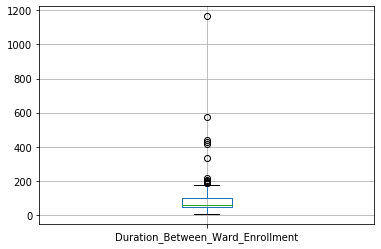

In [159]:
df.boxplot(column=['Duration_Between_Ward_Enrollment'])

In [160]:
df[df['Duration_Between_Ward_Enrollment']>200]

Patient_Registration_Number     Race           Education_level  \
117                    28683951    Malay           Form 5 graduate   
194                     9785051   Indian                   Unknown   
199                    28320760  Chinese                   Unknown   
245                    31373272   Indian                   Unknown   
249                     9860720  Chinese                   Unknown   
287                    32978755    Malay  Some secondary education   
339                     7602367  Chinese           Form 5 graduate   
359                    25612115  Chinese                   Unknown   

     Patient_occupation Date_of_latest_admission/_procedure Health_funding  \
117  Private employment                          2012-12-01    Self funded   
194  Private employment                          2011-01-11   Fully Funded   
199  Private employment                          2011-06-06    Self funded   
245  Private employment                          2013-02-06    Self funded   
249  Private employment                          2012-05-11    Self funded   
287  Government servant                          2012-06-09   Fully Funded   
339  Private employment                          2015-04-23    Self funded   
359  Private employment                          2015-10-01    Self funded   

    CR_Intake CR_Intake_Date Prescribed_Sessions AACVPR_Risk_Category  ...  \
117       Yes     2013-10-31           > 8 weeks                 High  ...   
194       Yes     2012-03-14             8 weeks         Intermediate  ...   
199       Yes     2013-01-03             6 weeks         Intermediate  ...   
245       Yes     2014-03-28           > 8 weeks                 High  ...   
249       Yes     2013-07-25             8 weeks                 High  ...   
287       Yes     2015-08-18             8 weeks                 High  ...   
339       Yes     2015-11-24             8 weeks                  Low  ...   
359       Yes     2016-04-25             8 weeks         Intermediate  ...   

    Post_Medication_ACEI/ARB Post_Medication_Aspirin  \
117                        0                       1   
194                        1                       1   
199                        1                       1   
245                        0                       1   
249                        1                       1   
287                        0                       1   
339                        0                       1   
359                        0                       1   

    Post_Medication_Beta-antagonist  Post_Medication_Statin*  \
117                               0                        1   
194                               1                        1   
199                               1                        1   
245                               1                        1   
249                               1                        1   
287                               1                        0   
339                               1                        0   
359                               1                        1   

     CR_Medication_ACEI/ARB  CR_Medication_Aspirin  \
117                       0                      1   
194                       0                      0   
199                       0                      0   
245                       0                      1   
249                       1                      1   
287                       0                      1   
339                       0                      1   
359                       0                      1   

    CR_Medication_Beta-antagonist CR_Medication_Statin*  CR_Completion  \
117                             0                     1            Yes   
194                             0                     0            Yes   
199                             0                     0             No   
245                             1                     1            Yes   
249                         

# Duration_CR

In [161]:
df['Duration_CR'] = df['CR_Discharge_Date'] - df['CR_Intake_Date']

In [162]:
df[['Duration_CR','CR_Discharge_Date','CR_Intake_Date']].head()

Duration_CR CR_Discharge_Date CR_Intake_Date
0    126 days        2015-07-22     2015-03-18
1    123 days        2014-06-15     2014-02-12
3     92 days        2015-06-19     2015-03-19
5     69 days        2014-10-16     2014-08-08
7    126 days        2015-03-04     2014-10-29

In [163]:
#remove the days and convert to numeric
df['Duration_CR'] = df['Duration_CR'].astype(str).str.replace(' days', '')
df['Duration_CR'] = pd.to_numeric(df['Duration_CR'], errors='coerce')

In [164]:
df['Duration_CR'].describe()

count     157.000000
mean       76.261146
std       333.961673
min     -3944.000000
25%        69.000000
50%        99.000000
75%       133.000000
max       469.000000
Name: Duration_CR, dtype: float64

In [165]:
#set negative number to missing data
df['Duration_CR'].mask(df['Duration_CR']<=0, inplace=True)

In [166]:
# set to 0 if didn't complete or not enroll to CR
df.loc[df['CR_Completion'].isin(['No', 'Did not enroll to CR']), 'Duration_CR'] = 0

In [167]:
df['Duration_CR'].describe()

count    174.000000
mean      97.701149
std       70.104977
min        0.000000
25%       57.750000
50%       95.500000
75%      126.000000
max      469.000000
Name: Duration_CR, dtype: float64

In [168]:
df.drop('CR_Intake_Date', axis = 1, inplace=True)
df.drop('CR_Discharge_Date', axis = 1, inplace=True)
df.drop('Date_of_latest_admission/_procedure', axis = 1, inplace=True)

# Pre_BMI

28.027682    1
25.744288    1
24.499541    1
32.970755    1
22.026035    1
            ..
21.093750    1
20.762472    1
25.805363    1
17.318656    1
34.705882    1
Name: Pre_BMI, Length: 169, dtype: int64 

17.208066658616108
43.45473465140479


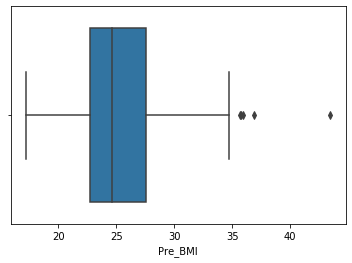

In [169]:
#BMI formula = Weight / Height (m * m)
df['Pre_BMI'] = df['Pre_Weight'] / (df['Height']/100 * df['Height']/100)

print(df['Pre_BMI'].value_counts(),'\n')

# Using boxplot graph to detect outlier in Pre_BMI
sns.boxplot(df['Pre_BMI'])

p1_pre_bmi = lower_whisker(df['Pre_BMI'])
print(p1_pre_bmi)
p2_pre_bmi = upper_whisker(df['Pre_BMI'])
print(p2_pre_bmi)

# Add Post_BMI

23.224413    2
27.255320    1
25.196788    1
25.524316    1
29.384757    1
            ..
20.504934    1
25.697314    1
29.216167    1
25.632748    1
35.830178    1
Name: Post_BMI, Length: 156, dtype: int64 

16.87695241186255
41.62330905306972


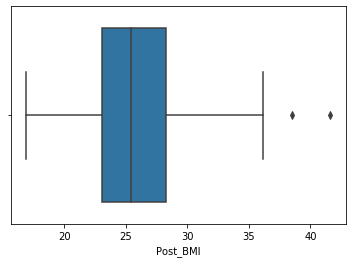

In [170]:
#BMI formula = Weight / Height (m * m)
df['Post_BMI'] = df['Post_Weight'] / (df['Height']/100 * df['Height']/100)

print(df['Post_BMI'].value_counts(),'\n')

# Using boxplot graph to detect outlier in Post_BMI
sns.boxplot(df['Post_BMI'])

p1_post_bmi = lower_whisker(df['Post_BMI'])
print(p1_post_bmi)
p2_post_bmi = upper_whisker(df['Post_BMI'])
print(p2_post_bmi)

# BMI categorization


In [171]:
#bmi, group it in 4 groups
#<18.5 – considered underweight and possibly malnourished.
#18.5 to 24.9 – within a healthy weight range for young and middle-aged adults.
#25.0 to 29.9 – considered overweight.
#>30 – considered obese.
# from https://www.betterhealth.vic.gov.au/health/healthyliving/body-mass-index-bmi
    
bins = [1, 18.5, 22.9, 27.4, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']
df['Pre_BMI_range'] = pd.cut(df['Pre_BMI'], bins, labels = labels,include_lowest = True)
df['Post_BMI_range'] = pd.cut(df['Post_BMI'], bins, labels = labels,include_lowest = True)
#new_df.drop('bmi', axis = 1, inplace=True)
df.head()

Patient_Registration_Number     Race                   Education_level  \
0                     8444773   Others  Form 6 / pre-university graduate   
1                    15302617  Chinese                           Unknown   
3                     6862705   Others       College/university graduate   
5                     2282933    Malay          Some secondary education   
7                     3531899    Malay                           Unknown   

                    Patient_occupation Health_funding CR_Intake  \
0                   Government servant   Fully Funded       Yes   
1  Self-employed (excludes housewives)    Self funded       Yes   
3  Self-employed (excludes housewives)    Self funded       Yes   
5                   Government servant   Fully Funded       Yes   
7                   Government servant   Fully Funded       Yes   

  Prescribed_Sessions AACVPR_Risk_Category CR_Adherence Triglyceride  ...  \
0             8 weeks                  Low          Yes            1  ...   
1             8 weeks         Intermediate          Yes          2.3  ...   
3             8 weeks         Intermediate          Yes          1.2  ...   
5             8 weeks         Intermediate          Yes          1.2  ...   
7             8 weeks                  Low          Yes          1.2  ...   

   CR_Medication_Aspirin  CR_Medication_Beta-antagonist  \
0                      0                              0   
1                      1                              0   
3                      1                              1   
5                      1                              0   
7                      0                              1   

   CR_Medication_Statin* CR_Completion Duration_Between_Ward_Enrollment  \
0                      0           Yes                            114.0   
1                      1           Yes                            116.0   
3                      1           Yes                            151.0   
5                      1           Yes                             88.0   
7                      1           Yes                             29.0   

   Duration_CR    Pre_BMI   Post_BMI Pre_BMI_range  Post_BMI_range  
0        126.0  19.027399  19.788495        Normal          Normal  
1        123.0  35.751278  35.049617       Obesity         Obesity  
3         92.0  23.610200  23.224413    Overweight      Overweight  
5         69.0  18.552876  19.817844        Normal          Normal  
7        126.0  27.636054  27.352608       Obesity      Overweight  

[5 rows x 99 columns]

# Peak Heart Rate Categorization

In [172]:
#peak heart rate, group it in 5 groups
# <114 – very light
#114 to 132 – light
#133 to 151 – moderate
#152 to 171 - hard
# > 172  - very hard
# from https://www.lifespanfitness.com/fitness/resources/target-heart-rate-calculator
    
bins = [1, 114, 132, 151, 171, 300]
labels = ['Very Light', 'Light', 'Moderate', 'Hard', 'Very Hard']
df['Pre_Peak_Heart_Rate_range'] = pd.cut(df['Pre_Peak_Heart_Rate'], bins, labels = labels,include_lowest = True)
df['Post_Peak_Heart_Rate_range'] = pd.cut(df['Post_Peak_Heart_Rate'], bins, labels = labels,include_lowest = True)
#new_df.drop('bmi', axis = 1, inplace=True)
df.head()

Patient_Registration_Number     Race                   Education_level  \
0                     8444773   Others  Form 6 / pre-university graduate   
1                    15302617  Chinese                           Unknown   
3                     6862705   Others       College/university graduate   
5                     2282933    Malay          Some secondary education   
7                     3531899    Malay                           Unknown   

                    Patient_occupation Health_funding CR_Intake  \
0                   Government servant   Fully Funded       Yes   
1  Self-employed (excludes housewives)    Self funded       Yes   
3  Self-employed (excludes housewives)    Self funded       Yes   
5                   Government servant   Fully Funded       Yes   
7                   Government servant   Fully Funded       Yes   

  Prescribed_Sessions AACVPR_Risk_Category CR_Adherence Triglyceride  ...  \
0             8 weeks                  Low          Yes            1  ...   
1             8 weeks         Intermediate          Yes          2.3  ...   
3             8 weeks         Intermediate          Yes          1.2  ...   
5             8 weeks         Intermediate          Yes          1.2  ...   
7             8 weeks                  Low          Yes          1.2  ...   

   CR_Medication_Statin*  CR_Completion  Duration_Between_Ward_Enrollment  \
0                      0            Yes                             114.0   
1                      1            Yes                             116.0   
3                      1            Yes                             151.0   
5                      1            Yes                              88.0   
7                      1            Yes                              29.0   

  Duration_CR    Pre_BMI   Post_BMI  Pre_BMI_range  Post_BMI_range  \
0       126.0  19.027399  19.788495         Normal          Normal   
1       123.0  35.751278  35.049617        Obesity         Obesity   
3        92.0  23.610200  23.224413     Overweight      Overweight   
5        69.0  18.552876  19.817844         Normal          Normal   
7       126.0  27.636054  27.352608        Obesity      Overweight   

  Pre_Peak_Heart_Rate_range  Post_Peak_Heart_Rate_range  
0                  Moderate                         NaN  
1                       NaN                         NaN  
3                       NaN                         NaN  
5                       NaN                         NaN  
7                      Hard                         NaN  

[5 rows x 101 columns]

# METS Categorization

In [173]:
#METS, group it in 3 groups
# <3.0 – light intensity
#3.0 to 6.0 – moderate intensity
# > 6.0  - vigorous intensity
# from https://www.healthline.com/health/what-are-mets#met-goals
    
bins = [1, 3.0, 6.0, 20.0]
labels = ['Light Intensity', 'Moderate Intensity', 'Vigorous Intensity']
df['Pre_METs_range'] = pd.cut(df['Pre_METs'], bins, labels = labels,include_lowest = True)
df['Post_Peak_METs_range'] = pd.cut(df['Post_Peak_METs'], bins, labels = labels,include_lowest = True)
#new_df.drop('bmi', axis = 1, inplace=True)
df.head()

Patient_Registration_Number     Race                   Education_level  \
0                     8444773   Others  Form 6 / pre-university graduate   
1                    15302617  Chinese                           Unknown   
3                     6862705   Others       College/university graduate   
5                     2282933    Malay          Some secondary education   
7                     3531899    Malay                           Unknown   

                    Patient_occupation Health_funding CR_Intake  \
0                   Government servant   Fully Funded       Yes   
1  Self-employed (excludes housewives)    Self funded       Yes   
3  Self-employed (excludes housewives)    Self funded       Yes   
5                   Government servant   Fully Funded       Yes   
7                   Government servant   Fully Funded       Yes   

  Prescribed_Sessions AACVPR_Risk_Category CR_Adherence Triglyceride  ...  \
0             8 weeks                  Low          Yes            1  ...   
1             8 weeks         Intermediate          Yes          2.3  ...   
3             8 weeks         Intermediate          Yes          1.2  ...   
5             8 weeks         Intermediate          Yes          1.2  ...   
7             8 weeks                  Low          Yes          1.2  ...   

   Duration_Between_Ward_Enrollment  Duration_CR    Pre_BMI   Post_BMI  \
0                             114.0        126.0  19.027399  19.788495   
1                             116.0        123.0  35.751278  35.049617   
3                             151.0         92.0  23.610200  23.224413   
5                              88.0         69.0  18.552876  19.817844   
7                              29.0        126.0  27.636054  27.352608   

  Pre_BMI_range  Post_BMI_range  Pre_Peak_Heart_Rate_range  \
0        Normal          Normal                   Moderate   
1       Obesity         Obesity                        NaN   
3    Overweight      Overweight                        NaN   
5        Normal          Normal                        NaN   
7       Obesity      Overweight                       Hard   

   Post_Peak_Heart_Rate_range      Pre_METs_range  Post_Peak_METs_range  
0                         NaN  Vigorous Intensity                   NaN  
1                         NaN  Vigorous Intensity    Vigorous Intensity  
3                         NaN  Moderate Intensity                   NaN  
5                         NaN  Vigorous Intensity    Vigorous Intensity  
7                         NaN  Vigorous Intensity                   NaN  

[5 rows x 103 columns]

# Summary of Data

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 384
Columns: 103 entries, Patient_Registration_Number to Post_Peak_METs_range
dtypes: category(6), float64(24), int64(36), object(37)
memory usage: 147.1+ KB


In [175]:
df.to_excel('CR_Data_Cleaned.xlsx', index=False)

<a id='4.DataImputation'></a>
## 4. Data Imputation

In [176]:
# Read data from file 'data.csv' 
df = pd.read_excel('CR_Data_Cleaned.xlsx', sheet_name='Sheet1')

print(df.shape)

(184, 103)


In [177]:
## drop columns that genarated a new column by data categorization 
df.drop('Patient_Registration_Number', axis = 1, inplace=True)
df.drop('latitude', axis = 1, inplace=True)
df.drop('longitude', axis = 1, inplace=True)
df.drop('Triglyceride', axis = 1, inplace=True)
df.drop('HDL', axis = 1, inplace=True)
df.drop('LDL', axis = 1, inplace=True)
df.drop('HbA1c', axis = 1, inplace=True)
df.drop('Pre_Weight', axis = 1, inplace=True)
df.drop('Post_Weight', axis = 1, inplace=True)
df.drop('Height', axis = 1, inplace=True)
df.drop('Pre_METs', axis = 1, inplace=True)
df.drop('Post_Peak_METs', axis = 1, inplace=True)
df.drop('Pre_Peak_Heart_Rate', axis = 1, inplace=True)
df.drop('Post_Peak_Heart_Rate', axis = 1, inplace=True)
df.drop('Pre_RTW', axis = 1, inplace=True)
df.drop('Residential_Postcode', axis = 1, inplace=True)
df.drop('Pre_BP_systolic', axis = 1, inplace=True)
df.drop('Pre_BP_diastolic', axis = 1, inplace=True)
df.drop('CR_BP_systolic', axis = 1, inplace=True)
df.drop('CR_BP_diastolic', axis = 1, inplace=True)
df.drop('Pre_BMI', axis = 1, inplace=True)
df.drop('Post_BMI', axis = 1, inplace=True)

In [178]:
print(df.shape)

#check number of data is null
df.isnull().sum().sum()

(184, 81)


776

In [179]:
cat_columns = list(df.columns)

# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}

# Loop over columns to encode
for col_name in cat_columns:
  # Create ordinal encoder for the column
  ordinal_enc_dict[col_name] = OrdinalEncoder()

  # Select the nin-null values in the column
  col = df[col_name]
  col_not_null = col[col.notnull()]
  reshaped_vals = col_not_null.values.reshape(-1, 1)

  # Encode the non-null values of the column
  encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)

  # Replace the ambience column with ordinal values
  df.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [180]:
df_KNN_imputed = df[list(df.columns)].copy()

KNN_imputer = KNNImputer()

df_KNN_imputed.iloc[:, :] = np.round(KNN_imputer.fit_transform(df_KNN_imputed))

for col in df_KNN_imputed:
  reshaped_col = df_KNN_imputed[col].values.reshape(-1, 1)
  df_KNN_imputed[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

In [181]:
df_KNN_imputed.head()
df_KNN_imputed.shape

(184, 81)

In [182]:
#check number of data is null
df_KNN_imputed.isnull().sum().sum()

0

In [183]:
df_KNN_imputed.to_excel('CR_Data_KNN_Imputed.xlsx', index=False)

<a id='5.DataVisualization'></a>
## 5. Data Visualization

In [184]:
df_KNN_imputed = pd.read_excel('CR_Data_KNN_Imputed.xlsx', sheet_name='Sheet1')
df_KNN_imputed.shape

(184, 81)

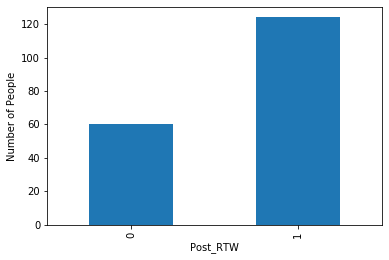

Post_RTW
0     60
1    124
Name: Post_RTW, dtype: int64
There are 67.39 percent of samples had return to work after rehad.


In [185]:
# for Post_RTW
fig,ax = plt.subplots()
df_KNN_imputed['Post_RTW'].value_counts().plot(ax=ax, kind='bar')
plt.xlabel('Post_RTW')
plt.ylabel('Number of People')
plt.show()

print(df_KNN_imputed.groupby('Post_RTW')['Post_RTW'].count())
print("There are %.2f percent of samples had return to work after rehad." %(df_KNN_imputed['Post_RTW'].mean()*100))

28.875
75


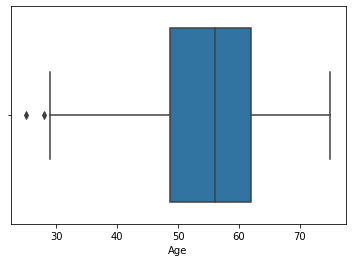

In [186]:
# Using boxplot graph to detect outlier in Exercise_frequency_mins_week
sns.boxplot(df_KNN_imputed['Age'])

p1_age = lower_whisker(df_KNN_imputed['Age'])
print(p1_age)
p2_age = upper_whisker(df_KNN_imputed['Age'])
print(p2_age)

In [187]:
df_KNN_imputed['Exercise_frequency_mins_week'].describe()

count    184.000000
mean      30.736413
std       47.537501
min        0.000000
25%       13.750000
50%       30.000000
75%       40.000000
max      600.000000
Name: Exercise_frequency_mins_week, dtype: float64

0.0
79.375


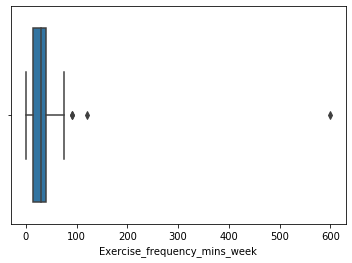

In [188]:
# Using boxplot graph to detect outlier in Exercise_frequency_mins_week
sns.boxplot(df_KNN_imputed['Exercise_frequency_mins_week'])
p1_exercise = lower_whisker(df_KNN_imputed['Exercise_frequency_mins_week'])
print(p1_exercise)
p2_exercise = upper_whisker(df_KNN_imputed['Exercise_frequency_mins_week'])
print(p2_exercise)

0.0
11.0


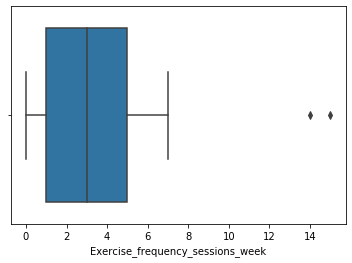

In [189]:
# Using boxplot graph to detect outlier in Exercise_frequency_sessions_week
sns.boxplot(df_KNN_imputed['Exercise_frequency_sessions_week'])
p1_exercise = lower_whisker(df_KNN_imputed['Exercise_frequency_sessions_week'])
print(p1_exercise)
p2_exercise = upper_whisker(df_KNN_imputed['Exercise_frequency_sessions_week'])
print(p2_exercise)

0
8


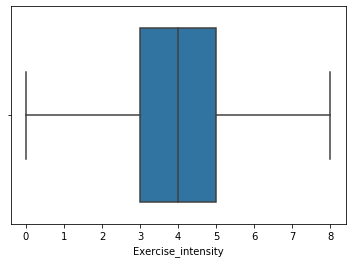

In [190]:
# Using boxplot graph to detect outlier in Exercise_intensity
sns.boxplot(df_KNN_imputed['Exercise_intensity'])
p1_exercise = lower_whisker(df_KNN_imputed['Exercise_intensity'])
print(p1_exercise)
p2_exercise = upper_whisker(df_KNN_imputed['Exercise_intensity'])
print(p2_exercise)

In [191]:
import plotly.express as px
import numpy as np
#df = px.data.gapminder().query("year == 2007")
#fig = px.treemap(df, path=[px.Constant('world'), 'continent', 'country'], values='pop',
#                  color='lifeExp', hover_data=['iso_alpha'])
#df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df_KNN_imputed, path=[px.Constant('Malaysia'), 'state_name', 'place_name'])
fig.show()

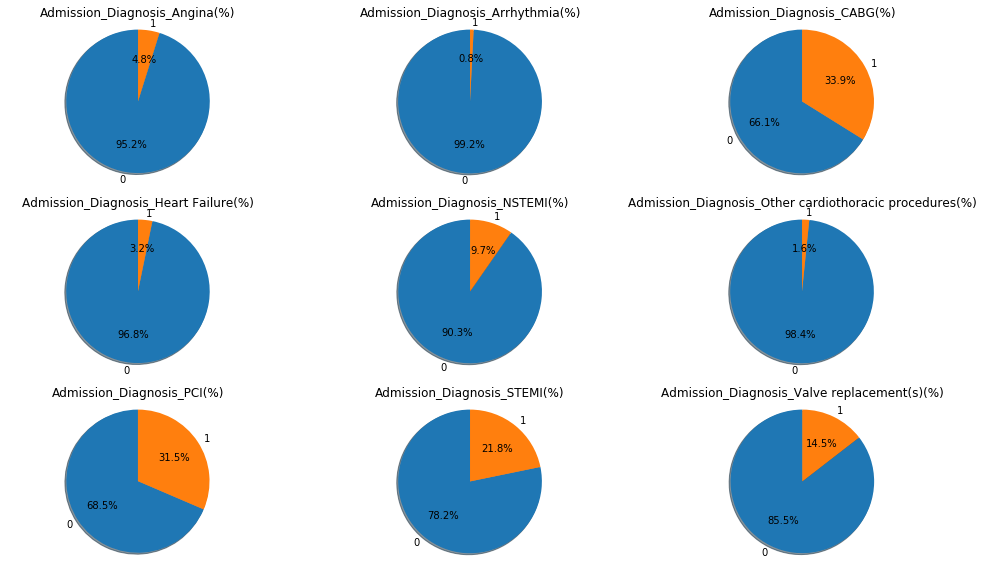

In [192]:
# Post_RTW by Admission_Diagnosis
fig = plt.figure(figsize=(14, 8))

gs1 = gridspec.GridSpec(3, 3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax4 = fig.add_subplot(gs1[3])
ax5 = fig.add_subplot(gs1[4])
ax6 = fig.add_subplot(gs1[5])
ax7 = fig.add_subplot(gs1[6])
ax8 = fig.add_subplot(gs1[7])
ax9 = fig.add_subplot(gs1[8])

#ax1
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Admission_Diagnosis_Angina']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Admission_Diagnosis_Angina(%)")

#ax2
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Admission_Diagnosis_Arrhythmia']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Admission_Diagnosis_Arrhythmia(%)")

#ax3
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Admission_Diagnosis_CABG']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("Admission_Diagnosis_CABG(%)")

#ax4
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Admission_Diagnosis_Heart Failure']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("Admission_Diagnosis_Heart Failure(%)")

#ax5
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Admission_Diagnosis_NSTEMI']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax5.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax5.set_title("Admission_Diagnosis_NSTEMI(%)")

#ax6
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Admission_Diagnosis_Other cardiothoracic procedures']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax6.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax6.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax6.set_title("Admission_Diagnosis_Other cardiothoracic procedures(%)")

#ax7
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Admission_Diagnosis_PCI']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax7.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax7.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax7.set_title("Admission_Diagnosis_PCI(%)")

#ax8
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Admission_Diagnosis_STEMI']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax8.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax8.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax8.set_title("Admission_Diagnosis_STEMI(%)")

#ax9
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Admission_Diagnosis_Valve replacement(s)']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax9.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax9.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax9.set_title("Admission_Diagnosis_Valve replacement(s)(%)")


gs1.tight_layout(fig)

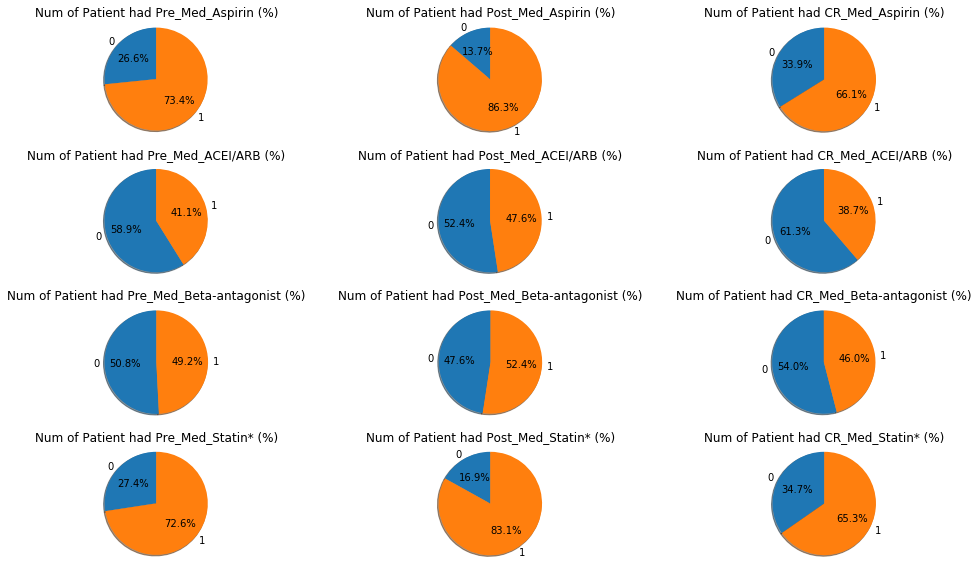

In [193]:
# Post_RTW by Post_Medication
fig = plt.figure(figsize=(14, 8))

gs1 = gridspec.GridSpec(4, 3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax4 = fig.add_subplot(gs1[3])
ax5 = fig.add_subplot(gs1[4])
ax6 = fig.add_subplot(gs1[5])
ax7 = fig.add_subplot(gs1[6])
ax8 = fig.add_subplot(gs1[7])
ax9 = fig.add_subplot(gs1[8])
ax10 = fig.add_subplot(gs1[9])
ax11 = fig.add_subplot(gs1[10])
ax12 = fig.add_subplot(gs1[11])

##Pre_Medication
#ax1
postrtw_pre_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Pre_Medication_Aspirin']).size().reset_index(name='Size')
postrtw_pre_medication = postrtw_pre_medication_df[postrtw_pre_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_pre_medication_df.Post_RTW.unique()
sizes = postrtw_pre_medication
explode = (0, 0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Num of Patient had Pre_Med_Aspirin (%)")

#ax4
postrtw_pre_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Pre_Medication_ACEI/ARB']).size().reset_index(name='Size')
postrtw_pre_medication = postrtw_pre_medication_df[postrtw_pre_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_pre_medication_df.Post_RTW.unique()
sizes = postrtw_pre_medication
explode = (0, 0)
ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("Num of Patient had Pre_Med_ACEI/ARB (%)")

#ax7
postrtw_pre_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Pre_Medication_Beta-antagonist']).size().reset_index(name='Size')
postrtw_pre_medication = postrtw_pre_medication_df[postrtw_pre_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_pre_medication_df.Post_RTW.unique()
sizes = postrtw_pre_medication
explode = (0, 0)
ax7.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax7.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax7.set_title("Num of Patient had Pre_Med_Beta-antagonist (%)")

#ax10
postrtw_pre_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Pre_Medication_Statin']).size().reset_index(name='Size')
postrtw_pre_medication = postrtw_pre_medication_df[postrtw_pre_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_pre_medication_df.Post_RTW.unique()
sizes = postrtw_pre_medication
explode = (0, 0)
ax10.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax10.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax10.set_title("Num of Patient had Pre_Med_Statin* (%)")

##Post_Medication
#ax2
postrtw_post_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Post_Medication_Aspirin']).size().reset_index(name='Size')
postrtw_post_medication = postrtw_post_medication_df[postrtw_post_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_post_medication_df.Post_RTW.unique()
sizes = postrtw_post_medication
explode = (0, 0)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Num of Patient had Post_Med_Aspirin (%)")

#ax5
postrtw_post_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Post_Medication_ACEI/ARB']).size().reset_index(name='Size')
postrtw_post_medication = postrtw_post_medication_df[postrtw_post_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_post_medication_df.Post_RTW.unique()
sizes = postrtw_post_medication
explode = (0, 0)
ax5.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax5.set_title("Num of Patient had Post_Med_ACEI/ARB (%)")

#ax8
postrtw_post_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Post_Medication_Beta-antagonist']).size().reset_index(name='Size')
postrtw_post_medication = postrtw_post_medication_df[postrtw_post_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_post_medication_df.Post_RTW.unique()
sizes = postrtw_post_medication
explode = (0, 0)
ax8.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax8.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax8.set_title("Num of Patient had Post_Med_Beta-antagonist (%)")

#ax11
postrtw_post_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Post_Medication_Statin*']).size().reset_index(name='Size')
postrtw_post_medication = postrtw_post_medication_df[postrtw_post_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_post_medication_df.Post_RTW.unique()
sizes = postrtw_post_medication
explode = (0, 0)
ax11.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax11.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax11.set_title("Num of Patient had Post_Med_Statin* (%)")

##CR_Medication
#ax3
postrtw_cr_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'CR_Medication_Aspirin']).size().reset_index(name='Size')
postrtw_cr_medication = postrtw_cr_medication_df[postrtw_cr_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_cr_medication_df.Post_RTW.unique()
sizes = postrtw_cr_medication
explode = (0, 0)
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("Num of Patient had CR_Med_Aspirin (%)")

#ax6
postrtw_cr_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'CR_Medication_ACEI/ARB']).size().reset_index(name='Size')
postrtw_cr_medication = postrtw_cr_medication_df[postrtw_cr_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_cr_medication_df.Post_RTW.unique()
sizes = postrtw_cr_medication
explode = (0, 0)
ax6.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax6.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax6.set_title("Num of Patient had CR_Med_ACEI/ARB (%)")

#ax9
postrtw_cr_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'CR_Medication_Beta-antagonist']).size().reset_index(name='Size')
postrtw_cr_medication = postrtw_cr_medication_df[postrtw_cr_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_cr_medication_df.Post_RTW.unique()
sizes = postrtw_cr_medication
explode = (0, 0)
ax9.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax9.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax9.set_title("Num of Patient had CR_Med_Beta-antagonist (%)")

#ax12
postrtw_cr_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'CR_Medication_Statin*']).size().reset_index(name='Size')
postrtw_cr_medication = postrtw_cr_medication_df[postrtw_cr_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_cr_medication_df.Post_RTW.unique()
sizes = postrtw_cr_medication
explode = (0, 0)
ax12.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax12.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax12.set_title("Num of Patient had CR_Med_Statin* (%)")

gs1.tight_layout(fig)

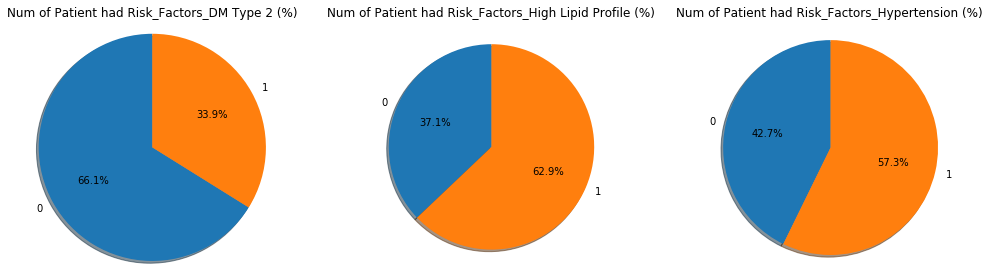

In [194]:
# Post_RTW by Risk_Factors
fig = plt.figure(figsize=(14, 4))

gs1 = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])

#ax1
postrtw_rf_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Risk_Factors_DM Type 2']).size().reset_index(name='Size')
postrtw_rf_medication = postrtw_rf_medication_df[postrtw_rf_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_rf_medication_df.Post_RTW.unique()
sizes = postrtw_rf_medication
explode = (0, 0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Num of Patient had Risk_Factors_DM Type 2 (%)")

#ax2
postrtw_rf_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Risk_Factors_High Lipid Profile']).size().reset_index(name='Size')
postrtw_rf_medication = postrtw_rf_medication_df[postrtw_rf_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_rf_medication_df.Post_RTW.unique()
sizes = postrtw_rf_medication
explode = (0, 0)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Num of Patient had Risk_Factors_High Lipid Profile (%)")

#ax3
postrtw_rf_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Risk_Factors_Hypertension']).size().reset_index(name='Size')
postrtw_rf_medication = postrtw_rf_medication_df[postrtw_rf_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_rf_medication_df.Post_RTW.unique()
sizes = postrtw_rf_medication
explode = (0, 0)
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("Num of Patient had Risk_Factors_Hypertension (%)")


gs1.tight_layout(fig)

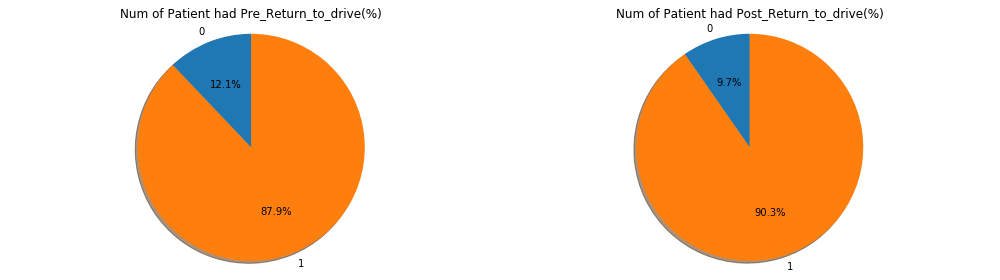

In [195]:
# Post_RTW by Pre_Return_to_drive
fig = plt.figure(figsize=(14, 4))

gs1 = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

#ax1
postrtw_rf_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Pre_Return_to_drive']).size().reset_index(name='Size')
postrtw_rf_medication = postrtw_rf_medication_df[postrtw_rf_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_rf_medication_df.Pre_Return_to_drive.unique()
sizes = postrtw_rf_medication
explode = (0, 0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Num of Patient had Pre_Return_to_drive(%)")

#ax2
postrtw_rf_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Post_Return_to_drive']).size().reset_index(name='Size')
postrtw_rf_medication = postrtw_rf_medication_df[postrtw_rf_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_rf_medication_df.Post_Return_to_drive.unique()
sizes = postrtw_rf_medication
explode = (0, 0)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Num of Patient had Post_Return_to_drive(%)")

gs1.tight_layout(fig)

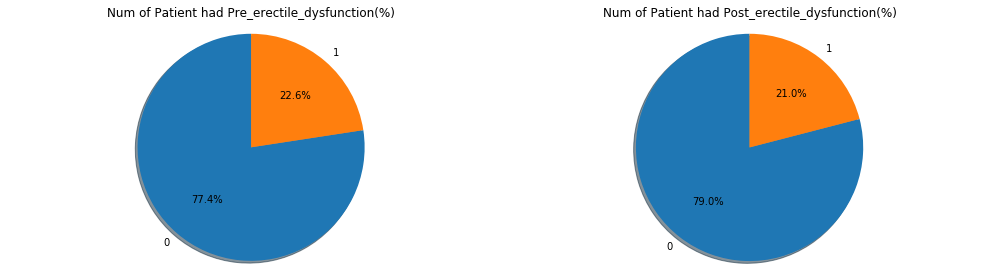

In [196]:
# Post_RTW by erectile_dysfunction
fig = plt.figure(figsize=(14, 4))

gs1 = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

#ax1
postrtw_rf_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Pre_erectile_dysfunction']).size().reset_index(name='Size')
postrtw_rf_medication = postrtw_rf_medication_df[postrtw_rf_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_rf_medication_df.Pre_erectile_dysfunction.unique()
sizes = postrtw_rf_medication
explode = (0, 0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Num of Patient had Pre_erectile_dysfunction(%)")

#ax2
postrtw_rf_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Post_erectile_dysfunction']).size().reset_index(name='Size')
postrtw_rf_medication = postrtw_rf_medication_df[postrtw_rf_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_rf_medication_df.Post_erectile_dysfunction.unique()
sizes = postrtw_rf_medication
explode = (0, 0)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Num of Patient had Post_erectile_dysfunction(%)")

gs1.tight_layout(fig)

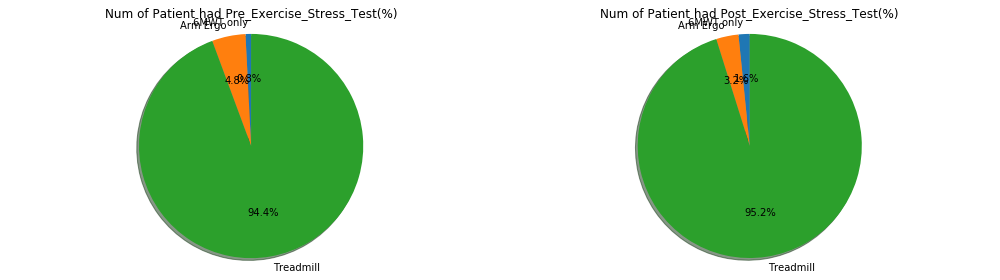

In [197]:
# Post_RTW by Risk_Factors
fig = plt.figure(figsize=(14, 4))

gs1 = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

#ax1
postrtw_rf_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Pre_Exercise_Stress_Test']).size().reset_index(name='Size')
postrtw_rf_medication = postrtw_rf_medication_df[postrtw_rf_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_rf_medication_df.Pre_Exercise_Stress_Test.unique()
sizes = postrtw_rf_medication
explode = (0, 0, 0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Num of Patient had Pre_Exercise_Stress_Test(%)")

#ax2
postrtw_rf_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Post_Exercise_Stress_Test']).size().reset_index(name='Size')
postrtw_rf_medication = postrtw_rf_medication_df[postrtw_rf_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_rf_medication_df.Post_Exercise_Stress_Test.unique()
sizes = postrtw_rf_medication
explode = (0, 0, 0)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Num of Patient had Post_Exercise_Stress_Test(%)")


gs1.tight_layout(fig)

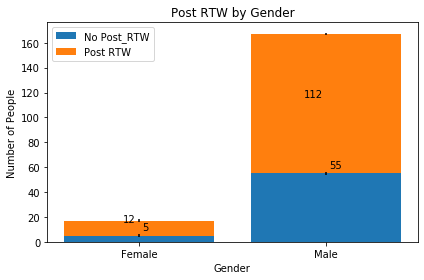

In [198]:
# Post RTW Vs Gender
postrtw_gender_df = df_KNN_imputed.groupby(['Gender', 'Post_RTW']).size().reset_index(name='Size')
gender_rtw = postrtw_gender_df[postrtw_gender_df['Post_RTW'] == 0]['Size'].tolist()
gender_no_rtw = postrtw_gender_df[postrtw_gender_df['Post_RTW'] == 1]['Size'].tolist()

gender_up = (1, 1)
gender_bottom = (1, 1)

N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.8       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind, gender_rtw, width, yerr=gender_up, label='No Post_RTW')
rects2 = ax.bar(ind, gender_no_rtw, width, yerr=gender_bottom, bottom=gender_rtw, label='Post RTW')
ax.set_ylabel('Number of People')
ax.set_xlabel('Gender')
ax.set_title('Post RTW by Gender')
ax.set_xticks(ind)
ax.set_xticklabels(postrtw_gender_df.Gender.unique())
ax.legend()

autolabel(rects1, "right")
autolabel(rects2, "left")
fig.tight_layout()
plt.show()

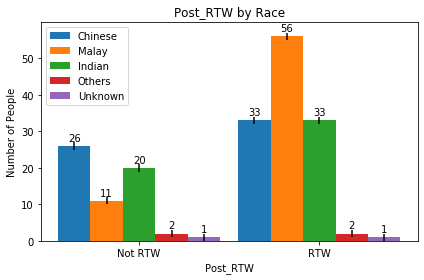

In [199]:
# Post RTW Vs Race
postrtw_race_df = df_KNN_imputed.groupby(['Post_RTW','Race']).size().reset_index(name='Size')

postrtw_race_1 = postrtw_race_df[postrtw_race_df['Race'] == 'Chinese']['Size'].tolist()
postrtw_race_2 = postrtw_race_df[postrtw_race_df['Race'] == 'Malay']['Size'].tolist()
postrtw_race_3 = postrtw_race_df[postrtw_race_df['Race'] == 'Indian']['Size'].tolist()
postrtw_race_4 = postrtw_race_df[postrtw_race_df['Race'] == 'Others']['Size'].tolist()
postrtw_race_5 = postrtw_race_df[postrtw_race_df['Race'] == 'Unknown']['Size'].tolist()

postrtw_race_1_std = (1, 1)
postrtw_race_2_std = (1, 1)
postrtw_race_3_std = (1, 1)
postrtw_race_4_std = (1, 1)
postrtw_race_5_std = (1, 1)

ind = np.arange(len(postrtw_race_1))  # the x locations for the groups
width = 0.18  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - (2*width), postrtw_race_1, width, yerr=postrtw_race_1_std, label='Chinese')
rects2 = ax.bar(ind - width, postrtw_race_2, width, yerr=postrtw_race_2_std, label='Malay')
rects3 = ax.bar(ind , postrtw_race_3, width, yerr=postrtw_race_3_std, label='Indian')
rects4 = ax.bar(ind + width, postrtw_race_4, width, yerr=postrtw_race_4_std, label='Others')
rects5 = ax.bar(ind + (2*width), postrtw_race_5, width, yerr=postrtw_race_5_std, label='Unknown')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Race')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")

fig.tight_layout()

plt.show()

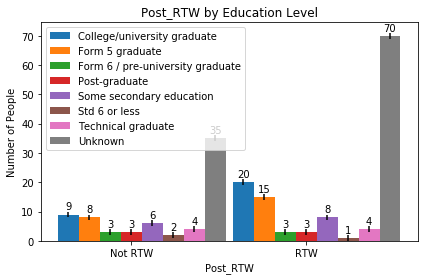

In [200]:
# Post RTW Vs Education_level
postrtw_edu_df = df_KNN_imputed.groupby(['Post_RTW','Education_level']).size().reset_index(name='Size')

postrtw_edu_1 = postrtw_edu_df[postrtw_edu_df['Education_level'] == 'College/university graduate']['Size'].tolist()
postrtw_edu_2 = postrtw_edu_df[postrtw_edu_df['Education_level'] == 'Form 5 graduate']['Size'].tolist()
postrtw_edu_3 = postrtw_edu_df[postrtw_edu_df['Education_level'] == 'Form 6 / pre-university graduate']['Size'].tolist()
postrtw_edu_4 = postrtw_edu_df[postrtw_edu_df['Education_level'] == 'Post-graduate']['Size'].tolist()
postrtw_edu_5 = postrtw_edu_df[postrtw_edu_df['Education_level'] == 'Some secondary education']['Size'].tolist()
postrtw_edu_6 = postrtw_edu_df[postrtw_edu_df['Education_level'] == 'Std 6 or less']['Size'].tolist()
postrtw_edu_7 = postrtw_edu_df[postrtw_edu_df['Education_level'] == 'Technical graduate']['Size'].tolist()
postrtw_edu_8 = postrtw_edu_df[postrtw_edu_df['Education_level'] == 'Unknown']['Size'].tolist()

postrtw_edu_1_std = (1, 1)
postrtw_edu_2_std = (1, 1)
postrtw_edu_3_std = (1, 1)
postrtw_edu_4_std = (1, 1)
postrtw_edu_5_std = (1, 1)
postrtw_edu_6_std = (1, 1)
postrtw_edu_7_std = (1, 1)
postrtw_edu_8_std = (1, 1)

ind = np.arange(len(postrtw_race_1))  # the x locations for the groups
width = 0.12  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - (3*width), postrtw_edu_1, width, yerr=postrtw_edu_1_std, label='College/university graduate')
rects2 = ax.bar(ind - (2*width), postrtw_edu_2, width, yerr=postrtw_edu_2_std, label='Form 5 graduate')
rects3 = ax.bar(ind - width, postrtw_edu_3, width, yerr=postrtw_edu_3_std, label='Form 6 / pre-university graduate')
rects4 = ax.bar(ind , postrtw_edu_4, width, yerr=postrtw_edu_4_std, label='Post-graduate')
rects5 = ax.bar(ind + (width), postrtw_edu_5, width, yerr=postrtw_edu_5_std, label='Some secondary education')
rects6 = ax.bar(ind + (2*width), postrtw_edu_6, width, yerr=postrtw_edu_6_std, label='Std 6 or less')
rects7 = ax.bar(ind + (3*width), postrtw_edu_7, width, yerr=postrtw_edu_7_std, label='Technical graduate')
rects8 = ax.bar(ind + (4*width), postrtw_edu_8, width, yerr=postrtw_edu_8_std, label='Unknown')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Education Level')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")
autolabel(rects6, "center")
autolabel(rects7, "center")
autolabel(rects8, "center")

fig.tight_layout()

plt.show()

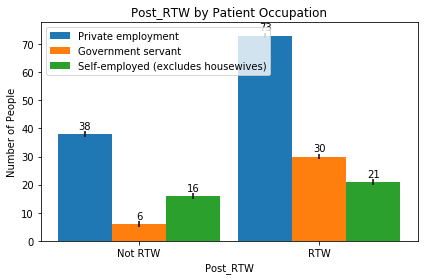

In [201]:
# Post RTW Vs Occupation
postrtw_occupation_df = df_KNN_imputed.groupby(['Post_RTW','Patient_occupation']).size().reset_index(name='Size')

postrtw_occupation_1 = postrtw_occupation_df[postrtw_occupation_df['Patient_occupation'] == 'Private employment']['Size'].tolist()
postrtw_occupation_2 = postrtw_occupation_df[postrtw_occupation_df['Patient_occupation'] == 'Government servant']['Size'].tolist()
postrtw_occupation_3 = postrtw_occupation_df[postrtw_occupation_df['Patient_occupation'] == 'Self-employed (excludes housewives)']['Size'].tolist()

postrtw_occupation_1_std = (1, 1)
postrtw_occupation_2_std = (1, 1)
postrtw_occupation_3_std = (1, 1)

ind = np.arange(len(postrtw_occupation_1))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_occupation_1, width, yerr=postrtw_occupation_1_std, label='Private employment')
rects2 = ax.bar(ind , postrtw_occupation_2, width, yerr=postrtw_occupation_2_std, label='Government servant')
rects3 = ax.bar(ind + width, postrtw_occupation_3, width, yerr=postrtw_occupation_3_std, label='Self-employed (excludes housewives)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Patient Occupation')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

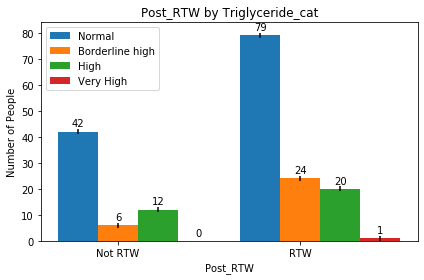

In [202]:
# Post RTW Vs Triglyceride_cat
postrtw_trigyceride_df = df_KNN_imputed.groupby(['Post_RTW','Triglyceride_cat']).size().reset_index(name='Size')

postrtw_trigyceride_1 = postrtw_trigyceride_df[postrtw_trigyceride_df['Triglyceride_cat'] == 'Normal']['Size'].tolist()
postrtw_trigyceride_2 = postrtw_trigyceride_df[postrtw_trigyceride_df['Triglyceride_cat'] == 'Borderline high']['Size'].tolist()
postrtw_trigyceride_3 = postrtw_trigyceride_df[postrtw_trigyceride_df['Triglyceride_cat'] == 'High']['Size'].tolist()
postrtw_trigyceride_4 = postrtw_trigyceride_df[postrtw_trigyceride_df['Triglyceride_cat'] == 'Very High']['Size'].tolist()

postrtw_trigyceride_4.insert(0, 0)

postrtw_trigyceride_1_std = (1, 1)
postrtw_trigyceride_2_std = (1, 1)
postrtw_trigyceride_3_std = (1, 1)
postrtw_trigyceride_4_std = (0, 1)

ind = np.arange(len(postrtw_trigyceride_1))  # the x locations for the groups
width = 0.22  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_trigyceride_1, width, yerr=postrtw_trigyceride_1_std, label='Normal')
rects2 = ax.bar(ind , postrtw_trigyceride_2, width, yerr=postrtw_trigyceride_2_std, label='Borderline high')
rects3 = ax.bar(ind + width, postrtw_trigyceride_3, width, yerr=postrtw_trigyceride_3_std, label='High')
rects4 = ax.bar(ind + 2*width, postrtw_trigyceride_4, width, yerr=postrtw_trigyceride_4_std, label='Very High')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Triglyceride_cat')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")

fig.tight_layout()

plt.show()

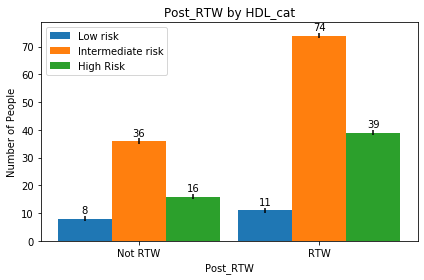

In [203]:
# Post RTW Vs HDL_cat
postrtw_hdl_df = df_KNN_imputed.groupby(['Post_RTW','HDL_cat']).size().reset_index(name='Size')

postrtw_hdl_1 = postrtw_hdl_df[postrtw_hdl_df['HDL_cat'] == 'Low risk']['Size'].tolist()
postrtw_hdl_2 = postrtw_hdl_df[postrtw_hdl_df['HDL_cat'] == 'Intermediate risk']['Size'].tolist()
postrtw_hdl_3 = postrtw_hdl_df[postrtw_hdl_df['HDL_cat'] == 'High Risk']['Size'].tolist()

postrtw_hdl_1_std = (1, 1)
postrtw_hdl_2_std = (1, 1)
postrtw_hdl_3_std = (1, 1)

ind = np.arange(len(postrtw_hdl_1))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_hdl_1, width, yerr=postrtw_hdl_1_std, label='Low risk')
rects2 = ax.bar(ind , postrtw_hdl_2, width, yerr=postrtw_hdl_2_std, label='Intermediate risk')
rects3 = ax.bar(ind + width, postrtw_hdl_3, width, yerr=postrtw_hdl_3_std, label='High Risk')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by HDL_cat')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

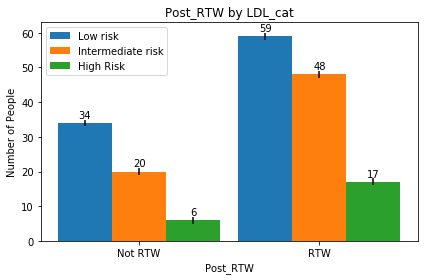

In [204]:
# Post RTW Vs LDL_cat
postrtw_ldl_df = df_KNN_imputed.groupby(['Post_RTW','LDL_cat']).size().reset_index(name='Size')

postrtw_ldl_1 = postrtw_ldl_df[postrtw_ldl_df['LDL_cat'] == 'Low Risk']['Size'].tolist()
postrtw_ldl_2 = postrtw_ldl_df[postrtw_ldl_df['LDL_cat'] == 'Intermediate risk']['Size'].tolist()
postrtw_ldl_3 = postrtw_ldl_df[postrtw_ldl_df['LDL_cat'] == 'High risk']['Size'].tolist()

postrtw_ldl_1_std = (1, 1)
postrtw_ldl_2_std = (1, 1)
postrtw_ldl_3_std = (1, 1)

ind = np.arange(len(postrtw_ldl_1))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_ldl_1, width, yerr=postrtw_ldl_1_std, label='Low risk')
rects2 = ax.bar(ind , postrtw_ldl_2, width, yerr=postrtw_ldl_2_std, label='Intermediate risk')
rects3 = ax.bar(ind + width, postrtw_ldl_3, width, yerr=postrtw_ldl_3_std, label='High Risk')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by LDL_cat')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

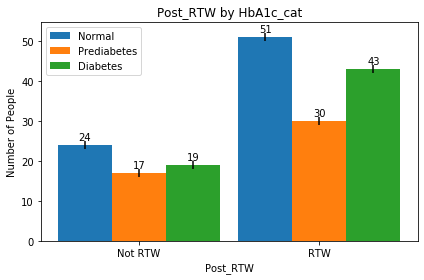

In [205]:
# Post RTW Vs HbA1c_cat
postrtw_HbA1c_df = df_KNN_imputed.groupby(['Post_RTW','HbA1c_cat']).size().reset_index(name='Size')

postrtw_HbA1c_1 = postrtw_HbA1c_df[postrtw_HbA1c_df['HbA1c_cat'] == 'Normal']['Size'].tolist()
postrtw_HbA1c_2 = postrtw_HbA1c_df[postrtw_HbA1c_df['HbA1c_cat'] == 'Prediabetes']['Size'].tolist()
postrtw_HbA1c_3 = postrtw_HbA1c_df[postrtw_HbA1c_df['HbA1c_cat'] == 'Diabetes']['Size'].tolist()

postrtw_HbA1c_1_std = (1, 1)
postrtw_HbA1c_2_std = (1, 1)
postrtw_HbA1c_3_std = (1, 1)

ind = np.arange(len(postrtw_HbA1c_1))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_HbA1c_1, width, yerr=postrtw_HbA1c_1_std, label='Normal')
rects2 = ax.bar(ind , postrtw_HbA1c_2, width, yerr=postrtw_HbA1c_2_std, label='Prediabetes')
rects3 = ax.bar(ind + width, postrtw_HbA1c_3, width, yerr=postrtw_HbA1c_3_std, label='Diabetes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by HbA1c_cat')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

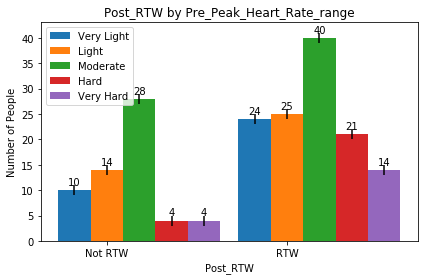

In [206]:
## Post RTW by Pre_Peak_Heart_Rate_range
postrtw_pre_hr_df = df_KNN_imputed.groupby(['Post_RTW','Pre_Peak_Heart_Rate_range']).size().reset_index(name='Size')

postrtw_pre_hr_1 = postrtw_pre_hr_df[postrtw_pre_hr_df['Pre_Peak_Heart_Rate_range'] == 'Very Light']['Size'].tolist()
postrtw_pre_hr_2 = postrtw_pre_hr_df[postrtw_pre_hr_df['Pre_Peak_Heart_Rate_range'] == 'Light']['Size'].tolist()
postrtw_pre_hr_3 = postrtw_pre_hr_df[postrtw_pre_hr_df['Pre_Peak_Heart_Rate_range'] == 'Moderate']['Size'].tolist()
postrtw_pre_hr_4 = postrtw_pre_hr_df[postrtw_pre_hr_df['Pre_Peak_Heart_Rate_range'] == 'Hard']['Size'].tolist()
postrtw_pre_hr_5 = postrtw_pre_hr_df[postrtw_pre_hr_df['Pre_Peak_Heart_Rate_range'] == 'Very Hard']['Size'].tolist()

postrtw_pre_hr_1_std = (1, 1)
postrtw_pre_hr_2_std = (1, 1)
postrtw_pre_hr_3_std = (1, 1)
postrtw_pre_hr_4_std = (1, 1)
postrtw_pre_hr_5_std = (1, 1)

ind = np.arange(len(postrtw_pre_hr_1))  # the x locations for the groups
width = 0.18  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_pre_hr_1, width, yerr=postrtw_pre_hr_1_std, label='Very Light')
rects2 = ax.bar(ind , postrtw_pre_hr_2, width, yerr=postrtw_pre_hr_2_std, label='Light')
rects3 = ax.bar(ind + width, postrtw_pre_hr_3, width, yerr=postrtw_pre_hr_3_std, label='Moderate')
rects4 = ax.bar(ind + 2*width, postrtw_pre_hr_4, width, yerr=postrtw_pre_hr_4_std, label='Hard')
rects5 = ax.bar(ind + 3*width, postrtw_pre_hr_5, width, yerr=postrtw_pre_hr_5_std, label='Very Hard')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Pre_Peak_Heart_Rate_range')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")

fig.tight_layout()

plt.show()

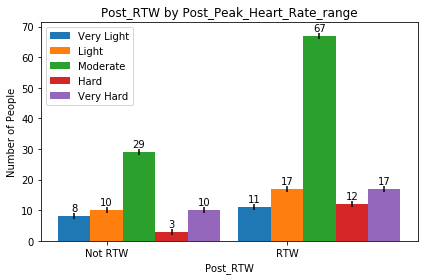

In [207]:
## Post RTW by Post_Peak_Heart_Rate_range
postrtw_post_hr_df = df_KNN_imputed.groupby(['Post_RTW','Post_Peak_Heart_Rate_range']).size().reset_index(name='Size')

postrtw_post_hr_1 = postrtw_post_hr_df[postrtw_post_hr_df['Post_Peak_Heart_Rate_range'] == 'Very Light']['Size'].tolist()
postrtw_post_hr_2 = postrtw_post_hr_df[postrtw_post_hr_df['Post_Peak_Heart_Rate_range'] == 'Light']['Size'].tolist()
postrtw_post_hr_3 = postrtw_post_hr_df[postrtw_post_hr_df['Post_Peak_Heart_Rate_range'] == 'Moderate']['Size'].tolist()
postrtw_post_hr_4 = postrtw_post_hr_df[postrtw_post_hr_df['Post_Peak_Heart_Rate_range'] == 'Hard']['Size'].tolist()
postrtw_post_hr_5 = postrtw_post_hr_df[postrtw_post_hr_df['Post_Peak_Heart_Rate_range'] == 'Very Hard']['Size'].tolist()

postrtw_post_hr_1_std = (1, 1)
postrtw_post_hr_2_std = (1, 1)
postrtw_post_hr_3_std = (1, 1)
postrtw_post_hr_4_std = (1, 1)
postrtw_post_hr_5_std = (1, 1)

ind = np.arange(len(postrtw_post_hr_1))  # the x locations for the groups
width = 0.18  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_post_hr_1, width, yerr=postrtw_post_hr_1_std, label='Very Light')
rects2 = ax.bar(ind , postrtw_post_hr_2, width, yerr=postrtw_post_hr_2_std, label='Light')
rects3 = ax.bar(ind + width, postrtw_post_hr_3, width, yerr=postrtw_post_hr_3_std, label='Moderate')
rects4 = ax.bar(ind + 2*width, postrtw_post_hr_4, width, yerr=postrtw_post_hr_4_std, label='Hard')
rects5 = ax.bar(ind + 3*width, postrtw_post_hr_5, width, yerr=postrtw_post_hr_5_std, label='Very Hard')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Post_Peak_Heart_Rate_range')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")

fig.tight_layout()

plt.show()

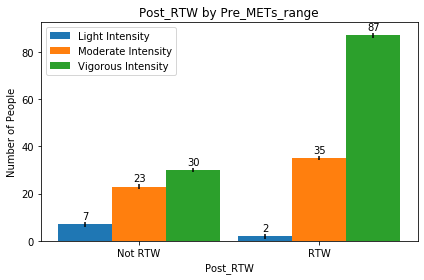

In [208]:
## Post RTW by Pre_METs_range
postrtw_pre_mets_df = df_KNN_imputed.groupby(['Post_RTW','Pre_METs_range']).size().reset_index(name='Size')

postrtw_pre_mets_1 = postrtw_pre_mets_df[postrtw_pre_mets_df['Pre_METs_range'] == 'Light Intensity']['Size'].tolist()
postrtw_pre_mets_2 = postrtw_pre_mets_df[postrtw_pre_mets_df['Pre_METs_range'] == 'Moderate Intensity']['Size'].tolist()
postrtw_pre_mets_3 = postrtw_pre_mets_df[postrtw_pre_mets_df['Pre_METs_range'] == 'Vigorous Intensity']['Size'].tolist()

postrtw_pre_mets_1_std = (1, 1)
postrtw_pre_mets_2_std = (1, 1)
postrtw_pre_mets_3_std = (1, 1)

ind = np.arange(len(postrtw_pre_mets_1))  # the x locations for the groups
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_pre_mets_1, width, yerr=postrtw_pre_mets_1_std, label='Light Intensity')
rects2 = ax.bar(ind , postrtw_pre_mets_2, width, yerr=postrtw_pre_mets_2_std, label='Moderate Intensity')
rects3 = ax.bar(ind + width, postrtw_pre_mets_3, width, yerr=postrtw_pre_mets_3_std, label='Vigorous Intensity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Pre_METs_range')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

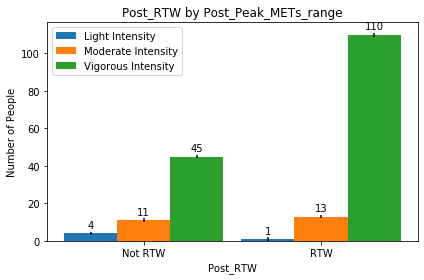

In [209]:
## Post RTW by Post_Peak_METs_range
postrtw_post_mets_df = df_KNN_imputed.groupby(['Post_RTW','Post_Peak_METs_range']).size().reset_index(name='Size')

postrtw_post_mets_1 = postrtw_post_mets_df[postrtw_post_mets_df['Post_Peak_METs_range'] == 'Light Intensity']['Size'].tolist()
postrtw_post_mets_2 = postrtw_post_mets_df[postrtw_post_mets_df['Post_Peak_METs_range'] == 'Moderate Intensity']['Size'].tolist()
postrtw_post_mets_3 = postrtw_post_mets_df[postrtw_post_mets_df['Post_Peak_METs_range'] == 'Vigorous Intensity']['Size'].tolist()

postrtw_post_mets_1_std = (1, 1)
postrtw_post_mets_2_std = (1, 1)
postrtw_post_mets_3_std = (1, 1)

ind = np.arange(len(postrtw_post_mets_1))  # the x locations for the groups
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_post_mets_1, width, yerr=postrtw_post_mets_1_std, label='Light Intensity')
rects2 = ax.bar(ind , postrtw_post_mets_2, width, yerr=postrtw_post_mets_2_std, label='Moderate Intensity')
rects3 = ax.bar(ind + width, postrtw_post_mets_3, width, yerr=postrtw_post_mets_3_std, label='Vigorous Intensity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Post_Peak_METs_range')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

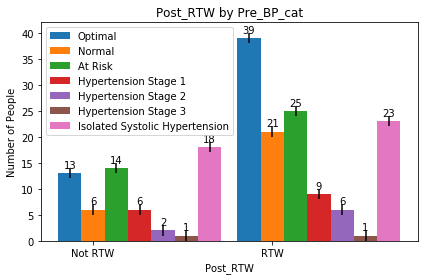

In [210]:
## Post RTW by Pre_BP_cat
postrtw_pre_bp_df = df_KNN_imputed.groupby(['Post_RTW','Pre_BP_cat']).size().reset_index(name='Size')

postrtw_pre_bp_1 = postrtw_pre_bp_df[postrtw_pre_bp_df['Pre_BP_cat'] == 'Optimal']['Size'].tolist()
postrtw_pre_bp_2 = postrtw_pre_bp_df[postrtw_pre_bp_df['Pre_BP_cat'] == 'Normal']['Size'].tolist()
postrtw_pre_bp_3 = postrtw_pre_bp_df[postrtw_pre_bp_df['Pre_BP_cat'] == 'At Risk']['Size'].tolist()
postrtw_pre_bp_4 = postrtw_pre_bp_df[postrtw_pre_bp_df['Pre_BP_cat'] == 'Hypertension Stage 1']['Size'].tolist()
postrtw_pre_bp_5 = postrtw_pre_bp_df[postrtw_pre_bp_df['Pre_BP_cat'] == 'Hypertension Stage 2']['Size'].tolist()
postrtw_pre_bp_6 = postrtw_pre_bp_df[postrtw_pre_bp_df['Pre_BP_cat'] == 'Hypertension Stage 3']['Size'].tolist()
postrtw_pre_bp_7 = postrtw_pre_bp_df[postrtw_pre_bp_df['Pre_BP_cat'] == 'Isolated Systolic Hypertension']['Size'].tolist()

postrtw_pre_bp_1_std = (1, 1)
postrtw_pre_bp_2_std = (1, 1)
postrtw_pre_bp_3_std = (1, 1)
postrtw_pre_bp_4_std = (1, 1)
postrtw_pre_bp_5_std = (1, 1)
postrtw_pre_bp_6_std = (1, 1)
postrtw_pre_bp_7_std = (1, 1)

ind = np.arange(len(postrtw_pre_bp_1))  # the x locations for the groups
width = 0.13  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_pre_bp_1, width, yerr=postrtw_pre_bp_1_std, label='Optimal')
rects2 = ax.bar(ind , postrtw_pre_bp_2, width, yerr=postrtw_pre_bp_2_std, label='Normal')
rects3 = ax.bar(ind + width, postrtw_pre_bp_3, width, yerr=postrtw_pre_bp_3_std, label='At Risk')
rects4 = ax.bar(ind + 2*width, postrtw_pre_bp_4, width, yerr=postrtw_pre_bp_4_std, label='Hypertension Stage 1')
rects5 = ax.bar(ind + 3*width, postrtw_pre_bp_5, width, yerr=postrtw_pre_bp_5_std, label='Hypertension Stage 2')
rects6 = ax.bar(ind + 4*width, postrtw_pre_bp_6, width, yerr=postrtw_pre_bp_6_std, label='Hypertension Stage 3')
rects7 = ax.bar(ind + 5*width, postrtw_pre_bp_7, width, yerr=postrtw_pre_bp_7_std, label='Isolated Systolic Hypertension')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Pre_BP_cat')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")
autolabel(rects6, "center")
autolabel(rects7, "center")


fig.tight_layout()

plt.show()

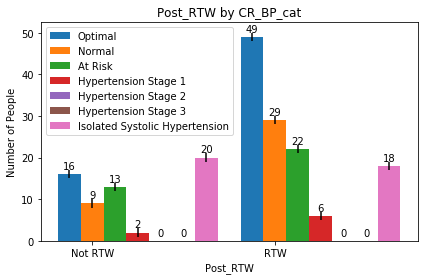

In [211]:
## Post RTW by CR_BP_cat
postrtw_bp_df = df_KNN_imputed.groupby(['Post_RTW','CR_BP_cat']).size().reset_index(name='Size')

postrtw_bp_1 = postrtw_bp_df[postrtw_bp_df['CR_BP_cat'] == 'Optimal']['Size'].tolist()
postrtw_bp_2 = postrtw_bp_df[postrtw_bp_df['CR_BP_cat'] == 'Normal']['Size'].tolist()
postrtw_bp_3 = postrtw_bp_df[postrtw_bp_df['CR_BP_cat'] == 'At Risk']['Size'].tolist()
postrtw_bp_4 = postrtw_bp_df[postrtw_bp_df['CR_BP_cat'] == 'Hypertension Stage 1']['Size'].tolist()
postrtw_bp_5 = postrtw_bp_df[postrtw_bp_df['CR_BP_cat'] == 'Hypertension Stage 2']['Size'].tolist()
postrtw_bp_6 = postrtw_bp_df[postrtw_bp_df['CR_BP_cat'] == 'Hypertension Stage 3']['Size'].tolist()
postrtw_bp_7 = postrtw_bp_df[postrtw_bp_df['CR_BP_cat'] == 'Isolated Systolic Hypertension']['Size'].tolist()

postrtw_bp_5.insert(0,0)
postrtw_bp_5.insert(1,0)
postrtw_bp_6.insert(0,0)
postrtw_bp_6.insert(1,0)

postrtw_bp_1_std = (1, 1)
postrtw_bp_2_std = (1, 1)
postrtw_bp_3_std = (1, 1)
postrtw_bp_4_std = (1, 1)
postrtw_bp_5_std = (0, 0)
postrtw_bp_6_std = (0, 0)
postrtw_bp_7_std = (1, 1)

ind = np.arange(len(postrtw_pre_bp_1))  # the x locations for the groups
width = 0.125  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_bp_1, width, yerr=postrtw_bp_1_std, label='Optimal')
rects2 = ax.bar(ind , postrtw_bp_2, width, yerr=postrtw_bp_2_std, label='Normal')
rects3 = ax.bar(ind + width, postrtw_bp_3, width, yerr=postrtw_bp_3_std, label='At Risk')
rects4 = ax.bar(ind + 2*width, postrtw_bp_4, width, yerr=postrtw_bp_4_std, label='Hypertension Stage 1')
rects5 = ax.bar(ind + 3*width, postrtw_bp_5, width, yerr=postrtw_bp_5_std, label='Hypertension Stage 2')
rects6 = ax.bar(ind + 4*width, postrtw_bp_6, width, yerr=postrtw_bp_6_std, label='Hypertension Stage 3')
rects7 = ax.bar(ind + 5*width, postrtw_bp_7, width, yerr=postrtw_bp_7_std, label='Isolated Systolic Hypertension')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by CR_BP_cat')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")
autolabel(rects6, "center")
autolabel(rects7, "center")


fig.tight_layout()

plt.show()

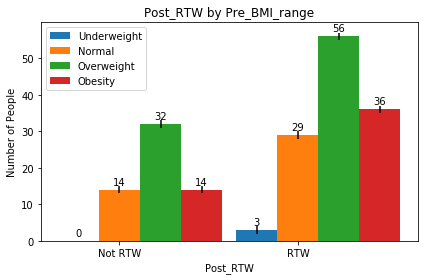

In [212]:
## Post RTW by Pre_BMI_range
postrtw_pre_bmi_df = df_KNN_imputed.groupby(['Post_RTW','Pre_BMI_range']).size().reset_index(name='Size')

postrtw_pre_bmi_1 = postrtw_pre_bmi_df[postrtw_pre_bmi_df['Pre_BMI_range'] == 'Underweight']['Size'].tolist()
postrtw_pre_bmi_2 = postrtw_pre_bmi_df[postrtw_pre_bmi_df['Pre_BMI_range'] == 'Normal']['Size'].tolist()
postrtw_pre_bmi_3 = postrtw_pre_bmi_df[postrtw_pre_bmi_df['Pre_BMI_range'] == 'Overweight']['Size'].tolist()
postrtw_pre_bmi_4 = postrtw_pre_bmi_df[postrtw_pre_bmi_df['Pre_BMI_range'] == 'Obesity']['Size'].tolist()

postrtw_pre_bmi_1.insert(0, 0)
postrtw_pre_bmi_1_std = (0, 1)
postrtw_pre_bmi_2_std = (1, 1)
postrtw_pre_bmi_3_std = (1, 1)
postrtw_pre_bmi_4_std = (1, 1)

ind = np.arange(len(postrtw_pre_bmi_1))  # the x locations for the groups
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_pre_bmi_1, width, yerr=postrtw_pre_bmi_1_std, label='Underweight')
rects2 = ax.bar(ind , postrtw_pre_bmi_2, width, yerr=postrtw_pre_bmi_2_std, label='Normal')
rects3 = ax.bar(ind + width, postrtw_pre_bmi_3, width, yerr=postrtw_pre_bmi_3_std, label='Overweight')
rects4 = ax.bar(ind + 2*width, postrtw_pre_bmi_4, width, yerr=postrtw_pre_bmi_4_std, label='Obesity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Pre_BMI_range')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")

fig.tight_layout()

plt.show()

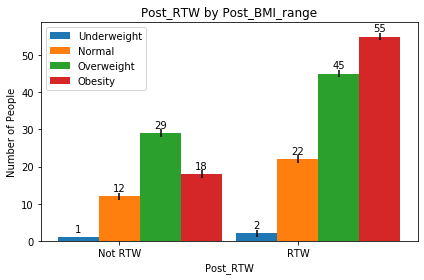

In [213]:
## Post RTW by Post_BMI_range
postrtw_post_bmi_df = df_KNN_imputed.groupby(['Post_RTW','Post_BMI_range']).size().reset_index(name='Size')

postrtw_post_bmi_1 = postrtw_post_bmi_df[postrtw_post_bmi_df['Post_BMI_range'] == 'Underweight']['Size'].tolist()
postrtw_post_bmi_2 = postrtw_post_bmi_df[postrtw_post_bmi_df['Post_BMI_range'] == 'Normal']['Size'].tolist()
postrtw_post_bmi_3 = postrtw_post_bmi_df[postrtw_post_bmi_df['Post_BMI_range'] == 'Overweight']['Size'].tolist()
postrtw_post_bmi_4 = postrtw_post_bmi_df[postrtw_post_bmi_df['Post_BMI_range'] == 'Obesity']['Size'].tolist()

postrtw_post_bmi_1_std = (0, 1)
postrtw_post_bmi_2_std = (1, 1)
postrtw_post_bmi_3_std = (1, 1)
postrtw_post_bmi_4_std = (1, 1)

ind = np.arange(len(postrtw_post_bmi_1))  # the x locations for the groups
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_post_bmi_1, width, yerr=postrtw_post_bmi_1_std, label='Underweight')
rects2 = ax.bar(ind , postrtw_post_bmi_2, width, yerr=postrtw_post_bmi_2_std, label='Normal')
rects3 = ax.bar(ind + width, postrtw_post_bmi_3, width, yerr=postrtw_post_bmi_3_std, label='Overweight')
rects4 = ax.bar(ind + 2*width, postrtw_post_bmi_4, width, yerr=postrtw_post_bmi_4_std, label='Obesity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Post_BMI_range')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")

fig.tight_layout()

plt.show()

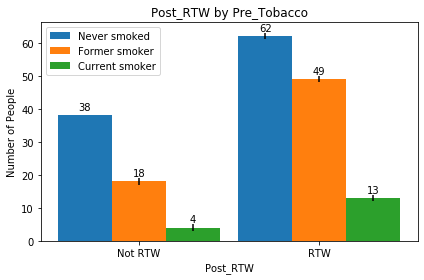

In [214]:
## Post RTW by Pre_Tobacco
postrtw_pre_tobacco_df = df_KNN_imputed.groupby(['Post_RTW','Pre_Tobacco']).size().reset_index(name='Size')

postrtw_pre_tobacco_1 = postrtw_pre_tobacco_df[postrtw_pre_tobacco_df['Pre_Tobacco'] == 'Never smoked']['Size'].tolist()
postrtw_pre_tobacco_2 = postrtw_pre_tobacco_df[postrtw_pre_tobacco_df['Pre_Tobacco'] == 'Former smoker']['Size'].tolist()
postrtw_pre_tobacco_3 = postrtw_pre_tobacco_df[postrtw_pre_tobacco_df['Pre_Tobacco'] == 'Current smoker']['Size'].tolist()

postrtw_pre_tobacco_1_std = (0, 1)
postrtw_pre_tobacco_2_std = (1, 1)
postrtw_pre_tobacco_3_std = (1, 1)


ind = np.arange(len(postrtw_pre_tobacco_1))  # the x locations for the groups
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_pre_tobacco_1, width, yerr=postrtw_pre_tobacco_1_std, label='Never smoked')
rects2 = ax.bar(ind , postrtw_pre_tobacco_2, width, yerr=postrtw_pre_tobacco_2_std, label='Former smoker')
rects3 = ax.bar(ind + width, postrtw_pre_tobacco_3, width, yerr=postrtw_pre_tobacco_3_std, label='Current smoker')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Pre_Tobacco')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

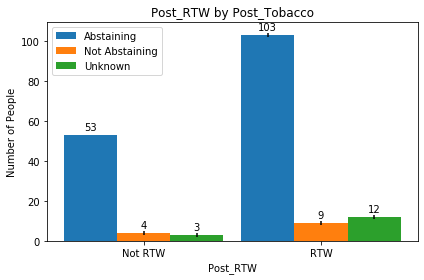

In [215]:
## Post RTW by Post_Tobacco
postrtw_post_tobacco_df = df_KNN_imputed.groupby(['Post_RTW','Post_Tobacco']).size().reset_index(name='Size')

postrtw_post_tobacco_1 = postrtw_post_tobacco_df[postrtw_post_tobacco_df['Post_Tobacco'] == 'Abstaining']['Size'].tolist()
postrtw_post_tobacco_2 = postrtw_post_tobacco_df[postrtw_post_tobacco_df['Post_Tobacco'] == 'Not Abstaining']['Size'].tolist()
postrtw_post_tobacco_3 = postrtw_post_tobacco_df[postrtw_post_tobacco_df['Post_Tobacco'] == 'Unknown']['Size'].tolist()

postrtw_post_tobacco_1_std = (0, 1)
postrtw_post_tobacco_2_std = (1, 1)
postrtw_post_tobacco_3_std = (1, 1)


ind = np.arange(len(postrtw_pre_tobacco_1))  # the x locations for the groups
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_post_tobacco_1, width, yerr=postrtw_post_tobacco_1_std, label='Abstaining')
rects2 = ax.bar(ind , postrtw_post_tobacco_2, width, yerr=postrtw_post_tobacco_2_std, label='Not Abstaining')
rects3 = ax.bar(ind + width, postrtw_post_tobacco_3, width, yerr=postrtw_post_tobacco_3_std, label='Unknown')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Post_Tobacco')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

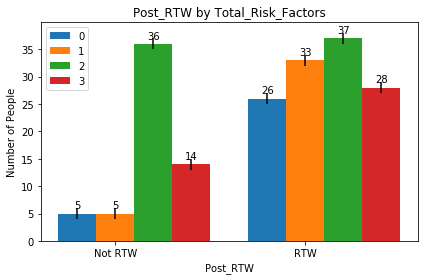

In [216]:
# Post RTW Vs Total_Risk_Factors
postrtw_totalrisk_df = df_KNN_imputed.groupby(['Post_RTW','Total_Risk_Factors']).size().reset_index(name='Size')

postrtw_totalrisk_1 = postrtw_totalrisk_df[postrtw_totalrisk_df['Total_Risk_Factors'] == 0]['Size'].tolist()
postrtw_totalrisk_2 = postrtw_totalrisk_df[postrtw_totalrisk_df['Total_Risk_Factors'] == 1]['Size'].tolist()
postrtw_totalrisk_3 = postrtw_totalrisk_df[postrtw_totalrisk_df['Total_Risk_Factors'] == 2]['Size'].tolist()
postrtw_totalrisk_4 = postrtw_totalrisk_df[postrtw_totalrisk_df['Total_Risk_Factors'] == 3]['Size'].tolist()

postrtw_totalrisk_1_std = (1, 1)
postrtw_totalrisk_2_std = (1, 1)
postrtw_totalrisk_3_std = (1, 1)
postrtw_totalrisk_4_std = (1, 1)

ind = np.arange(len(postrtw_totalrisk_1))  # the x locations for the groups
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_totalrisk_1, width, yerr=postrtw_totalrisk_1_std, label='0')
rects2 = ax.bar(ind , postrtw_totalrisk_2, width, yerr=postrtw_totalrisk_2_std, label='1')
rects3 = ax.bar(ind + width, postrtw_totalrisk_3, width, yerr=postrtw_totalrisk_3_std, label='2')
rects4 = ax.bar(ind + 2*width, postrtw_totalrisk_4, width, yerr=postrtw_totalrisk_4_std, label='3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Total_Risk_Factors')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")

fig.tight_layout()

plt.show()

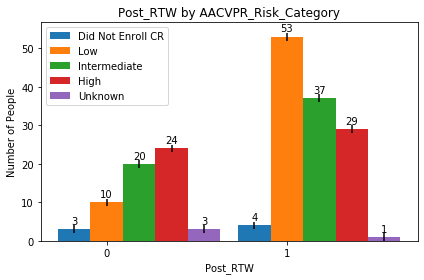

In [217]:
# Post RTW Vs AACVPR_Risk_Category
postrtw_aacvpr_risk_df = df_KNN_imputed.groupby(['Post_RTW','AACVPR_Risk_Category']).size().reset_index(name='Size')

postrtw_aacvpr_risk_1 = postrtw_aacvpr_risk_df[postrtw_aacvpr_risk_df['AACVPR_Risk_Category'] == 'Did Not Enroll CR']['Size'].tolist()
postrtw_aacvpr_risk_2 = postrtw_aacvpr_risk_df[postrtw_aacvpr_risk_df['AACVPR_Risk_Category'] == 'Low']['Size'].tolist()
postrtw_aacvpr_risk_3 = postrtw_aacvpr_risk_df[postrtw_aacvpr_risk_df['AACVPR_Risk_Category'] == 'Intermediate']['Size'].tolist()
postrtw_aacvpr_risk_4 = postrtw_aacvpr_risk_df[postrtw_aacvpr_risk_df['AACVPR_Risk_Category'] == 'High']['Size'].tolist()
postrtw_aacvpr_risk_5 = postrtw_aacvpr_risk_df[postrtw_aacvpr_risk_df['AACVPR_Risk_Category'] == 'Unknown']['Size'].tolist()

postrtw_aacvpr_risk_1_std = (1, 1)
postrtw_aacvpr_risk_2_std = (1, 1)
postrtw_aacvpr_risk_3_std = (1, 1)
postrtw_aacvpr_risk_4_std = (1, 1)
postrtw_aacvpr_risk_5_std = (1, 1)

ind = np.arange(len(postrtw_aacvpr_risk_1))  # the x locations for the groups
width = 0.18  # the width of the bars

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(ind - width, postrtw_aacvpr_risk_1, width, yerr=postrtw_aacvpr_risk_1_std, label='Did Not Enroll CR')
rects2 = ax.bar(ind , postrtw_aacvpr_risk_2, width, yerr=postrtw_aacvpr_risk_2_std, label='Low')
rects3 = ax.bar(ind + width, postrtw_aacvpr_risk_3, width, yerr=postrtw_aacvpr_risk_3_std, label='Intermediate')
rects4 = ax.bar(ind + 2*width, postrtw_aacvpr_risk_4, width, yerr=postrtw_aacvpr_risk_4_std, label='High')
rects5 = ax.bar(ind + 3*width, postrtw_aacvpr_risk_5, width, yerr=postrtw_aacvpr_risk_5_std, label='Unknown')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by AACVPR_Risk_Category')
ax.set_xticks(ind)
ax.set_xticklabels(postrtw_aacvpr_risk_df.Post_RTW.unique())
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")

fig.tight_layout()

plt.show()

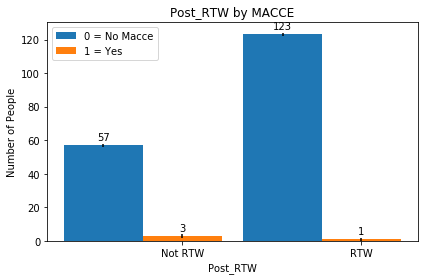

In [218]:
# Post RTW Vs MACCE
postrtw_macce_df = df_KNN_imputed.groupby(['Post_RTW','MACCE']).size().reset_index(name='Size')

postrtw_macce_1 = postrtw_macce_df[postrtw_macce_df['MACCE'] == 0]['Size'].tolist()
postrtw_macce_2 = postrtw_macce_df[postrtw_macce_df['MACCE'] == 1]['Size'].tolist()

postrtw_macce_1_std = (1, 1)
postrtw_macce_2_std = (1, 1)

ind = np.arange(len(postrtw_macce_1))  # the x locations for the groups
width = 0.44  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_macce_1, width, yerr=postrtw_macce_1_std, label='0 = No Macce')
rects2 = ax.bar(ind , postrtw_macce_2, width, yerr=postrtw_macce_2_std, label='1 = Yes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by MACCE')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")

fig.tight_layout()

plt.show()

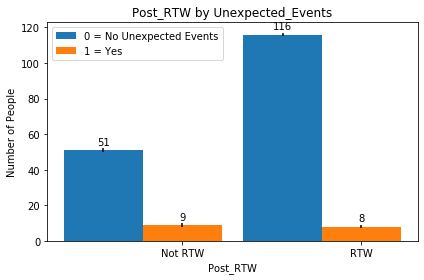

In [219]:
# Post RTW Vs Unexpected_Events
postrtw_ue_df = df_KNN_imputed.groupby(['Post_RTW','Unexpected_Events']).size().reset_index(name='Size')

postrtw_ue_1 = postrtw_ue_df[postrtw_ue_df['Unexpected_Events'] == 0]['Size'].tolist()
postrtw_ue_2 = postrtw_ue_df[postrtw_ue_df['Unexpected_Events'] == 1]['Size'].tolist()

postrtw_ue_1_std = (1, 1)
postrtw_ue_2_std = (1, 1)

ind = np.arange(len(postrtw_ue_1))  # the x locations for the groups
width = 0.44  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_ue_1, width, yerr=postrtw_ue_1_std, label='0 = No Unexpected Events')
rects2 = ax.bar(ind , postrtw_ue_2, width, yerr=postrtw_ue_2_std, label='1 = Yes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Unexpected_Events')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")

fig.tight_layout()

plt.show()

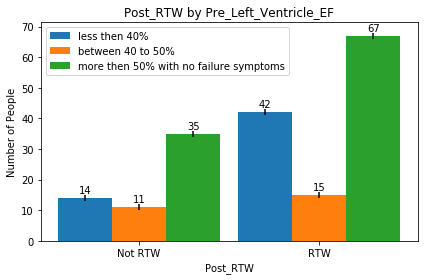

In [220]:
# Post RTW Vs Pre_Left_Ventricle_EF
postrtw_ef_df = df_KNN_imputed.groupby(['Post_RTW','Pre_Left_Ventricle_EF']).size().reset_index(name='Size')

postrtw_ef_1 = postrtw_ef_df[postrtw_ef_df['Pre_Left_Ventricle_EF'] == 'less then 40%']['Size'].tolist()
postrtw_ef_2 = postrtw_ef_df[postrtw_ef_df['Pre_Left_Ventricle_EF'] == 'between 40 to 50%']['Size'].tolist()
postrtw_ef_3 = postrtw_ef_df[postrtw_ef_df['Pre_Left_Ventricle_EF'] == 'more then 50% with no failure symptoms']['Size'].tolist()

postrtw_ef_1_std = (1, 1)
postrtw_ef_2_std = (1, 1)
postrtw_ef_3_std = (1, 1)

ind = np.arange(len(postrtw_ef_1))  # the x locations for the groups
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_ef_1, width, yerr=postrtw_ef_1_std, label='less then 40%')
rects2 = ax.bar(ind , postrtw_ef_2, width, yerr=postrtw_ef_2_std, label='between 40 to 50%')
rects3 = ax.bar(ind + width, postrtw_ef_3, width, yerr=postrtw_ef_3_std, label='more then 50% with no failure symptoms')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Pre_Left_Ventricle_EF')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

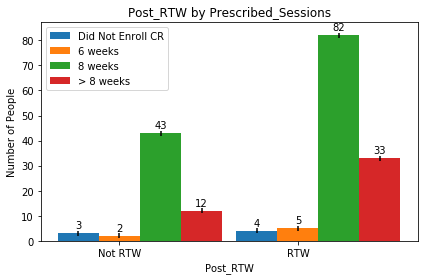

In [221]:
# Post RTW Vs Prescribed_Sessions
fund_session_df = df_KNN_imputed.groupby(['Post_RTW','Prescribed_Sessions']).size().reset_index(name='Size')

fund_session_1 = fund_session_df[fund_session_df['Prescribed_Sessions'] == 'Did Not Enroll CR']['Size'].tolist()
fund_session_2 = fund_session_df[fund_session_df['Prescribed_Sessions'] == '6 weeks']['Size'].tolist()
fund_session_3 = fund_session_df[fund_session_df['Prescribed_Sessions'] == '8 weeks']['Size'].tolist()
fund_session_4 = fund_session_df[fund_session_df['Prescribed_Sessions'] == '> 8 weeks']['Size'].tolist()

fund_session_1_std = (1, 1)
fund_session_2_std = (1, 1)
fund_session_3_std = (1, 1)
fund_session_4_std = (1, 1)

ind = np.arange(len(fund_session_1))  # the x locations for the groups
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, fund_session_1, width, yerr=fund_session_1_std, label='Did Not Enroll CR')
rects2 = ax.bar(ind , fund_session_2, width, yerr=fund_session_2_std, label='6 weeks')
rects3 = ax.bar(ind + width, fund_session_3, width, yerr=fund_session_3_std, label='8 weeks')
rects4 = ax.bar(ind + (2*width), fund_session_4, width, yerr=fund_session_4_std, label='> 8 weeks')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Prescribed_Sessions')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")

fig.tight_layout()

plt.show()

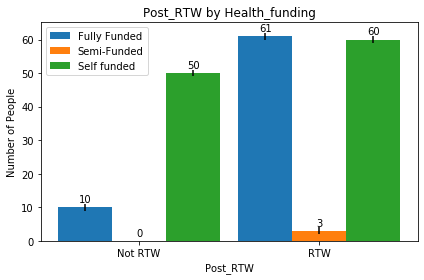

In [222]:
# Post_RTW Vs Health_funding
postrtw_fund_df = df_KNN_imputed.groupby(['Post_RTW','Health_funding']).size().reset_index(name='Size')

postrtw_fund_1 = postrtw_fund_df[postrtw_fund_df['Health_funding'] == 'Fully Funded']['Size'].tolist()
postrtw_fund_2 = postrtw_fund_df[postrtw_fund_df['Health_funding'] == 'Semi-Funded']['Size'].tolist()
postrtw_fund_3 = postrtw_fund_df[postrtw_fund_df['Health_funding'] == 'Self funded']['Size'].tolist()

postrtw_fund_2.insert(0, 0)

postrtw_fund_1_stf = (1, 1)
postrtw_fund_2_stf = (0, 1)
postrtw_fund_3_stf = (1, 1)

ind = np.arange(len(postrtw_fund_1))  # the x locations for the groups
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_fund_1, width, yerr=postrtw_fund_1_stf, label='Fully Funded')
rects2 = ax.bar(ind , postrtw_fund_2, width, yerr=postrtw_fund_2_stf, label='Semi-Funded')
rects3 = ax.bar(ind + width, postrtw_fund_3, width, yerr=postrtw_fund_3_stf, label='Self funded')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by Health_funding')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

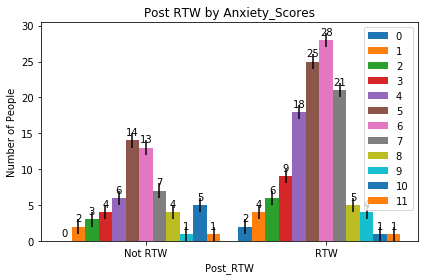

In [223]:
# Post RTW Vs Anxiety_Scores
postrtw_anxiety_df = df_KNN_imputed.groupby(['Post_RTW', 'Anxiety_Scores']).size().reset_index(name='Size')

postrtw_anxiety_0 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 0]['Size'].tolist()
postrtw_anxiety_1 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 1]['Size'].tolist()
postrtw_anxiety_2 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 2]['Size'].tolist()
postrtw_anxiety_3 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 3]['Size'].tolist()
postrtw_anxiety_4 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 4]['Size'].tolist()
postrtw_anxiety_5 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 5]['Size'].tolist()
postrtw_anxiety_6 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 6]['Size'].tolist()
postrtw_anxiety_7 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 7]['Size'].tolist()
postrtw_anxiety_8 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 8]['Size'].tolist()
postrtw_anxiety_9 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 9]['Size'].tolist()
postrtw_anxiety_10 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 10]['Size'].tolist()
postrtw_anxiety_11 = postrtw_anxiety_df[postrtw_anxiety_df['Anxiety_Scores'] == 11]['Size'].tolist()

postrtw_anxiety_0.insert(0, 0)

postrtw_anxiety_0_std = (0, 1)
postrtw_anxiety_1_std = (1, 1)
postrtw_anxiety_2_std = (1, 1)
postrtw_anxiety_3_std = (1, 1)
postrtw_anxiety_4_std = (1, 1)
postrtw_anxiety_5_std = (1, 1)
postrtw_anxiety_6_std = (1, 1)
postrtw_anxiety_7_std = (1, 1)
postrtw_anxiety_8_std = (1, 1)
postrtw_anxiety_9_std = (1, 1)
postrtw_anxiety_10_std = (1, 1)
postrtw_anxiety_11_std = (1, 1)

ind = np.arange(len(postrtw_anxiety_0))    # the x locations for the groups
width = 0.075       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(figsize=(6, 4))
rects0 = ax.bar(ind - 6*width, postrtw_anxiety_0, width, yerr=postrtw_anxiety_0_std, label='0')
rects1 = ax.bar(ind - 5*width, postrtw_anxiety_1, width, yerr=postrtw_anxiety_1_std, label='1')
rects2 = ax.bar(ind - 4*width, postrtw_anxiety_2, width, yerr=postrtw_anxiety_2_std, label='2')
rects3 = ax.bar(ind - 3*width, postrtw_anxiety_3, width, yerr=postrtw_anxiety_3_std, label='3')
rects4 = ax.bar(ind - 2*width, postrtw_anxiety_4, width, yerr=postrtw_anxiety_4_std, label='4')
rects5 = ax.bar(ind - 1*width, postrtw_anxiety_5, width, yerr=postrtw_anxiety_5_std, label='5')
rects6 = ax.bar(ind, postrtw_anxiety_6, width, yerr=postrtw_anxiety_6_std,  label='6')
rects7 = ax.bar(ind+ 1*width, postrtw_anxiety_7, width, yerr=postrtw_anxiety_7_std, label='7')
rects8 = ax.bar(ind+ 2*width, postrtw_anxiety_8, width, yerr=postrtw_anxiety_8_std, label='8')
rects9 = ax.bar(ind+ 3*width , postrtw_anxiety_9, width, yerr=postrtw_anxiety_9_std, label='9')
rects10 = ax.bar(ind+ 4*width , postrtw_anxiety_10, width, yerr=postrtw_anxiety_10_std, label='10')
rects11 = ax.bar(ind+ 5*width , postrtw_anxiety_11, width, yerr=postrtw_anxiety_11_std, label='11')

ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post RTW by Anxiety_Scores')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend()

autolabel(rects0, "center")
autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")
autolabel(rects6, "center")
autolabel(rects7, "center")
autolabel(rects8, "center")
autolabel(rects9, "center")
autolabel(rects10, "center")
autolabel(rects11, "center")
fig.tight_layout()
plt.show()

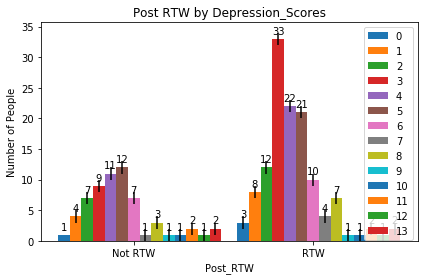

In [224]:
# Post RTW Vs Depression_Scores
postrtw_anxiety_df = df_KNN_imputed.groupby(['Post_RTW', 'Depression_Scores']).size().reset_index(name='Size')

postrtw_anxiety_0 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 0]['Size'].tolist()
postrtw_anxiety_1 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 1]['Size'].tolist()
postrtw_anxiety_2 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 2]['Size'].tolist()
postrtw_anxiety_3 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 3]['Size'].tolist()
postrtw_anxiety_4 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 4]['Size'].tolist()
postrtw_anxiety_5 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 5]['Size'].tolist()
postrtw_anxiety_6 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 6]['Size'].tolist()
postrtw_anxiety_7 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 7]['Size'].tolist()
postrtw_anxiety_8 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 8]['Size'].tolist()
postrtw_anxiety_9 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 9]['Size'].tolist()
postrtw_anxiety_10 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 10]['Size'].tolist()
postrtw_anxiety_11 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 11]['Size'].tolist()
postrtw_anxiety_12 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 12]['Size'].tolist()
postrtw_anxiety_13 = postrtw_anxiety_df[postrtw_anxiety_df['Depression_Scores'] == 13]['Size'].tolist()

#postrtw_anxiety_0.insert(0, 0)

postrtw_anxiety_0_std = (0, 1)
postrtw_anxiety_1_std = (1, 1)
postrtw_anxiety_2_std = (1, 1)
postrtw_anxiety_3_std = (1, 1)
postrtw_anxiety_4_std = (1, 1)
postrtw_anxiety_5_std = (1, 1)
postrtw_anxiety_6_std = (1, 1)
postrtw_anxiety_7_std = (1, 1)
postrtw_anxiety_8_std = (1, 1)
postrtw_anxiety_9_std = (1, 1)
postrtw_anxiety_10_std = (1, 1)
postrtw_anxiety_11_std = (1, 1)
postrtw_anxiety_12_std = (1, 1)
postrtw_anxiety_13_std = (1, 1)

ind = np.arange(len(postrtw_anxiety_0))    # the x locations for the groups
width = 0.065       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(figsize=(6, 4))
rects0 = ax.bar(ind - 6*width, postrtw_anxiety_0, width, yerr=postrtw_anxiety_0_std, label='0')
rects1 = ax.bar(ind - 5*width, postrtw_anxiety_1, width, yerr=postrtw_anxiety_1_std, label='1')
rects2 = ax.bar(ind - 4*width, postrtw_anxiety_2, width, yerr=postrtw_anxiety_2_std, label='2')
rects3 = ax.bar(ind - 3*width, postrtw_anxiety_3, width, yerr=postrtw_anxiety_3_std, label='3')
rects4 = ax.bar(ind - 2*width, postrtw_anxiety_4, width, yerr=postrtw_anxiety_4_std, label='4')
rects5 = ax.bar(ind - 1*width, postrtw_anxiety_5, width, yerr=postrtw_anxiety_5_std, label='5')
rects6 = ax.bar(ind, postrtw_anxiety_6, width, yerr=postrtw_anxiety_6_std,  label='6')
rects7 = ax.bar(ind+ 1*width, postrtw_anxiety_7, width, yerr=postrtw_anxiety_7_std, label='7')
rects8 = ax.bar(ind+ 2*width, postrtw_anxiety_8, width, yerr=postrtw_anxiety_8_std, label='8')
rects9 = ax.bar(ind+ 3*width , postrtw_anxiety_9, width, yerr=postrtw_anxiety_9_std, label='9')
rects10 = ax.bar(ind+ 4*width , postrtw_anxiety_10, width, yerr=postrtw_anxiety_10_std, label='10')
rects11 = ax.bar(ind+ 5*width , postrtw_anxiety_11, width, yerr=postrtw_anxiety_11_std, label='11')
rects12 = ax.bar(ind+ 6*width , postrtw_anxiety_12, width, yerr=postrtw_anxiety_12_std, label='12')
rects13 = ax.bar(ind+ 7*width , postrtw_anxiety_13, width, yerr=postrtw_anxiety_13_std, label='13')

ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post RTW by Depression_Scores')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend()

autolabel(rects0, "center")
autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")
autolabel(rects6, "center")
autolabel(rects7, "center")
autolabel(rects8, "center")
autolabel(rects9, "center")
autolabel(rects10, "center")
autolabel(rects11, "center")
autolabel(rects12, "center")
autolabel(rects13, "center")

fig.tight_layout()
plt.show()

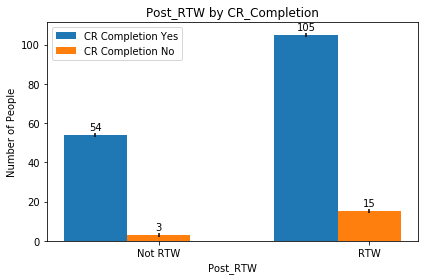

In [225]:
# Post RTW Vs CR_Completion
postrtw_cr_completion_df = df_KNN_imputed.groupby(['Post_RTW','CR_Completion']).size().reset_index(name='Size')

postrtw_cr_completion_1 = postrtw_cr_completion_df[postrtw_cr_completion_df['CR_Completion'] == 'Yes']['Size'].tolist()
postrtw_cr_completion_2 = postrtw_cr_completion_df[postrtw_cr_completion_df['CR_Completion'] == 'No']['Size'].tolist()

postrtw_cr_completion_1_std = (1, 1)
postrtw_cr_completion_2_std = (1, 1)

ind = np.arange(len(postrtw_cr_completion_1))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind - width, postrtw_cr_completion_1, width, yerr=postrtw_cr_completion_1_std, label='CR Completion Yes')
rects2 = ax.bar(ind , postrtw_cr_completion_2, width, yerr=postrtw_cr_completion_1_std, label='CR Completion No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of People')
ax.set_xlabel('Post_RTW')
ax.set_title('Post_RTW by CR_Completion')
ax.set_xticks(ind)
xlabels = ['Not RTW', 'RTW']
ax.set_xticklabels(xlabels)
ax.legend(loc=2)

autolabel(rects1, "center")
autolabel(rects2, "center")

fig.tight_layout()

plt.show()

0
225.0


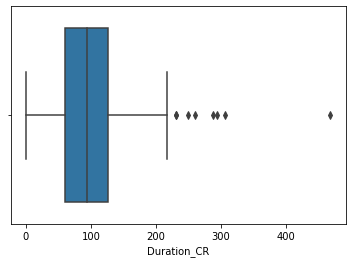

In [226]:
# Using boxplot graph to detect outlier in Duration_CR
sns.boxplot(df_KNN_imputed['Duration_CR'])

p1_duration_cr = lower_whisker(df_KNN_imputed['Duration_CR'])
print(p1_duration_cr)
p2_duration_cr = upper_whisker(df_KNN_imputed['Duration_CR'])
print(p2_duration_cr)


5
170.5


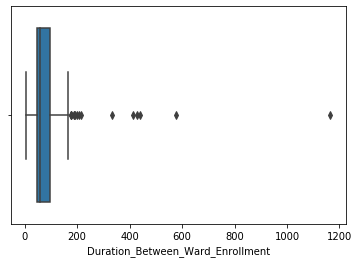

In [227]:
# Using boxplot graph to detect outlier in Duration_Between_Ward_Enrollment
sns.boxplot(df_KNN_imputed['Duration_Between_Ward_Enrollment'])

p1_post_bmi = lower_whisker(df_KNN_imputed['Duration_Between_Ward_Enrollment'])
print(p1_post_bmi)
p2_post_bmi = upper_whisker(df_KNN_imputed['Duration_Between_Ward_Enrollment'])
print(p2_post_bmi)

[0 1]


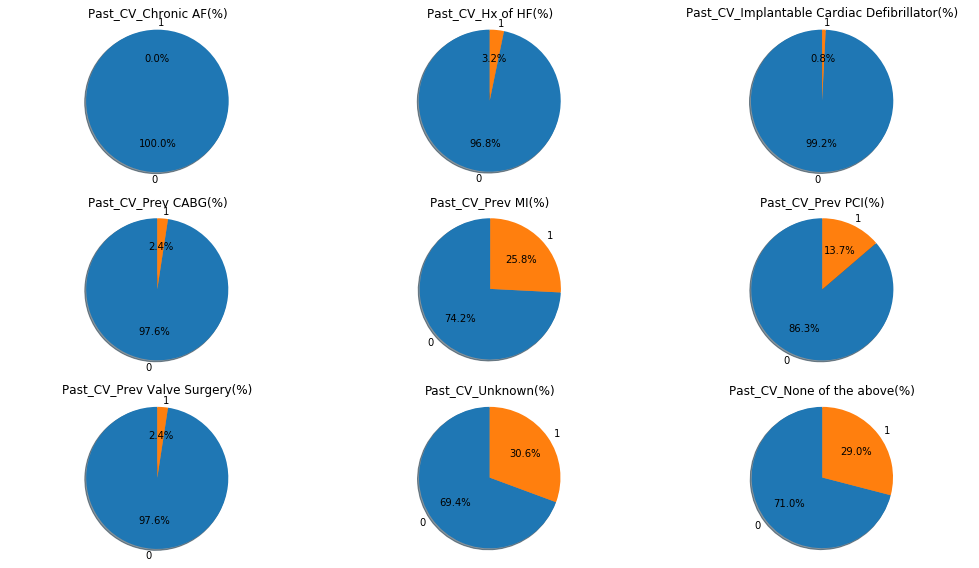

In [228]:
# Post_RTW by Past CV
fig = plt.figure(figsize=(14, 8))

gs1 = gridspec.GridSpec(3, 3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax4 = fig.add_subplot(gs1[3])
ax5 = fig.add_subplot(gs1[4])
ax6 = fig.add_subplot(gs1[5])
ax7 = fig.add_subplot(gs1[6])
ax8 = fig.add_subplot(gs1[7])
ax9 = fig.add_subplot(gs1[8])

#ax1
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Past_CV_Chronic AF']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
print(labels)
sizes = postrtw_diagnosis_medication
sizes.append(0)
explode = (0, 0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Past_CV_Chronic AF(%)")

#ax2
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Past_CV_Hx of HF']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Past_CV_Hx of HF(%)")

#ax3
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Past_CV_Implantable Cardiac Defibrillator']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("Past_CV_Implantable Cardiac Defibrillator(%)")

#ax4
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Past_CV_Prev CABG']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("Past_CV_Prev CABG(%)")

#ax5
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Past_CV_Prev MI']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax5.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax5.set_title("Past_CV_Prev MI(%)")

#ax6
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Past_CV_Prev PCI']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax6.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax6.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax6.set_title("Past_CV_Prev PCI(%)")

#ax7
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Past_CV_Prev Valve Surgery']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax7.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax7.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax7.set_title("Past_CV_Prev Valve Surgery(%)")

#ax8
postrtw_diagnosis_medication_df = df_KNN_imputed.groupby(['Post_RTW', 'Past_CV_Unknown']).size().reset_index(name='Size')
postrtw_diagnosis_medication = postrtw_diagnosis_medication_df[postrtw_diagnosis_medication_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_diagnosis_medication_df.Post_RTW.unique()
sizes = postrtw_diagnosis_medication
explode = (0, 0)
ax8.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax8.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax8.set_title("Past_CV_Unknown(%)")

#ax9
postrtw_cv_df = df_KNN_imputed.groupby(['Post_RTW', 'Past_CV_None of the above']).size().reset_index(name='Size')
postrtw_cv = postrtw_cv_df[postrtw_cv_df['Post_RTW'] == 1]['Size'].tolist()
labels = postrtw_cv_df.Post_RTW.unique()
sizes = postrtw_cv
explode = (0, 0)
ax9.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax9.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax9.set_title("Past_CV_None of the above(%)")


gs1.tight_layout(fig)

<a id='6.DataModeling'></a>
## 6. Data Modeling

In [229]:
df_KNN_imputed = pd.read_excel('CR_Data_KNN_Imputed.xlsx', sheet_name='Sheet1')
df_KNN_imputed.shape

(184, 81)

In [230]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

cat_columns = list(df_KNN_imputed.columns)

# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}

# Loop over columns to encode
for col_name in cat_columns:
  # Create ordinal encoder for the column
  ordinal_enc_dict[col_name] = OrdinalEncoder()

  # Select the nin-null values in the column
  col = df_KNN_imputed[col_name]
  col_not_null = col[col.notnull()]
  reshaped_vals = col_not_null.values.reshape(-1, 1)

  # Encode the non-null values of the column
  encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)

  # Replace the ambience column with ordinal values
  df_KNN_imputed.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)
#Create pandas data frame by loading the data from URL


In [231]:
#pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X = df_KNN_imputed.drop('Post_RTW', axis=1)
y = df_KNN_imputed['Post_RTW']
num_feats = 10
model = list()
accuracyL = list()
f1_scoreL = list()
roc_aucL = list()
method = list()

fb_model = list()
fb_accuracyL = list()
fb_f1_scoreL = list()
fb_roc_aucL = list()
fb_method = list()

wb_model = list()
wb_accuracyL = list()
wb_f1_scoreL = list()
wb_roc_aucL = list()
wb_method = list()

eb_model = list()
eb_accuracyL = list()
eb_f1_scoreL = list()
eb_roc_aucL = list()
eb_method = list()

# Splitting the dataset into the Training set and Test set
sm = SMOTE(random_state=101)
X_resampled, y_resampled = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train.shape

(198, 80)

<a id='6.1Top10Features'></a>
## 6.1 Top 10 features selected by feature selection methods

In [232]:
# filter based selectKBest - chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_train)
fb_chi_selector = SelectKBest(chi2, k=num_feats)
fb_chi_selector.fit(X_norm, y_train)
fb_chi_support = fb_chi_selector.get_support()
fb_chi_feature = X_train.loc[:,fb_chi_support].columns.tolist()
print(str(len(fb_chi_feature)), 'selected features')
print(fb_chi_feature)

10 selected features
['Health_funding', 'Post_Tobacco', 'Age', 'Admission_Diagnosis_CABG', 'Admission_Diagnosis_STEMI', 'Risk_Factors_Hypertension', 'Risk_Factors_Unknown', 'Past_CV_Prev CABG', 'Past_CV_Prev Valve Surgery', 'Pre_Medication_ACEI/ARB']


In [233]:
# filter based selectKBest - anova
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_train)
fb_anova_selector = SelectKBest(f_classif, k=num_feats)
fb_anova_selector.fit(X_norm, y_train)
fb_anova_support = fb_anova_selector.get_support()
fb_anova_feature = X_train.loc[:,fb_anova_support].columns.tolist()
print(str(len(fb_anova_feature)), 'selected features')
print(fb_anova_feature)

10 selected features
['Race', 'Patient_occupation', 'Health_funding', 'Exercise_frequency_sessions_week', 'Age', 'Admission_Diagnosis_CABG', 'Risk_Factors_Hypertension', 'Total_Risk_Factors', 'Past_CV_Prev CABG', 'Pre_METs_range']


In [234]:
# filter based correlation - Pearsons
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
fb_cor_pearsons_support, fb_cor_pearsons_feature = cor_selector(X_train, y_train,num_feats=num_feats+1)
fb_cor_pearsons_feature = fb_cor_pearsons_feature[:-1]
print(str(len(fb_cor_pearsons_feature)), 'selected features')
print(fb_cor_pearsons_feature)

10 selected features
['Post_Return_to_drive', 'Admission_Diagnosis_CABG', 'Patient_occupation', 'Pre_METs_range', 'Exercise_frequency_sessions_week', 'Race', 'Past_CV_Prev CABG', 'Total_Risk_Factors', 'Risk_Factors_Hypertension', 'Health_funding']


In [235]:
# filter based correlation - Heatmap
##heat map
cor = df_KNN_imputed.corr();
#sns.heatmap(cor);

#Correlation with output variable
cor_target = abs(cor["Post_RTW"])
cor_target
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
print(type(relevant_features))

df_heatmap = relevant_features.to_frame(name='Heatmap')
df_heatmap = df_heatmap.sort_values(by=['Heatmap'],ascending=False);
df_heatmap = df_heatmap[1:]
print(df_heatmap)

fb_cor_heatmap_feature = df_heatmap.index.tolist()
print(fb_cor_heatmap_feature)


<class 'pandas.core.series.Series'>
                                 Heatmap
Age                             0.429513
Past_CV_Prev CABG               0.281369
Post_Return_to_drive            0.275404
Health_funding                  0.273863
Risk_Factors_Hypertension       0.257604
Pre_Return_to_drive             0.253655
Pre_METs_range                  0.242820
Admission_Diagnosis_CABG        0.217030
Total_Risk_Factors              0.206712
Post_Exercise_Stress_Test       0.206181
Post_Peak_METs_range            0.202626
AACVPR_Risk_Category            0.190325
Race                            0.182864
Patient_occupation              0.178065
Past_CV_Chronic AF              0.150700
Post_Medication_Statin*         0.140488
Unexpected_Events               0.138385
MACCE                           0.134804
Pre_Exercise_Stress_Test        0.131935
CR_BP_cat                       0.128227
Pre_Medication_ACEI/ARB         0.124270
Pre_Tobacco                     0.122267
Admission_Diagnosis_S

In [236]:
# wrapped based RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
wb_rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
wb_rfe_selector.fit(X_train, y_train)
wb_rfe_support = wb_rfe_selector.get_support()
wb_rfe_feature = X_train.loc[:,wb_rfe_support].columns.tolist()
print(str(len(wb_rfe_feature)), 'selected features')
print(wb_rfe_feature)

Fitting estimator with 80 features.
Fitting estimator with 70 features.
Fitting estimator with 60 features.
Fitting estimator with 50 features.
Fitting estimator with 40 features.
Fitting estimator with 30 features.
Fitting estimator with 20 features.
10 selected features
['Health_funding', 'Post_Exercise_Stress_Test', 'Pre_Return_to_drive', 'Post_Return_to_drive', 'Admission_Diagnosis_NSTEMI', 'Admission_Diagnosis_STEMI', 'Risk_Factors_Hypertension', 'Past_CV_Hx of HF', 'Past_CV_Prev CABG', 'Pre_Medication_ACEI/ARB']


D:\Program\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Program\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Program\Anaconda\lib\site-packages\sklearn\linear

In [237]:
#embedded - random forest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

eb_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=101), max_features=num_feats)
eb_rf_selector.fit(X_train, y_train)

eb_rf_support = eb_rf_selector.get_support()
eb_rf_feature = X_train.loc[:,eb_rf_support].columns.tolist()
print(str(len(eb_rf_feature)), 'selected features')
print(eb_rf_feature)

10 selected features
['Race', 'Health_funding', 'AACVPR_Risk_Category', 'Exercise_frequency_sessions_week', 'Anxiety_Scores', 'Age', 'Risk_Factors_Hypertension', 'Total_Risk_Factors', 'CR_BP_cat', 'Duration_CR']


In [238]:
#embedded - xgboost
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

xg=XGBClassifier(random_state=101)

eb_xg_selector = SelectFromModel(xg, max_features=num_feats)
eb_xg_selector.fit(X_train, y_train)

eb_xg_support = eb_xg_selector.get_support()
eb_xg_feature = X_train.loc[:,eb_xg_support].columns.tolist()
print(str(len(eb_xg_feature)), 'selected features')
print(eb_xg_feature)


[22:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
10 selected features
['Patient_occupation', 'Health_funding', 'Exercise_frequency_mins_week', 'Unexpected_Events', 'Age', 'Gender', 'Risk_Factors_Hypertension', 'Pre_Medication_ACEI/ARB', 'Pre_Medication_Aspirin', 'Post_Peak_Heart_Rate_range']


D:\Program\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



In [239]:
#embedded - lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

estimator = LassoCV(cv=5, normalize = True, random_state=101)

# Set a minimum threshold of 0.25
eb_lasso_selector = SelectFromModel(estimator, max_features=num_feats)
eb_lasso_selector.fit(X_train, y_train)

eb_lasso_support = eb_lasso_selector.get_support()
eb_lasso_feature = X_train.loc[:,eb_lasso_support].columns.tolist()
print(str(len(eb_lasso_feature)), 'selected features')
print(eb_lasso_feature)

10 selected features
['Health_funding', 'Post_Tobacco', 'Post_Exercise_Stress_Test', 'Post_Return_to_drive', 'Post_erectile_dysfunction', 'Unexpected_Events', 'Risk_Factors_Hypertension', 'Past_CV_Chronic AF', 'Past_CV_Hx of HF', 'Past_CV_Prev CABG']


<a id='6.2WrappedBased'></a>
## 6.2 Wrapped-Based Feature Selection Method

<a id='6.2.1 RFE'></a>
## 6.2.1 RFE

In [240]:
### RFE
X_train2 = X_train[wb_rfe_feature];
X_test2 = X_test[wb_rfe_feature];

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
y_predict_gnb = gnb.predict(X_test2)
#accuracy
accuracy_gnb = gnb.score(X_test2, y_test)
# f1 score
f1_score_gnb = f1_score(y_predict_gnb, y_test)
#append table
model.append('NB')
method.append('RFE')
accuracyL.append(accuracy_gnb)
f1_scoreL.append(f1_score_gnb)

wb_model.append('NB')
wb_method.append('RFE')
wb_accuracyL.append(accuracy_gnb)
wb_f1_scoreL.append(f1_score_gnb)
print(accuracy_gnb) # Calculate accuracy
print(f1_score_gnb)

#SVM
#clf = svm.SVC(kernel='linear', C = 1.0, random_state = 42)
clf = svm.SVC(kernel='rbf', random_state = 101)
clf.fit(X_train2, y_train)
y_predict_svm = clf.predict(X_test2)
#accuracy
accuracy_svm = clf.score(X_test2, y_test)
#accuracy_svm2 = metrics.accuracy_score(X_test_fs, y_predict_svm)
# f1 score
f1_score_svm = metrics.f1_score(y_predict_svm, y_test)
#append table
model.append('SVM')
method.append('RFE')
accuracyL.append(accuracy_svm)
f1_scoreL.append(f1_score_svm)

wb_model.append('SVM')
wb_method.append('RFE')
wb_accuracyL.append(accuracy_svm)
wb_f1_scoreL.append(f1_score_svm)
print(accuracy_svm) # Calculate accuracy
print(f1_score_svm)

#reg
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
y_predict_reg = reg.predict(X_test2)
#accuracy
accuracy_reg = reg.score(X_test2, y_test)
#accuracy_reg = accuracy_score(X_test_fs, y_predict_reg)
# f1 score
f1_score_reg = f1_score(y_predict_reg, y_test)
#append table
model.append('LR')
method.append('RFE')
accuracyL.append(accuracy_reg)
f1_scoreL.append(f1_score_reg)

wb_model.append('LR')
wb_method.append('RFE')
wb_accuracyL.append(accuracy_reg)
wb_f1_scoreL.append(f1_score_reg)
print(accuracy_reg) # Calculate accuracy
print(f1_score_reg)

#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
y_predict = knn.predict(X_test2)
#accuracy
accuracy_knn = knn.score(X_test2, y_test)
# f1 score
f1_score_knn = f1_score(y_predict.round(), y_test)
model.append('KNN')
method.append('RFE')
accuracyL.append(accuracy_knn)
f1_scoreL.append(f1_score_knn)

wb_model.append('KNN')
wb_method.append('RFE')
wb_accuracyL.append(accuracy_knn)
wb_f1_scoreL.append(f1_score_knn)
print(accuracy_knn) # Calculate accuracy
print(f1_score_knn)


#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
y_predict = rf.predict(X_test2)
#accuracy
accuracy_rf = rf.score(X_test2, y_test)
# f1 score
f1_score_rf = f1_score(y_predict, y_test)
model.append('DT')
method.append('RFE')
accuracyL.append(accuracy_rf)
f1_scoreL.append(f1_score_rf)

wb_model.append('DT')
wb_method.append('RFE')
wb_accuracyL.append(accuracy_rf)
wb_f1_scoreL.append(f1_score_rf)
print(accuracy_rf)
print(f1_score_rf)

0.74
0.6976744186046512
0.7
0.6341463414634146
0.74
0.6829268292682927
0.7
0.6341463414634146
0.68
0.6190476190476191


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.773
Naive Bayes: ROC AUC=0.778
SVM: ROC AUC=0.752
KNN: ROC AUC=0.757
Decision Tree: ROC AUC=0.735


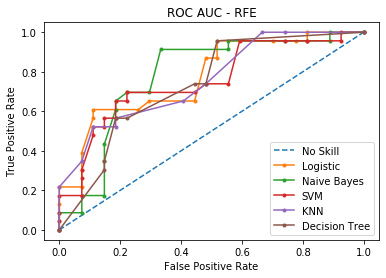

In [241]:
#RFE
X_train2 = X_train[wb_rfe_feature];
X_test2 = X_test[wb_rfe_feature];

ns_probs = [0 for _ in range(len(y_test))]

# fit a model
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
lr_probs = reg.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
nb_probs = gnb.predict_proba(X_test2)
nb_probs = nb_probs[:, 1]

#SVM
#clf = svm.SVC(kernel='linear', C = 1.0, random_state = 42)
clf = svm.SVC(kernel='rbf', random_state = 101, probability=True)
clf.fit(X_train2, y_train)
svm_probs = clf.predict_proba(X_test2)
svm_probs = svm_probs[:, 1]

#knn
#print(X_test2)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train2, y_train)    
knn_probs = knn.predict_proba(X_test2)
knn_probs = knn_probs[:, 1]

#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
dt_probs = rf.predict_proba(X_test2)
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
roc_aucL.append(nb_auc)
roc_aucL.append(svm_auc)
roc_aucL.append(lr_auc)
roc_aucL.append(knn_auc)
roc_aucL.append(dt_auc)
wb_roc_aucL.append(nb_auc)
wb_roc_aucL.append(svm_auc)
wb_roc_aucL.append(lr_auc)
wb_roc_aucL.append(knn_auc)
wb_roc_aucL.append(dt_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.title("ROC AUC - RFE")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [242]:
wb_combine = list(zip(wb_model, wb_method, wb_accuracyL, wb_f1_scoreL,wb_roc_aucL))
wb_Accuracy_result = pd.DataFrame(wb_combine, columns =['Model', 'Method', 'Accuracy','F1Score','ROC_AUC'])
wb_Accuracy_result['Accuracy']=wb_Accuracy_result['Accuracy'].apply(lambda x:round(x,2))
wb_Accuracy_result['F1Score']=wb_Accuracy_result['F1Score'].apply(lambda x:round(x,2))
wb_Accuracy_result['ROC_AUC']=wb_Accuracy_result['ROC_AUC'].apply(lambda x:round(x,2))
wb_Accuracy_result

Model Method  Accuracy  F1Score  ROC_AUC
0    NB    RFE      0.74     0.70     0.78
1   SVM    RFE      0.70     0.63     0.75
2    LR    RFE      0.74     0.68     0.77
3   KNN    RFE      0.70     0.63     0.76
4    DT    RFE      0.68     0.62     0.74

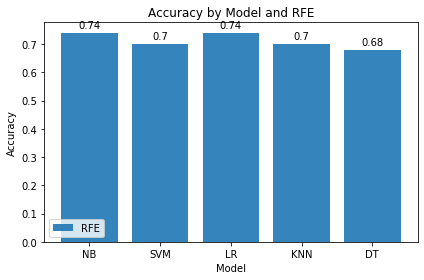

In [243]:
result_1 = (wb_Accuracy_result[wb_Accuracy_result['Method'] == 'RFE'].Accuracy)

result_1_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_1))  # the x locations for the groups
width = 0.8  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind, result_1, width, yerr=result_1_std, label='RFE' , alpha =0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('Accuracy by Model and RFE')
ax.set_xticks(ind)
ax.set_xticklabels(wb_Accuracy_result.Model.unique())
ax.legend(loc=3)

autolabel(rects1, "center")

fig.tight_layout()

plt.show()

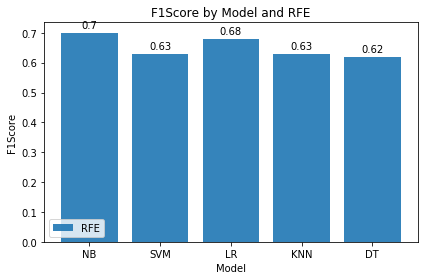

In [244]:
result_1 = (wb_Accuracy_result[wb_Accuracy_result['Method'] == 'RFE'].F1Score)

result_1_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_1))  # the x locations for the groups
width = 0.8  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind, result_1, width, yerr=result_1_std, label='RFE' , alpha =0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1Score')
ax.set_xlabel('Model')
ax.set_title('F1Score by Model and RFE')
ax.set_xticks(ind)
ax.set_xticklabels(wb_Accuracy_result.Model.unique())
ax.legend(loc=3)

autolabel(rects1, "center")

fig.tight_layout()

plt.show()

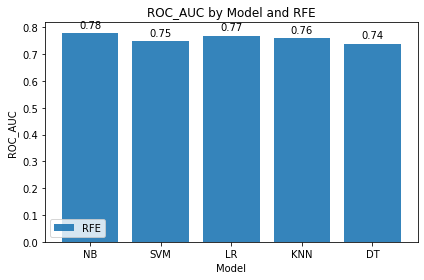

In [245]:
result_1 = (wb_Accuracy_result[wb_Accuracy_result['Method'] == 'RFE'].ROC_AUC)

result_1_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_1))  # the x locations for the groups
width = 0.8  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(ind, result_1, width, yerr=result_1_std, label='RFE' , alpha =0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ROC_AUC')
ax.set_xlabel('Model')
ax.set_title('ROC_AUC by Model and RFE')
ax.set_xticks(ind)
ax.set_xticklabels(wb_Accuracy_result.Model.unique())
ax.legend(loc=3)

autolabel(rects1, "center")

fig.tight_layout()

plt.show()

<a id='6.3Embedded'></a>
## 6.3 Embedded Feature Selection Method

<a id='6.3.1RandomForest'></a>
## 6.3.1 Random Forest 

In [246]:
###Random Forest
X_train2 = X_train[eb_rf_feature];
X_test2 = X_test[eb_rf_feature];

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
y_predict_gnb = gnb.predict(X_test2)
#accuracy
accuracy_gnb = gnb.score(X_test2, y_test)
# f1 score
f1_score_gnb = f1_score(y_predict_gnb, y_test)
#append table
model.append('NB')
method.append('RF')
accuracyL.append(accuracy_gnb)
f1_scoreL.append(f1_score_gnb)

eb_model.append('NB')
eb_method.append('RF')
eb_accuracyL.append(accuracy_gnb)
eb_f1_scoreL.append(f1_score_gnb)
print(accuracy_gnb) # Calculate accuracy
print(f1_score_gnb)

#SVM
#clf = svm.SVC(kernel='linear', C = 1.0, random_state = 42)
clf = svm.SVC(kernel='rbf', random_state = 101)
clf.fit(X_train2, y_train)
y_predict_svm = clf.predict(X_test2)
#accuracy
accuracy_svm = clf.score(X_test2, y_test)
#accuracy_svm2 = metrics.accuracy_score(X_test_fs, y_predict_svm)
# f1 score
f1_score_svm = metrics.f1_score(y_predict_svm, y_test)
#append table
model.append('SVM')
method.append('RF')
accuracyL.append(accuracy_svm)
f1_scoreL.append(f1_score_svm)

eb_model.append('SVM')
eb_method.append('RF')
eb_accuracyL.append(accuracy_svm)
eb_f1_scoreL.append(f1_score_svm)
print(accuracy_svm) # Calculate accuracy
print(f1_score_svm)

#reg
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
y_predict_reg = reg.predict(X_test2)
#accuracy
accuracy_reg = reg.score(X_test2, y_test)
#accuracy_reg = accuracy_score(X_test_fs, y_predict_reg)
# f1 score
f1_score_reg = f1_score(y_predict_reg, y_test)
#append table
model.append('LR')
method.append('RF')
accuracyL.append(accuracy_reg)
f1_scoreL.append(f1_score_reg)

eb_model.append('LR')
eb_method.append('RF')
eb_accuracyL.append(accuracy_reg)
eb_f1_scoreL.append(f1_score_reg)
print(accuracy_reg) # Calculate accuracy
print(f1_score_reg)

#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
y_predict = knn.predict(X_test2)
#accuracy
accuracy_knn = knn.score(X_test2, y_test)
# f1 score
f1_score_knn = f1_score(y_predict.round(), y_test)
model.append('KNN')
method.append('RF')
accuracyL.append(accuracy_knn)
f1_scoreL.append(f1_score_knn)

eb_model.append('KNN')
eb_method.append('RF')
eb_accuracyL.append(accuracy_knn)
eb_f1_scoreL.append(f1_score_knn)
print(accuracy_knn) # Calculate accuracy
print(f1_score_knn)


#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
y_predict = rf.predict(X_test2)
#accuracy
accuracy_rf = rf.score(X_test2, y_test)
# f1 score
f1_score_rf = f1_score(y_predict, y_test)
model.append('DT')
method.append('RF')
accuracyL.append(accuracy_rf)
f1_scoreL.append(f1_score_rf)

eb_model.append('DT')
eb_method.append('RF')
eb_accuracyL.append(accuracy_rf)
eb_f1_scoreL.append(f1_score_rf)
print(accuracy_rf)
print(f1_score_rf)

0.74
0.723404255319149
0.78
0.7441860465116279
0.78
0.7555555555555555
0.74
0.6976744186046512
0.76
0.7499999999999999


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.850
Naive Bayes: ROC AUC=0.839
SVM: ROC AUC=0.858
KNN: ROC AUC=0.838
Decision Tree: ROC AUC=0.762


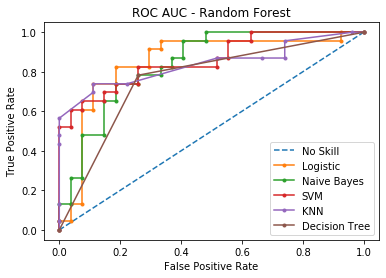

In [247]:
#random forest
X_train2 = X_train[eb_rf_feature];
X_test2 = X_test[eb_rf_feature];

ns_probs = [0 for _ in range(len(y_test))]

# fit a model
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
lr_probs = reg.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
nb_probs = gnb.predict_proba(X_test2)
nb_probs = nb_probs[:, 1]

#SVM
#clf = svm.SVC(kernel='linear', C = 1.0, random_state = 42)
clf = svm.SVC(kernel='rbf', random_state = 101, probability=True)
clf.fit(X_train2, y_train)
svm_probs = clf.predict_proba(X_test2)
svm_probs = svm_probs[:, 1]

#knn
#print(X_test2)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train2, y_train)    
knn_probs = knn.predict_proba(X_test2)
knn_probs = knn_probs[:, 1]

#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
dt_probs = rf.predict_proba(X_test2)
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))

roc_aucL.append(nb_auc)
roc_aucL.append(svm_auc)
roc_aucL.append(lr_auc)
roc_aucL.append(knn_auc)
roc_aucL.append(dt_auc)
eb_roc_aucL.append(nb_auc)
eb_roc_aucL.append(svm_auc)
eb_roc_aucL.append(lr_auc)
eb_roc_aucL.append(knn_auc)
eb_roc_aucL.append(dt_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.title("ROC AUC - Random Forest")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<a id='6.3.2XGBoost'></a>
## 6.3.2 XGBoost

In [248]:
###XGBoost

X_train2 = X_train[eb_xg_feature];
X_test2 = X_test[eb_xg_feature];

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
y_predict_gnb = gnb.predict(X_test2)
#accuracy
accuracy_gnb = gnb.score(X_test2, y_test)
# f1 score
f1_score_gnb = f1_score(y_predict_gnb, y_test)
#append table
model.append('NB')
method.append('XG')
accuracyL.append(accuracy_gnb)
f1_scoreL.append(f1_score_gnb)

eb_model.append('NB')
eb_method.append('XG')
eb_accuracyL.append(accuracy_gnb)
eb_f1_scoreL.append(f1_score_gnb)
print(accuracy_gnb) # Calculate accuracy
print(f1_score_gnb)

#SVM
clf = svm.SVC(kernel='rbf',random_state = 101)
clf.fit(X_train2, y_train)
y_predict_svm = clf.predict(X_test2)
#accuracy
accuracy_svm = clf.score(X_test2, y_test)
# f1 score
f1_score_svm = f1_score(y_predict_svm, y_test)
#append table
model.append('SVM')
method.append('XG')
accuracyL.append(accuracy_svm)
f1_scoreL.append(f1_score_svm)

eb_model.append('SVM')
eb_method.append('XG')
eb_accuracyL.append(accuracy_svm)
eb_f1_scoreL.append(f1_score_svm)
print(accuracy_svm) # Calculate accuracy
print(f1_score_svm)

#reg
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
y_predict_reg = reg.predict(X_test2)
#accuracy
accuracy_reg = reg.score(X_test2, y_test)
# f1 score
f1_score_reg = f1_score(y_predict_reg, y_test)
#append table
model.append('LR')
method.append('XG')
accuracyL.append(accuracy_reg)
f1_scoreL.append(f1_score_reg)

eb_model.append('LR')
eb_method.append('XG')
eb_accuracyL.append(accuracy_reg)
eb_f1_scoreL.append(f1_score_reg)
print(accuracy_reg) # Calculate accuracy
print(f1_score_reg)

#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
y_predict = knn.predict(X_test2)
#accuracy
accuracy_knn = knn.score(X_test2, y_test)
# f1 score
f1_score_knn = f1_score(y_predict.round(), y_test)
model.append('KNN')
method.append('XG')
accuracyL.append(accuracy_knn)
f1_scoreL.append(f1_score_knn)

eb_model.append('KNN')
eb_method.append('XG')
eb_accuracyL.append(accuracy_knn)
eb_f1_scoreL.append(f1_score_knn)
print(accuracy_knn) # Calculate accuracy
print(f1_score_knn)


#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
y_predict = rf.predict(X_test2)
#accuracy
accuracy_rf = rf.score(X_test2, y_test)
# f1 score
f1_score_rf = f1_score(y_predict, y_test)
model.append('DT')
method.append('XG')
accuracyL.append(accuracy_rf)
f1_scoreL.append(f1_score_rf)

eb_model.append('DT')
eb_method.append('XG')
eb_accuracyL.append(accuracy_rf)
eb_f1_scoreL.append(f1_score_rf)
print(accuracy_rf)
print(f1_score_rf)


0.7
0.6666666666666666
0.74
0.6976744186046512
0.8
0.75
0.7
0.6666666666666666
0.74
0.711111111111111


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.845
Naive Bayes: ROC AUC=0.739
SVM: ROC AUC=0.762
KNN: ROC AUC=0.746
Decision Tree: ROC AUC=0.737


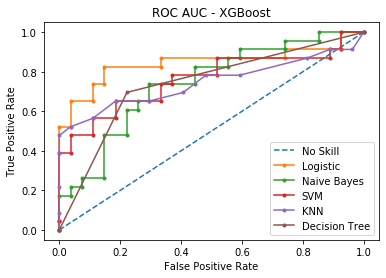

In [249]:
#xgboost
X_train2 = X_train[eb_xg_feature];
X_test2 = X_test[eb_xg_feature];

ns_probs = [0 for _ in range(len(y_test))]

# fit a model
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
lr_probs = reg.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
nb_probs = gnb.predict_proba(X_test2)
nb_probs = nb_probs[:, 1]

#SVM
#clf = svm.SVC(kernel='linear', C = 1.0, random_state = 42)
clf = svm.SVC(kernel='rbf', random_state = 101, probability=True)
clf.fit(X_train2, y_train)
svm_probs = clf.predict_proba(X_test2)
svm_probs = svm_probs[:, 1]

#knn
#print(X_test2)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train2, y_train)    
knn_probs = knn.predict_proba(X_test2)
knn_probs = knn_probs[:, 1]

#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
dt_probs = rf.predict_proba(X_test2)
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
roc_aucL.append(nb_auc)
roc_aucL.append(svm_auc)
roc_aucL.append(lr_auc)
roc_aucL.append(knn_auc)
roc_aucL.append(dt_auc)
eb_roc_aucL.append(nb_auc)
eb_roc_aucL.append(svm_auc)
eb_roc_aucL.append(lr_auc)
eb_roc_aucL.append(knn_auc)
eb_roc_aucL.append(dt_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.title("ROC AUC - XGBoost")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<a id='6.3.3Lasso'></a>
## 6.3.3 Lasso

In [250]:
###LASSO
X_train2 = X_train[eb_lasso_feature];
X_test2 = X_test[eb_lasso_feature];

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
y_predict_gnb = gnb.predict(X_test2)
#accuracy
accuracy_gnb = gnb.score(X_test2, y_test)
# f1 score
f1_score_gnb = f1_score(y_predict_gnb, y_test)
#append table
model.append('NB')
method.append('Lasso')
accuracyL.append(accuracy_gnb)
f1_scoreL.append(f1_score_gnb)

eb_model.append('NB')
eb_method.append('Lasso')
eb_accuracyL.append(accuracy_gnb)
eb_f1_scoreL.append(f1_score_gnb)
print(accuracy_gnb) # Calculate accuracy
print(f1_score_gnb)

#SVM
clf = svm.SVC(kernel='rbf',random_state = 101)
clf.fit(X_train2, y_train)
y_predict_svm = clf.predict(X_test2)
#accuracy
accuracy_svm = clf.score(X_test2, y_test)
# f1 score
f1_score_svm = f1_score(y_predict_svm, y_test)
#append table
model.append('SVM')
method.append('Lasso')
accuracyL.append(accuracy_svm)
f1_scoreL.append(f1_score_svm)

eb_model.append('SVM')
eb_method.append('Lasso')
eb_accuracyL.append(accuracy_svm)
eb_f1_scoreL.append(f1_score_svm)
print(accuracy_svm) # Calculate accuracy
print(f1_score_svm)

#reg
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
y_predict_reg = reg.predict(X_test2)
#accuracy
accuracy_reg = reg.score(X_test2, y_test)
# f1 score
f1_score_reg = f1_score(y_predict_reg, y_test)
#append table
model.append('LR')
method.append('Lasso')
accuracyL.append(accuracy_reg)
f1_scoreL.append(f1_score_reg)

eb_model.append('LR')
eb_method.append('Lasso')
eb_accuracyL.append(accuracy_reg)
eb_f1_scoreL.append(f1_score_reg)
print(accuracy_reg) # Calculate accuracy
print(f1_score_reg)

#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
y_predict = knn.predict(X_test2)
#accuracy
accuracy_knn = knn.score(X_test2, y_test)
# f1 score
f1_score_knn = f1_score(y_predict.round(), y_test)
model.append('KNN')
method.append('Lasso')
accuracyL.append(accuracy_knn)
f1_scoreL.append(f1_score_knn)

eb_model.append('KNN')
eb_method.append('Lasso')
eb_accuracyL.append(accuracy_knn)
eb_f1_scoreL.append(f1_score_knn)
print(accuracy_knn) # Calculate accuracy
print(f1_score_knn)


#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
y_predict = rf.predict(X_test2)
#accuracy
accuracy_rf = rf.score(X_test2, y_test)
# f1 score
f1_score_rf = f1_score(y_predict, y_test)
model.append('DT')
method.append('Lasso')
accuracyL.append(accuracy_rf)
f1_scoreL.append(f1_score_rf)

eb_model.append('DT')
eb_method.append('Lasso')
eb_accuracyL.append(accuracy_rf)
eb_f1_scoreL.append(f1_score_rf)
print(accuracy_rf)
print(f1_score_rf)

0.58
0.6769230769230768
0.68
0.6190476190476191
0.7
0.6511627906976744
0.74
0.6829268292682927
0.72
0.6956521739130435


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.749
Naive Bayes: ROC AUC=0.762
SVM: ROC AUC=0.752
KNN: ROC AUC=0.771
Decision Tree: ROC AUC=0.772


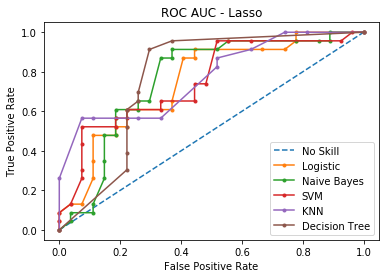

In [251]:
#lasso
X_train2 = X_train[eb_lasso_feature];
X_test2 = X_test[eb_lasso_feature];

ns_probs = [0 for _ in range(len(y_test))]

# fit a model
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
lr_probs = reg.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
nb_probs = gnb.predict_proba(X_test2)
nb_probs = nb_probs[:, 1]

#SVM
#clf = svm.SVC(kernel='linear', C = 1.0, random_state = 42)
clf = svm.SVC(kernel='rbf', random_state = 101, probability=True)
clf.fit(X_train2, y_train)
svm_probs = clf.predict_proba(X_test2)
svm_probs = svm_probs[:, 1]

#knn
#print(X_test2)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train2, y_train)    
knn_probs = knn.predict_proba(X_test2)
knn_probs = knn_probs[:, 1]

#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
dt_probs = rf.predict_proba(X_test2)
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
roc_aucL.append(nb_auc)
roc_aucL.append(svm_auc)
roc_aucL.append(lr_auc)
roc_aucL.append(knn_auc)
roc_aucL.append(dt_auc)
eb_roc_aucL.append(nb_auc)
eb_roc_aucL.append(svm_auc)
eb_roc_aucL.append(lr_auc)
eb_roc_aucL.append(knn_auc)
eb_roc_aucL.append(dt_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.title("ROC AUC - Lasso")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [252]:
eb_combine = list(zip(eb_model, eb_method, eb_accuracyL, eb_f1_scoreL, eb_roc_aucL))
eb_Accuracy_result = pd.DataFrame(eb_combine, columns =['Model', 'Method', 'Accuracy','F1Score','ROC_AUC'])
eb_Accuracy_result['Accuracy']=eb_Accuracy_result['Accuracy'].apply(lambda x:round(x,2))
eb_Accuracy_result['F1Score']=eb_Accuracy_result['F1Score'].apply(lambda x:round(x,2))
eb_Accuracy_result['ROC_AUC']=eb_Accuracy_result['ROC_AUC'].apply(lambda x:round(x,2))
eb_Accuracy_result

Model Method  Accuracy  F1Score  ROC_AUC
0     NB     RF      0.74     0.72     0.84
1    SVM     RF      0.78     0.74     0.86
2     LR     RF      0.78     0.76     0.85
3    KNN     RF      0.74     0.70     0.84
4     DT     RF      0.76     0.75     0.76
5     NB     XG      0.70     0.67     0.74
6    SVM     XG      0.74     0.70     0.76
7     LR     XG      0.80     0.75     0.85
8    KNN     XG      0.70     0.67     0.75
9     DT     XG      0.74     0.71     0.74
10    NB  Lasso      0.58     0.68     0.76
11   SVM  Lasso      0.68     0.62     0.75
12    LR  Lasso      0.70     0.65     0.75
13   KNN  Lasso      0.74     0.68     0.77
14    DT  Lasso      0.72     0.70     0.77

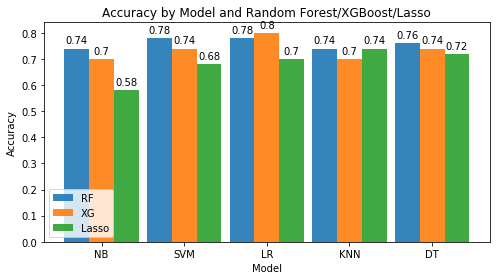

In [253]:
result_1 = (eb_Accuracy_result[eb_Accuracy_result['Method'] == 'RF'].Accuracy)
result_2 = (eb_Accuracy_result[eb_Accuracy_result['Method'] == 'XG'].Accuracy)
result_3 = (eb_Accuracy_result[eb_Accuracy_result['Method'] == 'Lasso'].Accuracy)

result_1_std = (0, 0, 0, 0, 0)
result_2_std = (0, 0, 0, 0, 0)
result_3_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_1))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 4))
rects1 = ax.bar(ind - (1*width), result_1, width, yerr=result_1_std, label='RF' , alpha =0.9)
rects2 = ax.bar(ind , result_2, width, yerr=result_2_std, label='XG', alpha =0.9)
rects3 = ax.bar(ind + width, result_3, width, yerr=result_3_std, label='Lasso', alpha =0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('Accuracy by Model and Random Forest/XGBoost/Lasso')
ax.set_xticks(ind)
ax.set_xticklabels(eb_Accuracy_result.Model.unique())
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

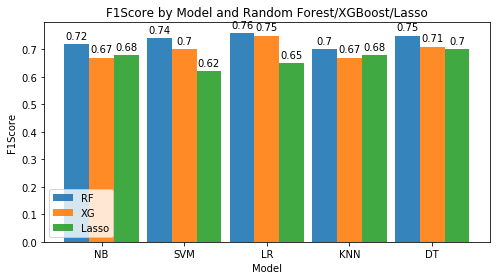

In [254]:
result_1 = (eb_Accuracy_result[eb_Accuracy_result['Method'] == 'RF'].F1Score)
result_2 = (eb_Accuracy_result[eb_Accuracy_result['Method'] == 'XG'].F1Score)
result_3 = (eb_Accuracy_result[eb_Accuracy_result['Method'] == 'Lasso'].F1Score)

result_1_std = (0, 0, 0, 0, 0)
result_2_std = (0, 0, 0, 0, 0)
result_3_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_1))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 4))
rects1 = ax.bar(ind - (1*width), result_1, width, yerr=result_1_std, label='RF', alpha =0.9)
rects2 = ax.bar(ind , result_2, width, yerr=result_2_std, label='XG', alpha =0.9)
rects3 = ax.bar(ind + width, result_3, width, yerr=result_3_std, label='Lasso', alpha =0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1Score')
ax.set_xlabel('Model')
ax.set_title('F1Score by Model and Random Forest/XGBoost/Lasso')
ax.set_xticks(ind)
ax.set_xticklabels(eb_Accuracy_result.Model.unique())
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

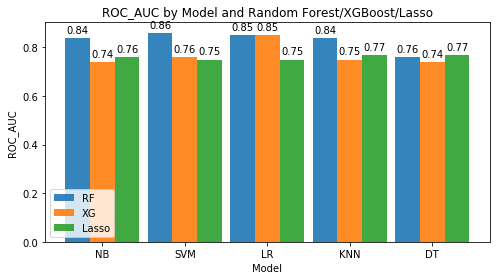

In [255]:
result_1 = (eb_Accuracy_result[eb_Accuracy_result['Method'] == 'RF'].ROC_AUC)
result_2 = (eb_Accuracy_result[eb_Accuracy_result['Method'] == 'XG'].ROC_AUC)
result_3 = (eb_Accuracy_result[eb_Accuracy_result['Method'] == 'Lasso'].ROC_AUC)

result_1_std = (0, 0, 0, 0, 0)
result_2_std = (0, 0, 0, 0, 0)
result_3_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_1))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 4))
rects1 = ax.bar(ind - (1*width), result_1, width, yerr=result_1_std, label='RF', alpha =0.9)
rects2 = ax.bar(ind , result_2, width, yerr=result_2_std, label='XG', alpha =0.9)
rects3 = ax.bar(ind + width, result_3, width, yerr=result_3_std, label='Lasso', alpha =0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ROC_AUC')
ax.set_xlabel('Model')
ax.set_title('ROC_AUC by Model and Random Forest/XGBoost/Lasso')
ax.set_xticks(ind)
ax.set_xticklabels(eb_Accuracy_result.Model.unique())
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

<a id='6.4FilterBased'></a>
## 6.4 Filter-Based Feature Selection Method

<a id='6.4.1Chi-Square'></a>
## 6.4.1 Chi-Square

In [256]:
#chi-square
X_train2 = X_train[fb_chi_feature];
X_test2 = X_test[fb_chi_feature];


#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
y_predict_gnb = gnb.predict(X_test2)
#accuracy
accuracy_gnb = gnb.score(X_test2, y_test)
# f1 score
f1_score_gnb = f1_score(y_predict_gnb, y_test)
#append table
model.append('NB')
method.append('chi2')
accuracyL.append(accuracy_gnb)
f1_scoreL.append(f1_score_gnb)

fb_model.append('NB')
fb_method.append('chi2')
fb_accuracyL.append(accuracy_gnb)
fb_f1_scoreL.append(f1_score_gnb)

print(accuracy_gnb) # Calculate accuracy
print(f1_score_gnb)

#SVM
clf = svm.SVC(kernel='rbf',random_state =101)
clf.fit(X_train2, y_train)
y_predict_svm = clf.predict(X_test2)
#accuracy
accuracy_svm = clf.score(X_test2, y_test)
# f1 score
f1_score_svm = f1_score(y_predict_svm, y_test)
#append table
model.append('SVM')
method.append('chi2')
accuracyL.append(accuracy_svm)
f1_scoreL.append(f1_score_svm)

fb_model.append('SVM')
fb_method.append('chi2')
fb_accuracyL.append(accuracy_svm)
fb_f1_scoreL.append(f1_score_svm)

print(accuracy_svm) # Calculate accuracy
print(f1_score_svm)

#reg
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
y_predict_reg = reg.predict(X_test2)
#accuracy
accuracy_reg = reg.score(X_test2, y_test)
# f1 score
f1_score_reg = f1_score(y_predict_reg, y_test)
#append table
model.append('LR')
method.append('chi2')
accuracyL.append(accuracy_reg)
f1_scoreL.append(f1_score_reg)

fb_model.append('LR')
fb_method.append('chi2')
fb_accuracyL.append(accuracy_reg)
fb_f1_scoreL.append(f1_score_reg)

print(accuracy_reg) # Calculate accuracy
print(f1_score_reg)

#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
y_predict = knn.predict(X_test2)
#accuracy
accuracy_knn = knn.score(X_test2, y_test)
# f1 score
f1_score_knn = f1_score(y_predict.round(), y_test)
model.append('KNN')
method.append('chi2')
accuracyL.append(accuracy_knn)
f1_scoreL.append(f1_score_knn)

fb_model.append('KNN')
fb_method.append('chi2')
fb_accuracyL.append(accuracy_knn)
fb_f1_scoreL.append(f1_score_knn)
print(accuracy_knn) # Calculate accuracy
print(f1_score_knn)


#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
y_predict = rf.predict(X_test2)
#accuracy
accuracy_rf = rf.score(X_test2, y_test)
# f1 score
f1_score_rf = f1_score(y_predict, y_test)
model.append('DT')
method.append('chi2')
accuracyL.append(accuracy_rf)
f1_scoreL.append(f1_score_rf)

fb_model.append('DT')
fb_method.append('chi2')
fb_accuracyL.append(accuracy_rf)
fb_f1_scoreL.append(f1_score_rf)
print(accuracy_rf)
print(f1_score_rf)

0.58
0.27586206896551724
0.74
0.6976744186046512
0.72
0.65
0.78
0.7317073170731708
0.74
0.6829268292682927


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.772
Naive Bayes: ROC AUC=0.766
SVM: ROC AUC=0.759
KNN: ROC AUC=0.846
Decision Tree: ROC AUC=0.723


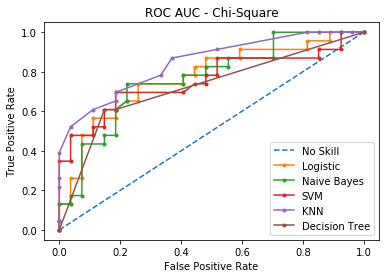

In [257]:
#Chi-Square
X_train2 = X_train[fb_chi_feature];
X_test2 = X_test[fb_chi_feature];

ns_probs = [0 for _ in range(len(y_test))]

# fit a model
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
lr_probs = reg.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
nb_probs = gnb.predict_proba(X_test2)
nb_probs = nb_probs[:, 1]

#SVM
#clf = svm.SVC(kernel='linear', C = 1.0, random_state = 42)
clf = svm.SVC(kernel='rbf', random_state = 101, probability=True)
clf.fit(X_train2, y_train)
svm_probs = clf.predict_proba(X_test2)
svm_probs = svm_probs[:, 1]

#knn
#print(X_test2)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train2, y_train)    
knn_probs = knn.predict_proba(X_test2)
knn_probs = knn_probs[:, 1]

#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
dt_probs = rf.predict_proba(X_test2)
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
roc_aucL.append(nb_auc)
roc_aucL.append(svm_auc)
roc_aucL.append(lr_auc)
roc_aucL.append(knn_auc)
roc_aucL.append(dt_auc)
fb_roc_aucL.append(nb_auc)
fb_roc_aucL.append(svm_auc)
fb_roc_aucL.append(lr_auc)
fb_roc_aucL.append(knn_auc)
fb_roc_aucL.append(dt_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.title("ROC AUC - Chi-Square")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<a id='6.4.2Anova'></a>
## 6.4.2 Anova

In [258]:
#Anova

X_train2 = X_train[fb_anova_feature];
X_test2 = X_test[fb_anova_feature];

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
y_predict_gnb = gnb.predict(X_test2)
#accuracy
accuracy_gnb = gnb.score(X_test2, y_test)
# f1 score
f1_score_gnb = f1_score(y_predict_gnb, y_test)
#append table
model.append('NB')
method.append('Anova')
accuracyL.append(accuracy_gnb)
f1_scoreL.append(f1_score_gnb)

fb_model.append('NB')
fb_method.append('Anova')
fb_accuracyL.append(accuracy_gnb)
fb_f1_scoreL.append(f1_score_gnb)

print(accuracy_gnb) # Calculate accuracy
print(f1_score_gnb)

#SVM
clf = svm.SVC(kernel='rbf',random_state = 101)
clf.fit(X_train2, y_train)
y_predict_svm = clf.predict(X_test2)
#accuracy
accuracy_svm = clf.score(X_test2, y_test)
# f1 score
f1_score_svm = f1_score(y_predict_svm, y_test)
#append table
model.append('SVM')
method.append('Anova')
accuracyL.append(accuracy_svm)
f1_scoreL.append(f1_score_svm)

fb_model.append('SVM')
fb_method.append('Anova')
fb_accuracyL.append(accuracy_svm)
fb_f1_scoreL.append(f1_score_svm)

print(accuracy_svm) # Calculate accuracy
print(f1_score_svm)

#reg
reg = linear_model.LogisticRegression(solver='liblinear', random_state = 101)
reg.fit(X_train2, y_train)
y_predict_reg = reg.predict(X_test2)
#accuracy
accuracy_reg = reg.score(X_test2, y_test)
# f1 score
f1_score_reg = f1_score(y_predict_reg, y_test)
#append table
model.append('LR')
method.append('Anova')
accuracyL.append(accuracy_reg)
f1_scoreL.append(f1_score_reg)

fb_model.append('LR')
fb_method.append('Anova')
fb_accuracyL.append(accuracy_reg)
fb_f1_scoreL.append(f1_score_reg)

print(accuracy_reg) # Calculate accuracy
print(f1_score_reg)

#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
y_predict = knn.predict(X_test2)
#accuracy
accuracy_knn = knn.score(X_test2, y_test)
# f1 score
f1_score_knn = f1_score(y_predict.round(), y_test)
model.append('KNN')
method.append('Anova')
accuracyL.append(accuracy_knn)
f1_scoreL.append(f1_score_knn)

fb_model.append('KNN')
fb_method.append('Anova')
fb_accuracyL.append(accuracy_knn)
fb_f1_scoreL.append(f1_score_knn)
print(accuracy_knn) # Calculate accuracy
print(f1_score_knn)


#decision tree
rf = DecisionTreeClassifier(random_state = 101)
rf.fit(X_train2, y_train)
y_predict = rf.predict(X_test2)
#accuracy
accuracy_rf = rf.score(X_test2, y_test)
# f1 score
f1_score_rf = f1_score(y_predict, y_test)
model.append('DT')
method.append('Anova')
accuracyL.append(accuracy_rf)
f1_scoreL.append(f1_score_rf)

fb_model.append('DT')
fb_method.append('Anova')
fb_accuracyL.append(accuracy_rf)
fb_f1_scoreL.append(f1_score_rf)
print(accuracy_rf)
print(f1_score_rf)

0.74
0.7346938775510203
0.7
0.6666666666666666
0.72
0.6956521739130435
0.74
0.6829268292682927
0.82
0.7906976744186046


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.812
Naive Bayes: ROC AUC=0.833
SVM: ROC AUC=0.765
KNN: ROC AUC=0.747
Decision Tree: ROC AUC=0.814


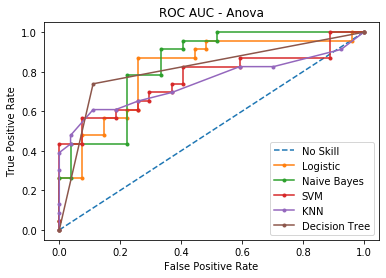

In [259]:
#Anova
X_train2 = X_train[fb_anova_feature];
X_test2 = X_test[fb_anova_feature];

ns_probs = [0 for _ in range(len(y_test))]

# fit a model
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
lr_probs = reg.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
nb_probs = gnb.predict_proba(X_test2)
nb_probs = nb_probs[:, 1]

#SVM
#clf = svm.SVC(kernel='linear', C = 1.0, random_state = 42)
clf = svm.SVC(kernel='rbf', random_state = 101, probability=True)
clf.fit(X_train2, y_train)
svm_probs = clf.predict_proba(X_test2)
svm_probs = svm_probs[:, 1]

#knn
#print(X_test2)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train2, y_train)    
knn_probs = knn.predict_proba(X_test2)
knn_probs = knn_probs[:, 1]

#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
dt_probs = rf.predict_proba(X_test2)
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
roc_aucL.append(nb_auc)
roc_aucL.append(svm_auc)
roc_aucL.append(lr_auc)
roc_aucL.append(knn_auc)
roc_aucL.append(dt_auc)
fb_roc_aucL.append(nb_auc)
fb_roc_aucL.append(svm_auc)
fb_roc_aucL.append(lr_auc)
fb_roc_aucL.append(knn_auc)
fb_roc_aucL.append(dt_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.title("ROC AUC - Anova")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<a id='6.4.3Pearsons'></a>
## 6.4.3 Pearsons

In [260]:
#Pearsons

X_train2 = X_train[fb_cor_pearsons_feature];
X_test2 = X_test[fb_cor_pearsons_feature];

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
y_predict = gnb.predict(X_test2)
#accuracy
accuracy_gnb = gnb.score(X_test2, y_test)
# f1 score
f1_score_gnb = f1_score(y_predict, y_test)
#append table
model.append('NB')
method.append('Pearsons')
accuracyL.append(accuracy_gnb)
f1_scoreL.append(f1_score_gnb)

fb_model.append('NB')
fb_method.append('Pearsons')
fb_accuracyL.append(accuracy_gnb)
fb_f1_scoreL.append(f1_score_gnb)
print(accuracy_gnb) # Calculate accuracy
print(f1_score_gnb)

#cm = confusion_matrix(y_test, y_predict) # Confusion Matrix
#cm

#SVM
clf = svm.SVC(kernel='rbf',random_state = 101)
clf.fit(X_train2, y_train)
y_predict = clf.predict(X_test2)
#accuracy
accuracy_svm = clf.score(X_test2, y_test)
# f1 score
f1_score_svm = f1_score(y_predict, y_test)
#append table
model.append('SVM')
method.append('Pearsons')
accuracyL.append(accuracy_svm)
f1_scoreL.append(f1_score_svm)

fb_model.append('SVM')
fb_method.append('Pearsons')
fb_accuracyL.append(accuracy_svm)
fb_f1_scoreL.append(f1_score_svm)
print(accuracy_svm) # Calculate accuracy
print(f1_score_svm)

#reg
reg = linear_model.LogisticRegression(solver='liblinear', random_state = 101)
reg.fit(X_train2, y_train)
y_predict = reg.predict(X_test2)
#accuracy
accuracy_reg = reg.score(X_test2, y_test)
# f1 score
f1_score_reg = f1_score(y_predict, y_test)
#append table
model.append('LR')
method.append('Pearsons')
accuracyL.append(accuracy_reg)
f1_scoreL.append(f1_score_reg)

fb_model.append('LR')
fb_method.append('Pearsons')
fb_accuracyL.append(accuracy_reg)
fb_f1_scoreL.append(f1_score_reg)
print(accuracy_reg) # Calculate accuracy
print(f1_score_reg)

#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
y_predict = knn.predict(X_test2)
#accuracy
accuracy_knn = knn.score(X_test2, y_test)
# f1 score
f1_score_knn = f1_score(y_predict.round(), y_test)
model.append('KNN')
method.append('Pearsons')
accuracyL.append(accuracy_knn)
f1_scoreL.append(f1_score_knn)

fb_model.append('KNN')
fb_method.append('Pearsons')
fb_accuracyL.append(accuracy_knn)
fb_f1_scoreL.append(f1_score_knn)
print(accuracy_knn) # Calculate accuracy
print(f1_score_knn)


#decision tree
rf = DecisionTreeClassifier(random_state = 101)
rf.fit(X_train2, y_train)
y_predict = rf.predict(X_test2)
#accuracy
accuracy_rf = rf.score(X_test2, y_test)
# f1 score
f1_score_rf = f1_score(y_predict, y_test)
model.append('DT')
method.append('Pearsons')
accuracyL.append(accuracy_rf)
f1_scoreL.append(f1_score_rf)

fb_model.append('DT')
fb_method.append('Pearsons')
fb_accuracyL.append(accuracy_rf)
fb_f1_scoreL.append(f1_score_rf)
print(accuracy_rf)
print(f1_score_rf)

0.76
0.7499999999999999
0.68
0.6363636363636365
0.74
0.6976744186046512
0.78
0.7755102040816326
0.76
0.7499999999999999


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.812
Naive Bayes: ROC AUC=0.826
SVM: ROC AUC=0.742
KNN: ROC AUC=0.775
Decision Tree: ROC AUC=0.758


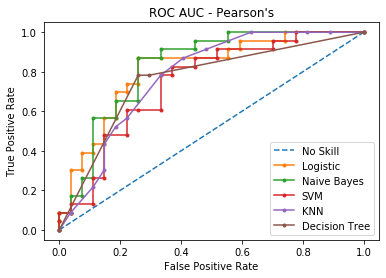

In [261]:
#pearsons
X_train2 = X_train[fb_cor_pearsons_feature];
X_test2 = X_test[fb_cor_pearsons_feature];

ns_probs = [0 for _ in range(len(y_test))]

# fit a model
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
lr_probs = reg.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
nb_probs = gnb.predict_proba(X_test2)
nb_probs = nb_probs[:, 1]

#SVM
#clf = svm.SVC(kernel='linear', C = 1.0, random_state = 42)
clf = svm.SVC(kernel='rbf', random_state = 101, probability=True)
clf.fit(X_train2, y_train)
svm_probs = clf.predict_proba(X_test2)
svm_probs = svm_probs[:, 1]

#knn
#print(X_test2)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train2, y_train)    
knn_probs = knn.predict_proba(X_test2)
knn_probs = knn_probs[:, 1]

#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
dt_probs = rf.predict_proba(X_test2)
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
roc_aucL.append(nb_auc)
roc_aucL.append(svm_auc)
roc_aucL.append(lr_auc)
roc_aucL.append(knn_auc)
roc_aucL.append(dt_auc)
fb_roc_aucL.append(nb_auc)
fb_roc_aucL.append(svm_auc)
fb_roc_aucL.append(lr_auc)
fb_roc_aucL.append(knn_auc)
fb_roc_aucL.append(dt_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.title("ROC AUC - Pearson's")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<a id='6.4.4HeatMap'></a>
## 6.4.4 HeatMap

In [262]:
#heatmap

X_train2 = X_train[fb_cor_heatmap_feature];
X_test2 = X_test[fb_cor_heatmap_feature];

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
y_predict = gnb.predict(X_test2)
#accuracy
#accuracy = accuracy_score(y_test, y_predict)
accuracy_gnb = gnb.score(X_test2, y_test)
# f1 score
f1_score_gnb = f1_score(y_predict, y_test)
#append table
model.append('NB')
method.append('HM')
accuracyL.append(accuracy_gnb)
f1_scoreL.append(f1_score_gnb)

fb_model.append('NB')
fb_method.append('HM')
fb_accuracyL.append(accuracy_gnb)
fb_f1_scoreL.append(f1_score_gnb)
print(accuracy_gnb) # Calculate accuracy
print(f1_score_gnb)


#SVM
clf = svm.SVC(kernel='rbf',random_state = 101)
clf.fit(X_train2, y_train)
y_predict = clf.predict(X_test2)
#accuracy
accuracy_svm = clf.score(X_test2, y_test)
# f1 score
f1_score_svm = f1_score(y_predict, y_test)
#append table
model.append('SVM')
method.append('HM')
accuracyL.append(accuracy_svm)
f1_scoreL.append(f1_score_svm)

fb_model.append('SVM')
fb_method.append('HM')
fb_accuracyL.append(accuracy_svm)
fb_f1_scoreL.append(f1_score_svm)
print(accuracy_svm) # Calculate accuracy
print(f1_score_svm)

#reg
reg = linear_model.LogisticRegression(solver='liblinear', random_state = 101)
reg.fit(X_train2, y_train)
y_predict = reg.predict(X_test2)
#accuracy
accuracy_reg = reg.score(X_test2, y_test)
# f1 score
f1_score_reg = f1_score(y_predict, y_test)
#append table
model.append('LR')
method.append('HM')
accuracyL.append(accuracy_reg)
f1_scoreL.append(f1_score_reg)

fb_model.append('LR')
fb_method.append('HM')
fb_accuracyL.append(accuracy_reg)
fb_f1_scoreL.append(f1_score_reg)
print(accuracy_reg) # Calculate accuracy
print(f1_score_reg)

#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
y_predict = knn.predict(X_test2)
#accuracy
accuracy_knn = knn.score(X_test2, y_test)
# f1 score
f1_score_knn = f1_score(y_predict.round(), y_test)
model.append('KNN')
method.append('HM')
accuracyL.append(accuracy_knn)
f1_scoreL.append(f1_score_knn)

fb_model.append('KNN')
fb_method.append('HM')
fb_accuracyL.append(accuracy_knn)
fb_f1_scoreL.append(f1_score_knn)
print(accuracy_knn) # Calculate accuracy
print(f1_score_knn)


#decision tree
rf = DecisionTreeClassifier(random_state = 101)
rf.fit(X_train2, y_train)
y_predict = rf.predict(X_test2)
#accuracy
accuracy_rf = rf.score(X_test2, y_test)
# f1 score
f1_score_rf = f1_score(y_predict, y_test)
model.append('DT')
method.append('HM')
accuracyL.append(accuracy_rf)
f1_scoreL.append(f1_score_rf)

fb_model.append('DT')
fb_method.append('HM')
fb_accuracyL.append(accuracy_rf)
fb_f1_scoreL.append(f1_score_rf)
print(accuracy_rf)
print(f1_score_rf)

0.7
0.7457627118644068
0.76
0.7142857142857143
0.8
0.7727272727272727
0.78
0.717948717948718
0.68
0.6190476190476191


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.897
Naive Bayes: ROC AUC=0.833
SVM: ROC AUC=0.800
KNN: ROC AUC=0.822
Decision Tree: ROC AUC=0.671


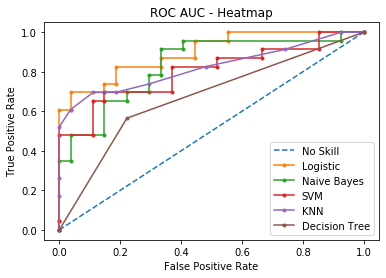

In [263]:
#heatmap
X_train2 = X_train[fb_cor_heatmap_feature];
X_test2 = X_test[fb_cor_heatmap_feature];

ns_probs = [0 for _ in range(len(y_test))]

# fit a model
reg = linear_model.LogisticRegression(solver='liblinear', random_state=101)
reg.fit(X_train2, y_train)
lr_probs = reg.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

#GND
gnb = GaussianNB()
gnb.fit(X_train2, y_train)
nb_probs = gnb.predict_proba(X_test2)
nb_probs = nb_probs[:, 1]

#SVM
#clf = svm.SVC(kernel='linear', C = 1.0, random_state = 42)
clf = svm.SVC(kernel='rbf', random_state = 101, probability=True)
clf.fit(X_train2, y_train)
svm_probs = clf.predict_proba(X_test2)
svm_probs = svm_probs[:, 1]

#knn
#print(X_test2)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train2, y_train)    
knn_probs = knn.predict_proba(X_test2)
knn_probs = knn_probs[:, 1]

#decision tree
rf = DecisionTreeClassifier(random_state=101)
rf.fit(X_train2, y_train)
dt_probs = rf.predict_proba(X_test2)
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
roc_aucL.append(nb_auc)
roc_aucL.append(svm_auc)
roc_aucL.append(lr_auc)
roc_aucL.append(knn_auc)
roc_aucL.append(dt_auc)
fb_roc_aucL.append(nb_auc)
fb_roc_aucL.append(svm_auc)
fb_roc_aucL.append(lr_auc)
fb_roc_aucL.append(knn_auc)
fb_roc_aucL.append(dt_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.title("ROC AUC - Heatmap")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [264]:
fb_combine = list(zip(fb_model, fb_method, fb_accuracyL, fb_f1_scoreL, fb_roc_aucL))
fb_Accuracy_result = pd.DataFrame(fb_combine, columns =['Model', 'Method', 'Accuracy','F1Score','ROC_AUC'])
fb_Accuracy_result['Accuracy']=fb_Accuracy_result['Accuracy'].apply(lambda x:round(x,2))
fb_Accuracy_result['F1Score']=fb_Accuracy_result['F1Score'].apply(lambda x:round(x,2))
fb_Accuracy_result['ROC_AUC']=fb_Accuracy_result['ROC_AUC'].apply(lambda x:round(x,2))
fb_Accuracy_result

Model    Method  Accuracy  F1Score  ROC_AUC
0     NB      chi2      0.58     0.28     0.77
1    SVM      chi2      0.74     0.70     0.76
2     LR      chi2      0.72     0.65     0.77
3    KNN      chi2      0.78     0.73     0.85
4     DT      chi2      0.74     0.68     0.72
5     NB     Anova      0.74     0.73     0.83
6    SVM     Anova      0.70     0.67     0.76
7     LR     Anova      0.72     0.70     0.81
8    KNN     Anova      0.74     0.68     0.75
9     DT     Anova      0.82     0.79     0.81
10    NB  Pearsons      0.76     0.75     0.83
11   SVM  Pearsons      0.68     0.64     0.74
12    LR  Pearsons      0.74     0.70     0.81
13   KNN  Pearsons      0.78     0.78     0.77
14    DT  Pearsons      0.76     0.75     0.76
15    NB        HM      0.70     0.75     0.83
16   SVM        HM      0.76     0.71     0.80
17    LR        HM      0.80     0.77     0.90
18   KNN        HM      0.78     0.72     0.82
19    DT        HM      0.68     0.62     0.67

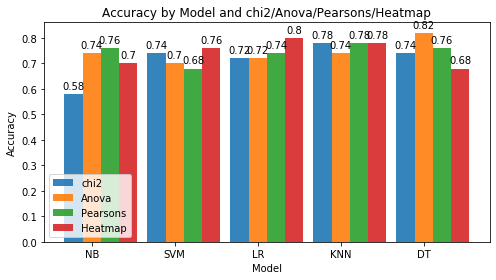

In [265]:
result_1 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'chi2'].Accuracy)
result_2 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'Anova'].Accuracy)
result_3 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'Pearsons'].Accuracy)
result_4 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'HM'].Accuracy)

result_1_std = (0, 0, 0, 0, 0)
result_2_std = (0, 0, 0, 0, 0)
result_3_std = (0, 0, 0, 0, 0)
result_4_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_1))  # the x locations for the groups
width = 0.22  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 4))
rects1 = ax.bar(ind - (1*width), result_1, width, yerr=result_1_std, label='chi2' , alpha =0.9)
rects2 = ax.bar(ind , result_2, width, yerr=result_2_std, label='Anova', alpha =0.9)
rects3 = ax.bar(ind+width , result_3, width, yerr=result_3_std, label='Pearsons', alpha =0.9)
rects4 = ax.bar(ind+2*width , result_4, width, yerr=result_4_std, label='Heatmap', alpha =0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('Accuracy by Model and chi2/Anova/Pearsons/Heatmap')
ax.set_xticks(ind)
ax.set_xticklabels(fb_Accuracy_result.Model.unique())
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")

fig.tight_layout()

plt.show()

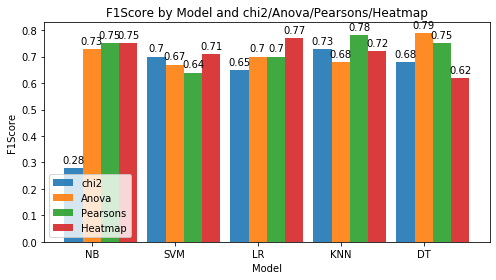

In [266]:
result_1 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'chi2'].F1Score)
result_2 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'Anova'].F1Score)
result_3 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'Pearsons'].F1Score)
result_4 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'HM'].F1Score)


result_1_std = (0, 0, 0, 0, 0)
result_2_std = (0, 0, 0, 0, 0)
result_3_std = (0, 0, 0, 0, 0)
result_4_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_1))  # the x locations for the groups
width = 0.22  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 4))
rects1 = ax.bar(ind - (1*width), result_1, width, yerr=result_1_std, label='chi2' , alpha =0.9)
rects2 = ax.bar(ind , result_2, width, yerr=result_2_std, label='Anova', alpha =0.9)
rects3 = ax.bar(ind+width , result_3, width, yerr=result_3_std, label='Pearsons', alpha =0.9)
rects4 = ax.bar(ind+2*width , result_4, width, yerr=result_4_std, label='Heatmap', alpha =0.9)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1Score')
ax.set_xlabel('Model')
ax.set_title('F1Score by Model and chi2/Anova/Pearsons/Heatmap')
ax.set_xticks(ind)
ax.set_xticklabels(fb_Accuracy_result.Model.unique())
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")

fig.tight_layout()

plt.show()

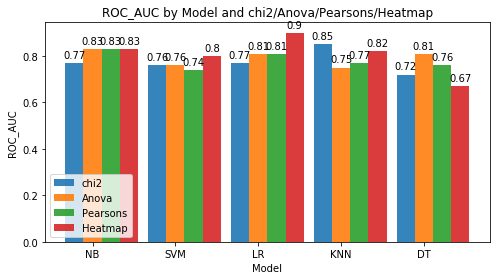

In [267]:
#Filter based ROC_AUC
result_1 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'chi2'].ROC_AUC)
result_2 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'Anova'].ROC_AUC)
result_3 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'Pearsons'].ROC_AUC)
result_4 = (fb_Accuracy_result[fb_Accuracy_result['Method'] == 'HM'].ROC_AUC)


result_1_std = (0, 0, 0, 0, 0)
result_2_std = (0, 0, 0, 0, 0)
result_3_std = (0, 0, 0, 0, 0)
result_4_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_1))  # the x locations for the groups
width = 0.22  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 4))
rects1 = ax.bar(ind - (1*width), result_1, width, yerr=result_1_std, label='chi2' , alpha =0.9)
rects2 = ax.bar(ind , result_2, width, yerr=result_2_std, label='Anova', alpha =0.9)
rects3 = ax.bar(ind+width , result_3, width, yerr=result_3_std, label='Pearsons', alpha =0.9)
rects4 = ax.bar(ind+2*width , result_4, width, yerr=result_4_std, label='Heatmap', alpha =0.9)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ROC_AUC')
ax.set_xlabel('Model')
ax.set_title('ROC_AUC by Model and chi2/Anova/Pearsons/Heatmap')
ax.set_xticks(ind)
ax.set_xticklabels(fb_Accuracy_result.Model.unique())
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")

fig.tight_layout()

plt.show()

<a id='7.Conclusion'></a>
## 7. Conclusion

In [268]:
combine = list(zip(model, method, accuracyL, f1_scoreL, roc_aucL))
Accuracy_result = pd.DataFrame(combine, columns =['Model', 'Method', 'Accuracy','F1Score', 'ROC_AUC'])
Accuracy_result['Accuracy']=Accuracy_result['Accuracy'].apply(lambda x:round(x,2))
Accuracy_result['F1Score']=Accuracy_result['F1Score'].apply(lambda x:round(x,2))
Accuracy_result['ROC_AUC']=Accuracy_result['ROC_AUC'].apply(lambda x:round(x,2))
Accuracy_result

Model    Method  Accuracy  F1Score  ROC_AUC
0     NB       RFE      0.74     0.70     0.78
1    SVM       RFE      0.70     0.63     0.75
2     LR       RFE      0.74     0.68     0.77
3    KNN       RFE      0.70     0.63     0.76
4     DT       RFE      0.68     0.62     0.74
5     NB        RF      0.74     0.72     0.84
6    SVM        RF      0.78     0.74     0.86
7     LR        RF      0.78     0.76     0.85
8    KNN        RF      0.74     0.70     0.84
9     DT        RF      0.76     0.75     0.76
10    NB        XG      0.70     0.67     0.74
11   SVM        XG      0.74     0.70     0.76
12    LR        XG      0.80     0.75     0.85
13   KNN        XG      0.70     0.67     0.75
14    DT        XG      0.74     0.71     0.74
15    NB     Lasso      0.58     0.68     0.76
16   SVM     Lasso      0.68     0.62     0.75
17    LR     Lasso      0.70     0.65     0.75
18   KNN     Lasso      0.74     0.68     0.77
19    DT     Lasso      0.72     0.70     0.77
20    NB      chi2      0.58     0.28     0.77
21   SVM      chi2      0.74     0.70     0.76
22    LR      chi2      0.72     0.65     0.77
23   KNN      chi2      0.78     0.73     0.85
24    DT      chi2      0.74     0.68     0.72
25    NB     Anova      0.74     0.73     0.83
26   SVM     Anova      0.70     0.67     0.76
27    LR     Anova      0.72     0.70     0.81
28   KNN     Anova      0.74     0.68     0.75
29    DT     Anova      0.82     0.79     0.81
30    NB  Pearsons      0.76     0.75     0.83
31   SVM  Pearsons      0.68     0.64     0.74
32    LR  Pearsons      0.74     0.70     0.81
33   KNN  Pearsons      0.78     0.78     0.77
34    DT  Pearsons      0.76     0.75     0.76
35    NB        HM      0.70     0.75     0.83
36   SVM        HM      0.76     0.71     0.80
37    LR        HM      0.80     0.77     0.90
38   KNN        HM      0.78     0.72     0.82
39    DT        HM      0.68     0.62     0.67

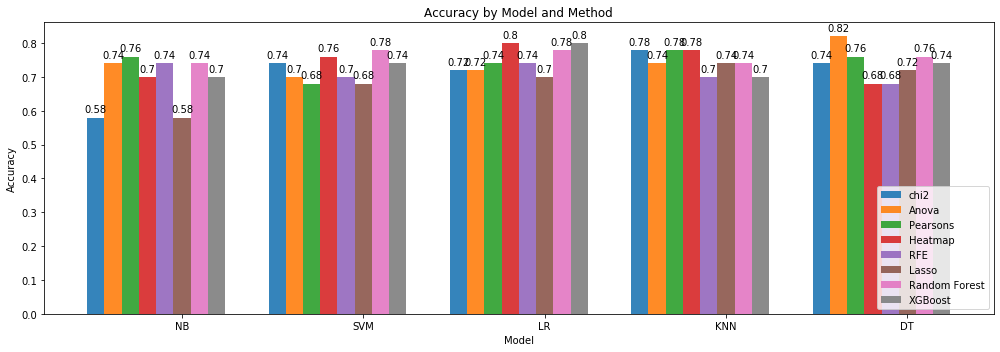

In [269]:
#accuracy
result_2 = (Accuracy_result[Accuracy_result['Method'] == 'chi2'].Accuracy)
result_3 = (Accuracy_result[Accuracy_result['Method'] == 'Anova'].Accuracy)
result_4 = (Accuracy_result[Accuracy_result['Method'] == 'Pearsons'].Accuracy)
result_5 = (Accuracy_result[Accuracy_result['Method'] == 'HM'].Accuracy)
result_6 = (Accuracy_result[Accuracy_result['Method'] == 'RFE'].Accuracy)
result_7 = (Accuracy_result[Accuracy_result['Method'] == 'Lasso'].Accuracy)
result_8 = (Accuracy_result[Accuracy_result['Method'] == 'RF'].Accuracy)
result_9 = (Accuracy_result[Accuracy_result['Method'] == 'XG'].Accuracy)


result_2_std = (0, 0, 0, 0, 0)
result_3_std = (0, 0, 0, 0, 0)
result_4_std = (0, 0, 0, 0, 0)
result_5_std = (0, 0, 0, 0, 0)
result_6_std = (0, 0, 0, 0, 0)
result_7_std = (0, 0, 0, 0, 0)
result_8_std = (0, 0, 0, 0, 0)
result_9_std = (0, 0, 0, 0, 0)
result_10_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_2))  # the x locations for the groups
width = 0.095  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 5))
rects2 = ax.bar(ind - (5*width), result_2, width, yerr=result_2_std, label='chi2' , alpha =0.9)
rects3 = ax.bar(ind - (4*width), result_3, width, yerr=result_3_std, label='Anova' , alpha =0.9)
rects4 = ax.bar(ind - (3*width), result_4, width, yerr=result_4_std, label='Pearsons' , alpha =0.9)
rects5 = ax.bar(ind - (2*width), result_5, width, yerr=result_5_std, label='Heatmap' , alpha =0.9)
rects6 = ax.bar(ind - width , result_6, width, yerr=result_6_std, label='RFE', alpha =0.9)
rects7 = ax.bar(ind , result_7, width, yerr=result_7_std, label='Lasso', alpha =0.9)
rects8 = ax.bar(ind + width, result_8, width, yerr=result_8_std, label='Random Forest', alpha =0.9)
rects9 = ax.bar(ind + (2*width), result_9, width, yerr=result_9_std, label='XGBoost', alpha =0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('Accuracy by Model and Method')
ax.set_xticks(ind)
ax.set_xticklabels(Accuracy_result.Model.unique())
ax.legend(loc=4)


autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")
autolabel(rects6, "center")
autolabel(rects7, "center")
autolabel(rects8, "center")
autolabel(rects9, "center")

fig.tight_layout()

plt.show()

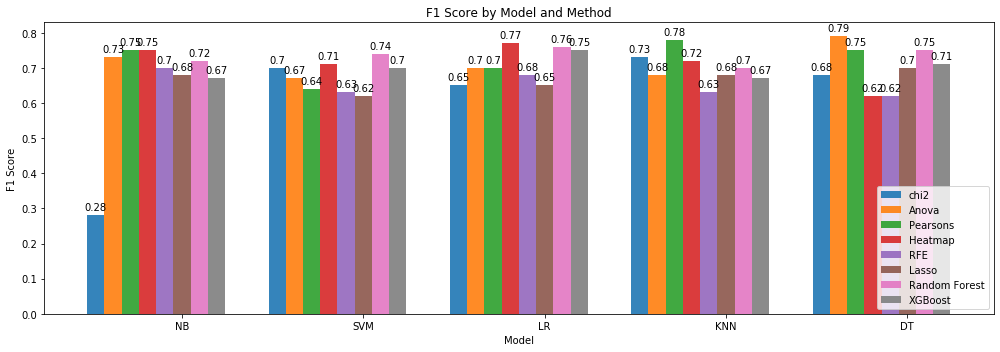

In [270]:
#f1 score
result_2 = (Accuracy_result[Accuracy_result['Method'] == 'chi2'].F1Score)
result_3 = (Accuracy_result[Accuracy_result['Method'] == 'Anova'].F1Score)
result_4 = (Accuracy_result[Accuracy_result['Method'] == 'Pearsons'].F1Score)
result_5 = (Accuracy_result[Accuracy_result['Method'] == 'HM'].F1Score)
result_6 = (Accuracy_result[Accuracy_result['Method'] == 'RFE'].F1Score)
result_7 = (Accuracy_result[Accuracy_result['Method'] == 'Lasso'].F1Score)
result_8 = (Accuracy_result[Accuracy_result['Method'] == 'RF'].F1Score)
result_9 = (Accuracy_result[Accuracy_result['Method'] == 'XG'].F1Score)


result_2_std = (0, 0, 0, 0, 0)
result_3_std = (0, 0, 0, 0, 0)
result_4_std = (0, 0, 0, 0, 0)
result_5_std = (0, 0, 0, 0, 0)
result_6_std = (0, 0, 0, 0, 0)
result_7_std = (0, 0, 0, 0, 0)
result_8_std = (0, 0, 0, 0, 0)
result_9_std = (0, 0, 0, 0, 0)
result_10_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_2))  # the x locations for the groups
width = 0.095  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 5))
rects2 = ax.bar(ind - (5*width), result_2, width, yerr=result_2_std, label='chi2' , alpha =0.9)
rects3 = ax.bar(ind - (4*width), result_3, width, yerr=result_3_std, label='Anova' , alpha =0.9)
rects4 = ax.bar(ind - (3*width), result_4, width, yerr=result_4_std, label='Pearsons' , alpha =0.9)
rects5 = ax.bar(ind - (2*width), result_5, width, yerr=result_5_std, label='Heatmap' , alpha =0.9)
rects6 = ax.bar(ind - width , result_6, width, yerr=result_6_std, label='RFE', alpha =0.9)
rects7 = ax.bar(ind , result_7, width, yerr=result_7_std, label='Lasso', alpha =0.9)
rects8 = ax.bar(ind + width, result_8, width, yerr=result_8_std, label='Random Forest', alpha =0.9)
rects9 = ax.bar(ind + (2*width), result_9, width, yerr=result_9_std, label='XGBoost', alpha =0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score')
ax.set_xlabel('Model')
ax.set_title('F1 Score by Model and Method')
ax.set_xticks(ind)
ax.set_xticklabels(Accuracy_result.Model.unique())
ax.legend(loc=4)

autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")
autolabel(rects6, "center")
autolabel(rects7, "center")
autolabel(rects8, "center")
autolabel(rects9, "center")

fig.tight_layout()

plt.show()

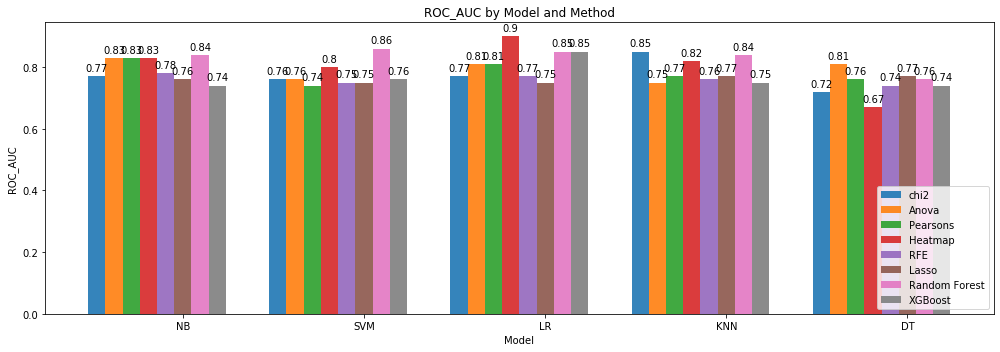

In [271]:
#ROC_AUC
result_2 = (Accuracy_result[Accuracy_result['Method'] == 'chi2'].ROC_AUC)
result_3 = (Accuracy_result[Accuracy_result['Method'] == 'Anova'].ROC_AUC)
result_4 = (Accuracy_result[Accuracy_result['Method'] == 'Pearsons'].ROC_AUC)
result_5 = (Accuracy_result[Accuracy_result['Method'] == 'HM'].ROC_AUC)
result_6 = (Accuracy_result[Accuracy_result['Method'] == 'RFE'].ROC_AUC)
result_7 = (Accuracy_result[Accuracy_result['Method'] == 'Lasso'].ROC_AUC)
result_8 = (Accuracy_result[Accuracy_result['Method'] == 'RF'].ROC_AUC)
result_9 = (Accuracy_result[Accuracy_result['Method'] == 'XG'].ROC_AUC)


result_2_std = (0, 0, 0, 0, 0)
result_3_std = (0, 0, 0, 0, 0)
result_4_std = (0, 0, 0, 0, 0)
result_5_std = (0, 0, 0, 0, 0)
result_6_std = (0, 0, 0, 0, 0)
result_7_std = (0, 0, 0, 0, 0)
result_8_std = (0, 0, 0, 0, 0)
result_9_std = (0, 0, 0, 0, 0)
result_10_std = (0, 0, 0, 0, 0)

ind = np.arange(len(result_2))  # the x locations for the groups
width = 0.095  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 5))
rects2 = ax.bar(ind - (5*width), result_2, width, yerr=result_2_std, label='chi2' , alpha =0.9)
rects3 = ax.bar(ind - (4*width), result_3, width, yerr=result_3_std, label='Anova' , alpha =0.9)
rects4 = ax.bar(ind - (3*width), result_4, width, yerr=result_4_std, label='Pearsons' , alpha =0.9)
rects5 = ax.bar(ind - (2*width), result_5, width, yerr=result_5_std, label='Heatmap' , alpha =0.9)
rects6 = ax.bar(ind - width , result_6, width, yerr=result_6_std, label='RFE', alpha =0.9)
rects7 = ax.bar(ind , result_7, width, yerr=result_7_std, label='Lasso', alpha =0.9)
rects8 = ax.bar(ind + width, result_8, width, yerr=result_8_std, label='Random Forest', alpha =0.9)
rects9 = ax.bar(ind + (2*width), result_9, width, yerr=result_9_std, label='XGBoost', alpha =0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ROC_AUC')
ax.set_xlabel('Model')
ax.set_title('ROC_AUC by Model and Method')
ax.set_xticks(ind)
ax.set_xticklabels(Accuracy_result.Model.unique())
ax.legend(loc=4)

autolabel(rects2, "center")
autolabel(rects3, "center")
autolabel(rects4, "center")
autolabel(rects5, "center")
autolabel(rects6, "center")
autolabel(rects7, "center")
autolabel(rects8, "center")
autolabel(rects9, "center")

fig.tight_layout()

plt.show()